In [1]:
###############################################################
#
# Consumer-Resource model with production.
# Produces eigenvalue plots for symmetric and asymmetric P
# matrices.
# Each resource density = r
# Each species abundance = s
# Consumption matrix C = c*I  ### Completely specialized
#
###############################################################

# From Butler, O'Dwyer (2018)

In [2]:
import numpy as np
from numpy.random import normal, uniform
from numpy.linalg import eigvals
import math as mt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"     

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

%matplotlib inline

np.set_printoptions(precision=6)

np.random.seed(999)

In [3]:
mpl.rcParams['figure.dpi'] = 200
plt.style.use('ggplot')
mpl.rcParams.update({'font.size': 4})

In [4]:
# Functions for O'Dwyer model
from ODwyer_Tools import *

# "" for Arnoldi stability measures
from Arnoldi_Tools import *

# "" for diversity measures
from Diversity_Measures import *

# Arnoldi Measures

## "Resilience, reactivity and variability..." (2016)

In [5]:
# Example parameters to test functions
np.random.seed(667)
n = 2
k = 1000
mu = (np.ones(n)*1).reshape(n,1)
rho = (np.ones(n)*1).reshape(n,1)
eps = 0.25
C = np.identity(n)
P = symPvec(sig = 1, n = n, k = k)

J = community_matr_gen(C,P,eps,mu,rho)

In [6]:
def stab_stab_plot(sys_, color_, sys_type_, n_, C_, extra_=None, font_size_=4, numbins=5):
    mpl.rcParams['figure.dpi'] = 250
    plt.style.use('ggplot')
    mpl.rcParams.update({'font.size': 4})
    plt.rc('font', size=font_size_)
    # numbins=5

    plt.subplot(3,3,1)
    plt.scatter(x=sys_.I_S,y=sys_.R_0, s = 1, c=color_, alpha = 0.5);
    plt.xlabel(r'$\mathcal{I}_S$');
    plt.ylabel(r'$\mathcal{R}_0$');
    plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');
    plt.locator_params(axis="x", nbins=numbins)


    plt.subplot(3,3,2)
    plt.scatter(x=sys_.I_D,y=sys_.R_0, s=1, c=color_, alpha = 0.5);
    # plt.xlabel(r'$\mathcal{I}_D$');
    # plt.ylabel(r'$\mathcal{R}_0$');
    plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');
    plt.locator_params(axis="x", nbins=numbins)

    plt.subplot(3,3,3)
    plt.scatter(x=sys_.R_inf,y=sys_.R_0, s=1, c=color_, alpha = 0.5);
    plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');
    plt.locator_params(axis="x", nbins=numbins)

    plt.subplot(3,3,5)
    plt.scatter(x=sys_.I_D,y=sys_.I_S, s=1, c=color_, alpha = 0.5);
    plt.xlabel(r'$\mathcal{I}_D$');
    plt.ylabel(r'$\mathcal{I}_S$');
    plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');
    plt.locator_params(axis="x", nbins=numbins)


    plt.subplot(3,3,6)
    plt.scatter(x=sys_.R_inf,y=sys_.I_S, s=1, c=color_, alpha = 0.5);
    plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');
    plt.locator_params(axis="x", nbins=numbins)

    plt.subplot(3,3,9)
    plt.scatter(x=sys_.R_inf,y=sys_.I_D, s=1, c=color_, alpha = 0.5);
    plt.xlabel(r'$\mathcal{R}_{\infty}$');
    plt.ylabel(r'$\mathcal{I}_D$');
    plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');
    plt.locator_params(axis="x", nbins=numbins)

    plt.suptitle('Arnoldi Measures for {} Community Matrices, n={}, C={}{}'.format(sys_type_, n_, C_, extra_));

    plt.tight_layout();

# Diversity Measures

All diversity index functions in `Diversity_Measures.py` will take equilibrium vector $N$ and return raw index, not the numbers equivalent.



#  O'Dwyer Stability vs. Diversity

## Mimic a few of the C examples from O’Dwyer paper
 

In Butler (2018), four qualitatively distinct varieties of the consumption preference parameter matrix *C* are given. We label them here as follows, based on their arrangement in that paper's graphics:

**Left**, (noisy)
* $C_{L_1}$, near-specialism (strong main diagonal values)
* $C_{L_2}$, near-generalism (strong off-diagonal values)

**Right**, (deterministic "spectrum of similarity for resources")
* $C_{R_1}$, near-perfect diagonal specialism with upper-left and bottom-right entries augmented
* $C_{R_2}$, sinusoidal on [0,1]

In [7]:
nC = 20 # Make example systems with 10 resource, 10 species

In [8]:
np.random.seed(667)

CL1 = np.random.uniform(0,0.4, (nC,nC))
np.fill_diagonal(CL1, np.random.uniform(0.8, 1, nC)) # Inplace

CL2 = np.random.uniform(0.8, 1, (nC,nC))
np.fill_diagonal(CL2, np.random.uniform(0,0.4, nC))

In [9]:
def fill_near_diag(x,y):
    # Adjust exponent for harder fall-off? Still not as intense as in O'Dwyer (They say smooth, but does not look very smooth in diagram)
    return 1 - (np.abs(x-y) / (nC-1) )**2


In [10]:
CR1 = np.fromfunction(fill_near_diag, (nC,nC))

CR1[-1,0] = 0.9 # Fill upper-right and lower-left entries as in the paper's CR1
CR1[0,-1] = 0.9

In [11]:
def fill_periodic(x,y):
    return 0.5 * (np.cos( 2*np.pi * np.abs(x-y) / (nC-1) ) + 1)

In [12]:
CR2 = np.fromfunction(fill_periodic, (nC,nC))

C:\Users\riley\AppData\Local\Temp/ipykernel_15280/611426627.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout();


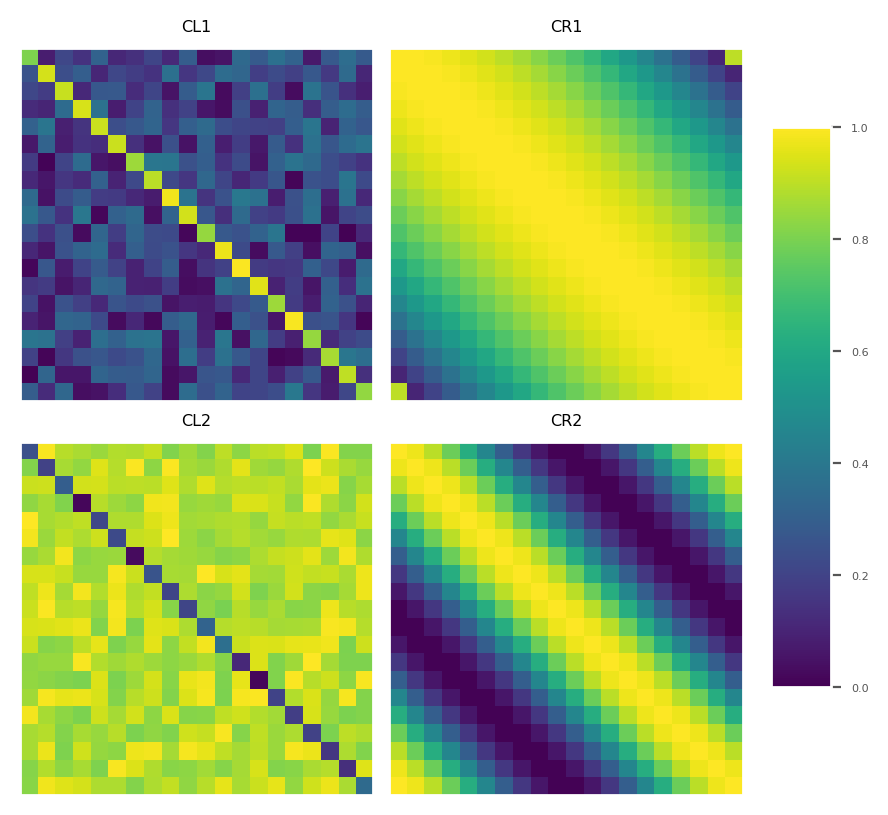

In [13]:
C_list = [CL1,CR1,CL2,CR2]
C_names = ["CL1","CR1","CL2","CR2"]

fig, axes = plt.subplots(nrows=2, ncols=2)
for i, ax in enumerate(axes.flat):
    # im = ax.imshow(C_list[i], vmin=np.min(C_list[i]), vmax=np.max(C_list[i]))
    im = ax.imshow(C_list[i], vmin=0, vmax=1)
    ax.grid(False);
    ax.xaxis.set_tick_params(bottom=False, labelbottom=False)
    ax.yaxis.set_tick_params(left=False, labelleft=False)
    ax.set_title(C_names[i])


fig.subplots_adjust(right=1.15, hspace=3.5);
cbar_ax = fig.add_axes([0.825, 0.15, 0.05, 0.7]);
plt.grid(False);
fig.colorbar(im, cax=cbar_ax);

    
plt.tight_layout();

## Generating stable *n*-species systems with uniform diversity

$\vec{R^*} = \left(C^T\right)^{-1} \frac{1}{\epsilon} \vec{\mu}$

$\vec{S^*} = \left[(R^{*}_{diag})C\right]^{-1} \vec{\rho}$


In [14]:
def uniform_D(n=3, k=3000, alpha1_hi=5, alpha1_lo=1, alpha2_hi=5, alpha2_lo=1, tune=0.8, seed_=667):
    # Now concatenate the hi-variance sample with the lo-diversity sample to get sth roughly unif

    np.random.seed(seed_)
    
    # Determine how many alphas to set to alpha_hi for dirichlet
    num_alpha_hi = int(n*tune)
    alphas1 = np.ones(n)*alpha1_lo
    alphas1[:num_alpha_hi] = alpha1_hi
    alphas2 = np.ones(n)*alpha2_lo
    alphas2[0] = alpha2_hi
    
    eqDensities_hivar = np.random.dirichlet(alpha=alphas1, size=k)
    eqDivs_hivar = D_1(eqDensities_hivar)
    eqDensities_lo_hivar = np.random.dirichlet(alpha=alphas2, size=k)
    eqDivs_lo_hivar = D_1(eqDensities_lo_hivar)
    eqDivs_supersamp = np.concatenate([eqDivs_hivar, eqDivs_lo_hivar])
    
    mybins = np.linspace(1,n,11)
    
    # plt.hist(eqDivs_lo_hivar, color='chartreuse', label='D, low-diversity subsample', alpha=0.5, bins=mybins);
    # print(np.min(eqDivs_lo_hivar))
    eqDensities_supersamp = np.concatenate([eqDensities_hivar, eqDensities_lo_hivar])
    
    # fine, for loop
    # (counts, bins, patches) = plt.hist(eqDivs_supersamp, alpha=0.5, label='D, concatenated sample', bins=mybins);
    # plt.xlim(1,n);
    # plt.xlabel('D, equivalent # species');
    # plt.legend();
    bins = mybins
    digs = np.digitize(eqDivs_supersamp, bins)
    eqDensities_subsamp = np.zeros((1000,n))
    eqDivs_subsamp = np.zeros(1000)
    for i in range(1,11):
        eqDensities_subsamp[100*(i-1):100*(i)] = (eqDensities_supersamp[i==digs][:100])
        eqDivs_subsamp[100*(i-1):100*(i)] = (eqDivs_supersamp[i==digs][:100])
        # if (i==1):
            # print(eqDivs_subsamp)

    return [eqDensities_subsamp, eqDivs_subsamp, bins]
            

In [15]:
# # Yes, this method produces roughly uniformly distributed values of effective number of species.
# exDens, exDiv, exbin = uniform_D(n=10, k=20000, alpha1_hi=1.5, alpha2_hi=19, tune=0.9)

# plt.hist(exDiv, bins=exbin);
# plt.xlim(1,10);

In [16]:
# Can either provide own precomputed equilibria or let them be generated with roughly uniform D.
class ODsystem_unifD:
    def __init__(self, k_=1000,n_=5, eps_=0.25, alpha1_hi = 5, alpha2_hi = 5, tune=0.8, R_star=None, S_star=None, C_ = None, k_supersamp=10000, seed_=667):
        self.seed = seed_
        np.random.seed(self.seed)
        self.k = k_
        self.n = n_
        self.eps = eps_
        
        if (R_star is None):
            self.R_star, self.D_R, self.D_R_bins = uniform_D(n=self.n, k=k_supersamp, alpha1_hi=alpha1_hi, alpha2_hi=alpha2_hi, tune=tune, seed_=self.seed+1)
            self.R_star = self.R_star.reshape(self.k,self.n,1)
        else:
            self.R_star = sum_to_one(R_star).reshape(self.k,self.n,1)
            self.D_R = D_1(R_star.reshape(self.k,self.n,1))
        
        if (S_star is None):
            self.S_star, self.D_S, self.D_S_bins = uniform_D(n=self.n, k=k_supersamp, alpha1_hi=alpha1_hi, alpha2_hi=alpha2_hi, tune=tune, seed_=self.seed)
            self.S_star = self.S_star.reshape(self.k,self.n,1)
        else:
            self.S_star = sum_to_one(S_star).reshape(self.k,self.n,1)
            self.D_S = D_1(S_star.reshape(self.k,self.n,1))
        
        self.D_s = self.D_S.copy()
            
        # Need to spoof these values to use OD_stab_div_plot() again
        self.simpson_s = 0
        self.shannon_s = 0
        self.gini_simp_s = 0
        hcdt = 0
        renyi = 0
                    
        if C_ is None:
            self.C = np.identity(self.n)
        else:
            self.C = C_
        
        # self.s_star = sum_to_one(self.S_star)
        # self.r_star = sum_to_one(self.R_star)
        
        blankones = np.ones((self.k,self.n,self.n))
        self.mu = dot_across(np.dot(self.eps * np.eye(self.n), np.transpose(self.C)) * blankones, self.R_star)
        # print("R_star ", self.R_star.shape)
        # print("C" , self.C.shape)
        # print("S_star ", self.S_star.shape)
        self.rho = dot_across(dot_across(np.eye(self.n)*self.R_star, self.C*blankones), self.S_star)
        
        self.J = community_matr_gen_noP(n_=self.n, k_=self.k, C_=self.C, eps_=self.eps, R_star_=self.R_star, S_star_=self.S_star)
        
        ### Arnoldi Measures ###
        self.R_0 = init_res(self.J)
        self.R_inf = asym_res(self.J)
        self.I_S = np.zeros(self.k)
        for i in range(self.k):
            self.I_S[i] = stoch_invar(self.J[i,:,:])
        self.I_D = np.zeros(self.k)
        for i in range(self.k):
            self.I_D[i] = -1/minimize_scalar(determ_invar_OBJ, bracket = (0,3), args=(self.J[i,:,:]), method='brent').fun

        ### Diversity Measure ###
        # self.D_s = D_1(self.s_star)

In [112]:
# OD3_C0_unifD = ODsystem_unifD(n_=3, R_star=eqDensities_subsamp_R.reshape(1000,3,1), S_star=eqDensities_3_subsamp)

In [113]:
# OD5_C0_unifD = ODsystem_unifD(n_=5, seed_=667, k_supersamp=75000)

In [116]:
# (eqDensities10, eqDivs10, bins10) = uniform_D(n=10, k=100000, alpha1_hi=2, alpha2_hi=5, tune=0.2)
# (eqDensities10_R, eqDivs10_R, bins10_R) = uniform_D(n=10, k=100000, alpha1_hi=2, alpha2_hi=10, alpha2_lo=0.5, tune=0.3, seed_=668)

# # OD10_C0_unifDalt = ODsystem_unifD(n_=10, R_star=eqDensities10_R.reshape(1000,10,1), S_star=eqDensities10.reshape(1000,10,1))


In [124]:
# (eqDensities15, eqDivs15, bins15) = uniform_D(n=15, k=150000, alpha1_hi=2, alpha2_hi=2, alpha2_lo=0.2, tune=0.2)
# (eqDensities15_R, eqDivs15_R, bins15_R) = uniform_D(n=15, k=130000, alpha1_hi=2, alpha2_hi=5, alpha2_lo=0.5, tune=0.3, seed_=668)
# # OD15_C0_unifD = ODsystem_unifD(n_=15, R_star=eqDensities15_R.reshape(1000,15,1), S_star=eqDensities15.reshape(1000,15,1))


#### Function to generate RC systems

In [156]:
def build_a_sys(n, k, ksuper1, ksuper2, alpha1_hi, alphas2, tune, C, seed):
    (eqDensities, eqDivs, bins) = uniform_D(n=n, k=ksuper1, alpha1_hi=alpha1_hi, alpha2_hi=alphas2[1], alpha2_lo=alphas2[0], tune=tune, seed_=seed)

    (eqDensities_R, eqDivs_R, bins_R) = uniform_D(n=n, k=ksuper2, alpha1_hi=alpha1_hi, alpha2_hi=alphas2[1], alpha2_lo=alphas2[0], tune=tune, seed_=seed+1)

    OD_out = ODsystem_unifD(n_=n, R_star=eqDensities_R.reshape(k,n,1), S_star=eqDensities.reshape(k,n,1), C_=C)

    return OD_out

### Load large resource-competition systems from local files

Systems can be loaded so as to skip the time-consuming computation/code in the next sections.

In [17]:
import pickle # Save/load system objects as binaries; they are quite slow to calculate every single time.

In [18]:
with open(r'./OD_Systems_Various_C/OD_unifD/OD2_C0_unifD.ODsystem', 'rb') as OD_obj_file:
    OD2_C0_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD3_C0_unifD.ODsystem', 'rb') as OD_obj_file:
    OD3_C0_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD5_C0_unifD.ODsystem', 'rb') as OD_obj_file:
    OD5_C0_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD10_C0_unifD.ODsystem', 'rb') as OD_obj_file:
    OD10_C0_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD15_C0_unifD.ODsystem', 'rb') as OD_obj_file:
    OD15_C0_unifD = pickle.load(OD_obj_file)

In [19]:
with open(r'./OD_Systems_Various_C/OD_unifD/OD2_CL1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD2_CL1_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD3_CL1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD3_CL1_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD5_CL1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD5_CL1_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD10_CL1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD10_CL1_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD15_CL1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD15_CL1_unifD = pickle.load(OD_obj_file)

In [20]:
with open(r'./OD_Systems_Various_C/OD_unifD/OD2_CL2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD2_CL2_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD3_CL2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD3_CL2_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD5_CL2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD5_CL2_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD10_CL2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD10_CL2_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD15_CL2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD15_CL2_unifD = pickle.load(OD_obj_file)

In [21]:
with open(r'./OD_Systems_Various_C/OD_unifD/OD2_CR1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD2_CR1_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD3_CR1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD3_CR1_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD5_CR1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD5_CR1_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD10_CR1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD10_CR1_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD15_CR1_unifD.ODsystem', 'rb') as OD_obj_file:
    OD15_CR1_unifD = pickle.load(OD_obj_file)

In [22]:
with open(r'./OD_Systems_Various_C/OD_unifD/OD2_CR2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD2_CR2_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD3_CR2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD3_CR2_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD5_CR2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD5_CR2_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD10_CR2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD10_CR2_unifD = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD_unifD/OD15_CR2_unifD.ODsystem', 'rb') as OD_obj_file:
    OD15_CR2_unifD = pickle.load(OD_obj_file)

### Demonstration of generating systems with roughly uniform $D$ ($N=3$, $C=I$)

Here, we explore in detail a motivating example for the `build_a_sys()` function.

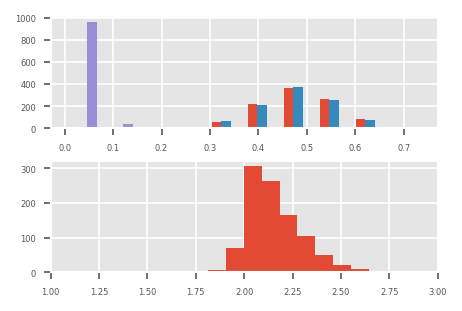

In [24]:
# Pick some equilibria vaguely with Dirichlet dists
np.random.seed(667)
eqDensities_3 = np.random.dirichlet(alpha=(20,20,1), size=1000)
eqDivs_3 = D_1(eqDensities_3)

plt.figure(figsize=(3,2), dpi=150);
plt.subplot(2,1,1);
plt.hist(eqDensities_3);
# plt.legend();

# Diversity histogram centered just above 2...
plt.subplot(2,1,2);
plt.hist(eqDivs_3);
plt.xlim((1,3));
plt.tight_layout();

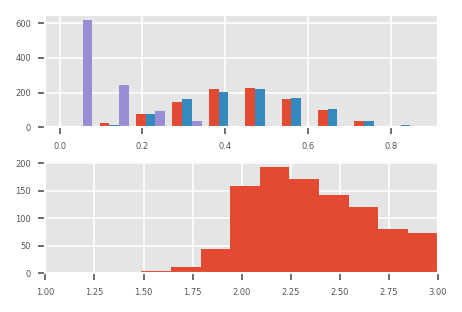

In [25]:
np.random.seed(667)
eqDensities_3_hivar = np.random.dirichlet(alpha=(5,5,1), size=1000)
eqDivs_3_hivar = D_1(eqDensities_3_hivar)

plt.figure(figsize=(3,2), dpi=150);
plt.subplot(2,1,1);
plt.hist(eqDensities_3_hivar);
# plt.legend();

plt.subplot(2,1,2);
plt.hist(eqDivs_3_hivar);
plt.xlim((1,3));
plt.tight_layout();

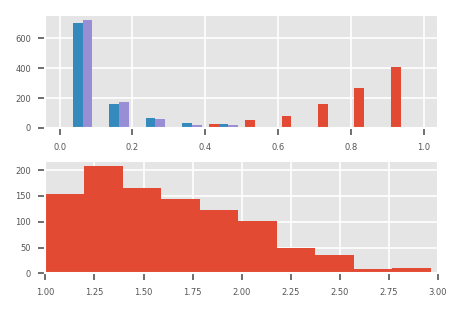

In [26]:
# Get enough low-diversity equilibria.
np.random.seed(667)
eqDensities_3_lo_hivar = np.random.dirichlet(alpha=(5,0.5,0.5), size=1000)
eqDivs_3_lo_hivar = D_1(eqDensities_3_lo_hivar)

plt.figure(figsize=(3,2), dpi=150);
plt.subplot(2,1,1);
plt.hist(eqDensities_3_lo_hivar);
# plt.legend();

plt.subplot(2,1,2);
plt.hist(eqDivs_3_lo_hivar);
plt.xlim((1,3));
plt.tight_layout();

In [27]:
# Repeat for Resources
np.random.seed(668)
eqDensities_3_lo_hivar_R = np.random.dirichlet(alpha=(5,0.5,0.5), size=1000)
eqDivs_3_lo_hivar_R = D_1(eqDensities_3_lo_hivar_R)

eqDensities_3_hivar_R = np.random.dirichlet(alpha=(5,5,1), size=1000)
eqDivs_3_hivar_R = D_1(eqDensities_3_hivar_R)

In [28]:
# Now concatenate the hi-variance sample with the lo-diversity sample to get sth roughly unif
eqDivs_supersamp = np.concatenate([eqDivs_3_hivar, eqDivs_3_lo_hivar])
eqDensities_supersamp = np.concatenate([eqDensities_3_hivar, eqDensities_3_lo_hivar])

In [29]:
eqDivs_supersamp_R = np.concatenate([eqDivs_3_hivar_R, eqDivs_3_lo_hivar_R])
eqDensities_supersamp_R = np.concatenate([eqDensities_3_hivar_R, eqDensities_3_lo_hivar_R])

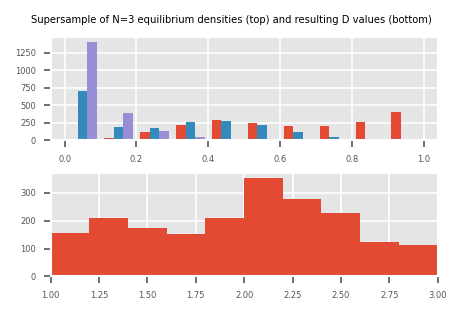

In [30]:
# Plotting supersample of EQ densities and the resulting D values. Now, need to thin for uniformity.
plt.figure(figsize=(3,2), dpi=150);
plt.subplot(2,1,1);
plt.hist(eqDensities_supersamp);
# plt.legend();

plt.subplot(2,1,2);
plt.hist(eqDivs_supersamp);
plt.xlim((1,3));

plt.suptitle('Supersample of N=3 equilibrium densities (top) and resulting D values (bottom)');
plt.tight_layout();

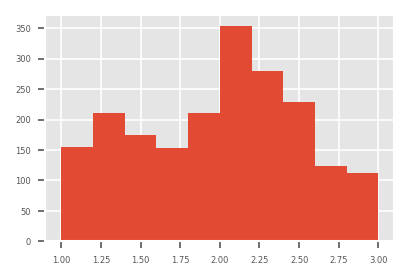

In [31]:
# Now, remove ~1000 elements such that the mohawk is removed, uniformity somewhat satisfied.
# How to remove from only the most populated bins?
# Start by getting the bins from the above histogram.
    # Then, weed out values at random from overrepresented bins.
plt.figure(figsize=(3,2), dpi=150);
(counts, bins, patches) = plt.hist(eqDivs_supersamp, bins=np.linspace(1,3,11))

plt.show();

In [32]:
bins_3_C0 = np.array(bins)

In [33]:
digs = np.digitize(eqDivs_supersamp, bins)

In [34]:
digs_R = np.digitize(eqDivs_supersamp_R, bins)

In [35]:
# fine, for loop
eqDensities_subsamp = np.zeros((1000,3))
eqDivs_subsamp = np.zeros(1000)
for i in range(1,11):
    # print(i)
    eqDensities_subsamp[100*(i-1):100*(i)] = (eqDensities_supersamp[i==digs][:100])
    eqDivs_subsamp[100*(i-1):100*(i)] = (eqDivs_supersamp[i==digs][:100])

In [36]:
eqDensities_subsamp_R = np.zeros((1000,3))
eqDivs_subsamp_R = np.zeros(1000)
for i in range(1,11):
    # print(i)
    eqDensities_subsamp_R[100*(i-1):100*(i)] = (eqDensities_supersamp_R[i==digs_R][:100])
    eqDivs_subsamp_R[100*(i-1):100*(i)] = (eqDivs_supersamp_R[i==digs_R][:100])
    

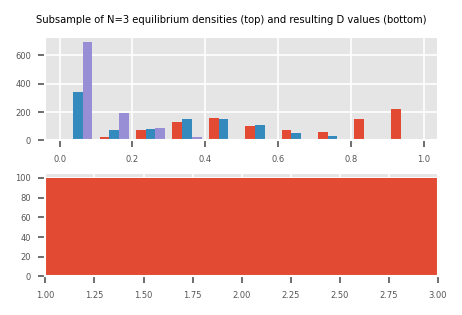

In [37]:
plt.figure(figsize=(3,2), dpi=150);
plt.subplot(2,1,1);
plt.hist(eqDensities_subsamp);
# plt.legend();

plt.subplot(2,1,2);
# plt.hist(eqDivs_supersamp);


# plt.figure(figsize=(3,2), dpi=150);
counts_sub, bins_sub, patches_sub = plt.hist(eqDivs_subsamp, bins=bins_3_C0);
plt.suptitle("Subsample of N=3 equilibrium densities (top) and resulting D values (bottom)");
plt.xlim((1,3));
plt.tight_layout();

plt.show();

In [38]:
eqDensities_3_subsamp = eqDensities_subsamp.copy().reshape(1000,3,1)
eqDivs_3_subsamp = eqDivs_subsamp.copy()

In [39]:
# Also need resource densities, but their distribution doesn't matter, does it?
## Yes, it does.
np.random.seed(667)
eqDensities_3_R = np.random.uniform(0,1,(1000,3,1))


In [40]:
J_3_C0 = community_matr_gen_noP(n_=3, k_=1000, C_=np.eye(3), eps_=0.25, R_star_=eqDensities_3_R, S_star_=eqDensities_3_subsamp)


In [41]:
J_3_C0_fixed = community_matr_gen_noP(n_=3, k_=1000, C_=np.eye(3), eps_=0.25, R_star_=eqDensities_subsamp_R, S_star_=eqDensities_3_subsamp)


In [42]:
unifD_3_R_0 = init_res(J_3_C0)
unifD_3_R_inf = asym_res(J_3_C0)
unifD_3_I_S = np.zeros(1000)
for i in range(1000):
    unifD_3_I_S[i] = stoch_invar(J_3_C0[i,:,:])
unifD_3_I_D = np.zeros(1000)
for i in range(1000):
    unifD_3_I_D[i] = -1/minimize_scalar(determ_invar_OBJ, bracket = (0,3), args=(J_3_C0[i,:,:]), method='brent').fun


In [43]:
unifD_3_R_0_fixed = init_res(J_3_C0_fixed)
unifD_3_R_inf_fixed = asym_res(J_3_C0_fixed)
unifD_3_I_S_fixed = np.zeros(1000)
for i in range(1000):
    unifD_3_I_S_fixed[i] = stoch_invar(J_3_C0_fixed[i,:,:])
unifD_3_I_D_fixed = np.zeros(1000)
for i in range(1000):
    unifD_3_I_D_fixed[i] = -1/minimize_scalar(determ_invar_OBJ, bracket = (0,3), args=(J_3_C0_fixed[i,:,:]), method='brent').fun


In [44]:
print("All systems stable? ", np.all(eigvals(J_3_C0).real<0))

All systems stable?  True


In [45]:
print("All systems stable? ", np.all(eigvals(J_3_C0_fixed).real<0))

All systems stable?  True


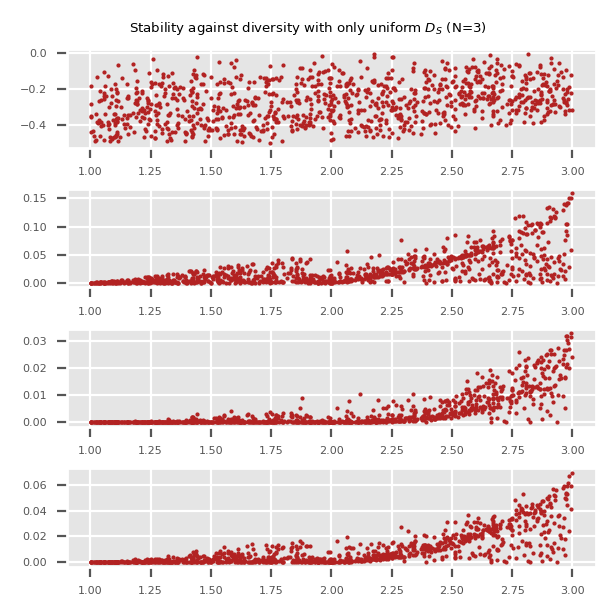

In [46]:
plt.figure(figsize=(3,3), dpi=200);
plt.subplot(4,1,1);
plt.scatter(x=eqDivs_3_subsamp, y=unifD_3_R_0, s=1, color='firebrick');
plt.subplot(4,1,2);
plt.scatter(x=eqDivs_3_subsamp, y=unifD_3_R_inf, s=1, color='firebrick');
plt.subplot(4,1,3);
plt.scatter(x=eqDivs_3_subsamp, y=unifD_3_I_S, s=1, color='firebrick');
plt.subplot(4,1,4);
plt.scatter(x=eqDivs_3_subsamp, y=unifD_3_I_D, s=1, color='firebrick');
plt.suptitle("Stability against diversity with only uniform $D_{S}$ (N=3)");
plt.tight_layout();

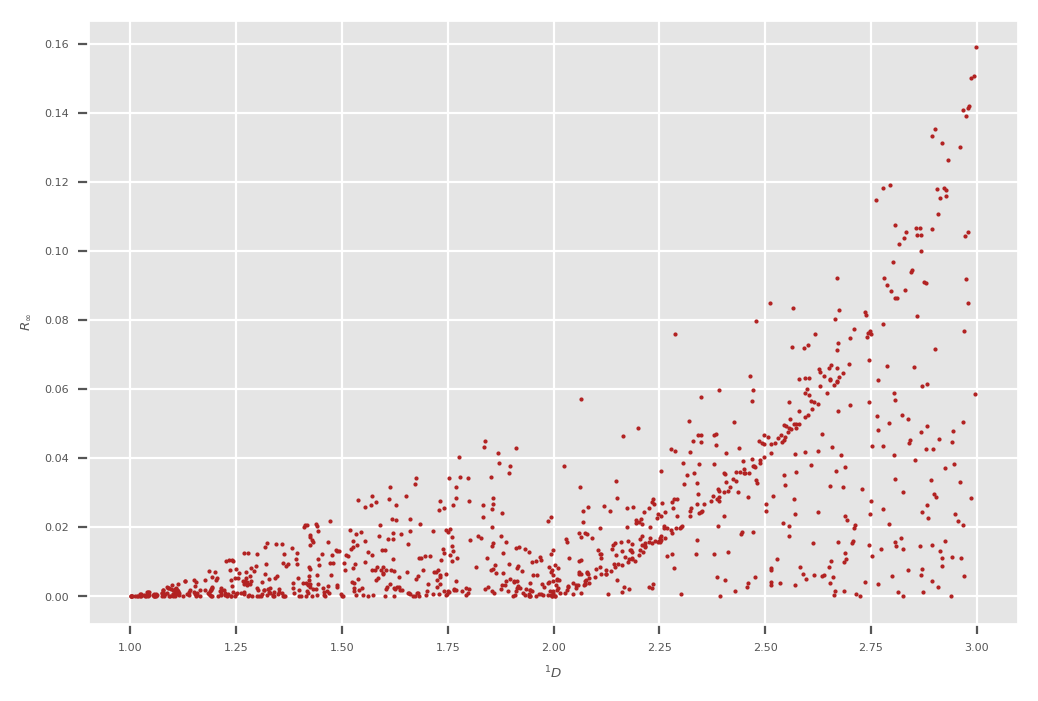

In [47]:
# PECULIAR CURVE. DO YOU SEE IT, TOO?
plt.scatter(x=eqDivs_3_subsamp, y=unifD_3_R_inf, s=1, color='firebrick');
plt.ylabel(r'$R_{\infty}$');
plt.xlabel(r'$^1D$');

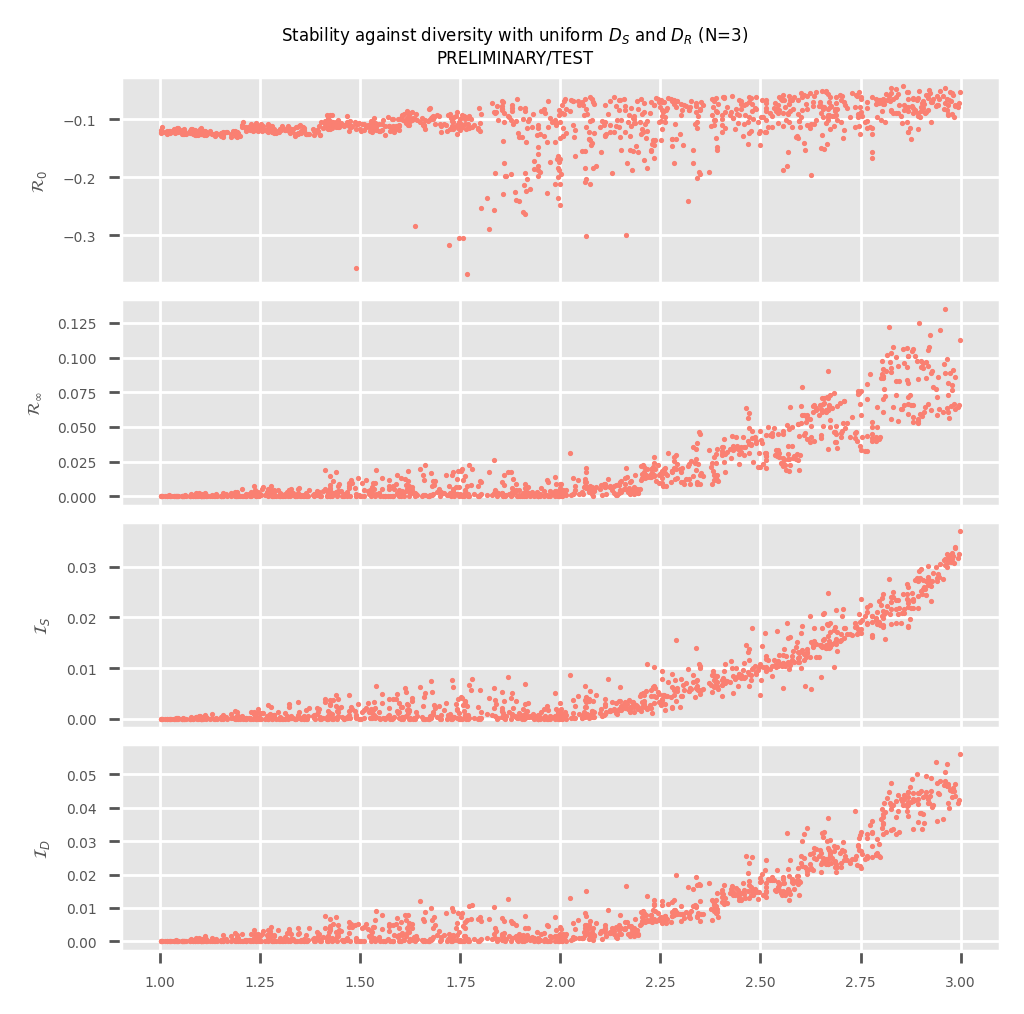

In [48]:
plt.figure(figsize=(4,4), dpi=250);
plt.subplot(4,1,1);
plt.scatter(x=eqDivs_3_subsamp, y=unifD_3_R_0_fixed, s=1, color='salmon');
plt.tick_params('x', which='both', bottom=False, labelbottom=False);
plt.ylabel(r'$\mathcal{R}_{0}$');

plt.subplot(4,1,2);
plt.scatter(x=eqDivs_3_subsamp, y=unifD_3_R_inf_fixed, s=1, color='salmon');
plt.tick_params('x', which='both', bottom=False, labelbottom=False);
plt.ylabel(r'$\mathcal{R}_{\infty}$');

plt.subplot(4,1,3);
plt.scatter(x=eqDivs_3_subsamp, y=unifD_3_I_S_fixed, s=1, color='salmon');
plt.tick_params('x', which='both', bottom=False, labelbottom=False);
plt.ylabel(r'$\mathcal{I}_{S}$');

plt.subplot(4,1,4);
plt.scatter(x=eqDivs_3_subsamp, y=unifD_3_I_D_fixed, s=1, color='salmon');
plt.ylabel(r'$\mathcal{I}_{D}$');

plt.suptitle("Stability against diversity with uniform $D_S$ and $D_R$ (N=3)\nPRELIMINARY/TEST");
plt.tight_layout();
# plt.savefig('./graphics/fixed_OD/OD3_C0_unifD.pdf');

### Resource-competition stability-diversity plots

##### N=2 and the peculiar values of $\mathcal{R}_0$

In [157]:
# # N=2
# # Uncomment to recompute system. Already loaded by now, though.
# OD2_C0_unifD = build_a_sys(n=2, k=1000, ksuper1=10000, ksuper2=10000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=np.eye(2), seed=667)


In [52]:
lwr_idx = OD2_C0_unifD.R_0<-0.13
upr_idx = OD2_C0_unifD.R_0>-0.13

r0_lwr = OD2_C0_unifD.J[lwr_idx]
r0_upr = OD2_C0_unifD.J[upr_idx]

In [53]:
np.mean(eigvals(r0_lwr).real)

-0.25

In [54]:
temp = np.polyfit(OD2_C0_unifD.D_s[lwr_idx].flatten(), init_res((r0_lwr)).flatten(), deg=1)
# temp # Coefficients from linear fit on R_0 against species diversity D, smaller R_0

temp2 = np.polyfit(OD2_C0_unifD.D_s[upr_idx].flatten(), init_res((r0_upr)).flatten(), deg=1)
# temp2 # Coefficients from linear fit on R_0 against species diversity D, greater  R_0

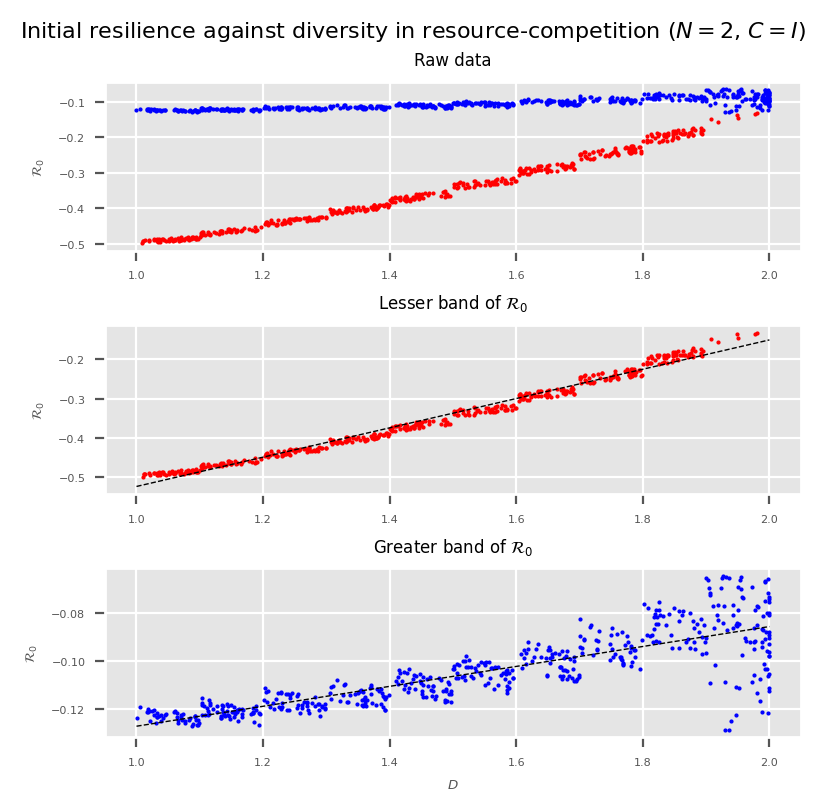

In [98]:
plt.figure(figsize=(4,4), dpi=200);
plt.suptitle("Initial resilience against diversity in resource-competition ($N=2$, $C=I$)", fontsize=8);

plt.subplot(3,1,1);
# plt.scatter(OD2_C0_unifD.D_s, init_res((OD2_C0_unifD.J)), s=1);
plt.scatter(OD2_C0_unifD.D_s[lwr_idx], init_res((r0_lwr)), s=1, color='red');
plt.scatter(OD2_C0_unifD.D_s[upr_idx], init_res((r0_upr)), s=1, color='blue');
plt.ylabel("$\mathcal{R}_0$");
plt.title("Raw data", fontsize=6);

plt.subplot(3,1,2);
plt.scatter(OD2_C0_unifD.D_s[lwr_idx], init_res((r0_lwr)), s=1, color='red');
plt.plot(np.linspace(1,2,100), temp[0]*np.linspace(1,2,100)+temp[1], c='k', linewidth=0.5, linestyle='--');
plt.ylabel("$\mathcal{R}_0$");
plt.title("Lesser band of $\mathcal{R}_0$", fontsize=6);

plt.subplot(3,1,3);
plt.scatter(OD2_C0_unifD.D_s[upr_idx], init_res((r0_upr)), s=1, color='blue');
plt.plot(np.linspace(1,2,100), temp2[0]*np.linspace(1,2,100)+temp2[1], c='black', linewidth=0.5, linestyle='--');
plt.ylabel("$\mathcal{R}_0$");
plt.title("Greater band of $\mathcal{R}_0$", fontsize=6);
plt.xlabel("$D$");

plt.tight_layout();

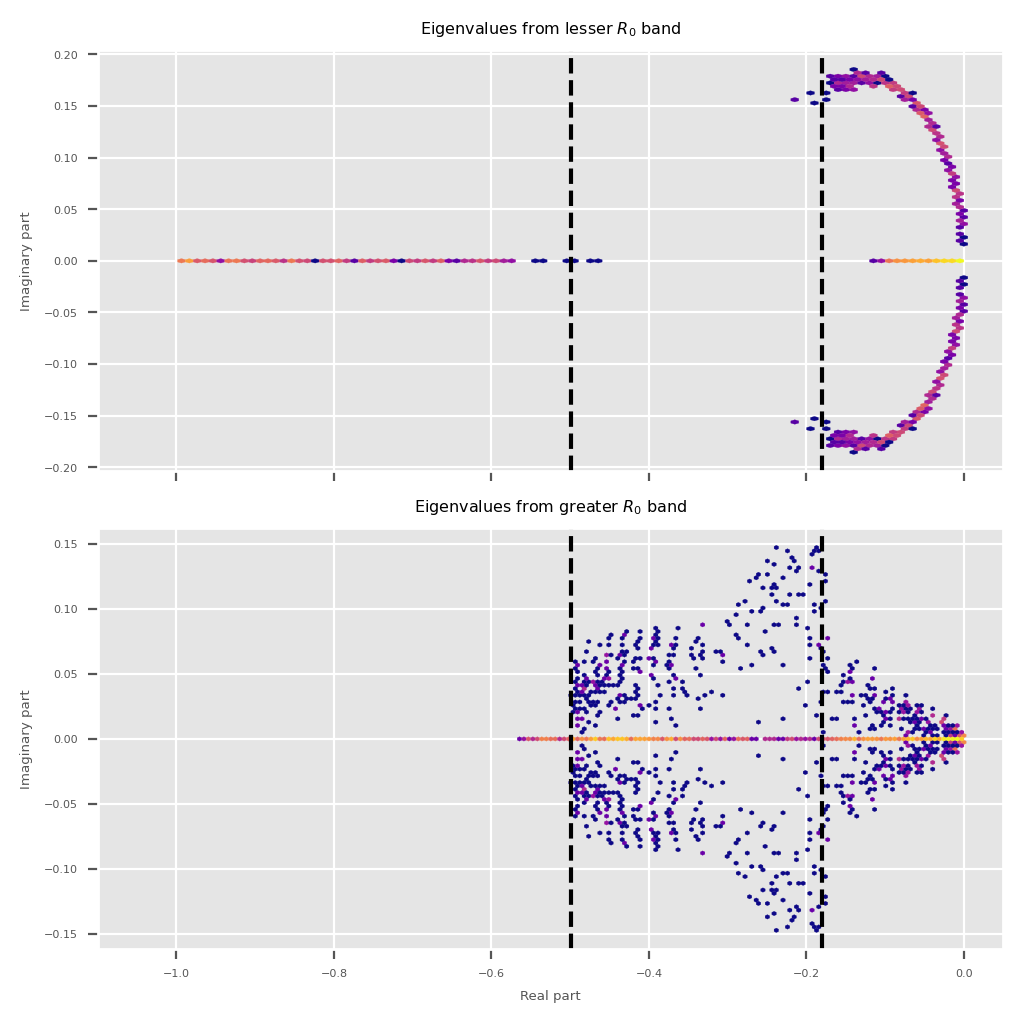

In [105]:
fig, ax = plt.subplots(2, 1, figsize=(5,5), sharex=True, constrained_layout=True)
# fig.tight_layout()


# plt.subplots(2,1,1, figsize=(3,3));
cmap = mpl.cm.get_cmap("plasma").copy()
cmap.set_under(color = 'white', alpha = 0) 
ax[0].set_title("Eigenvalues from lesser $R_0$ band");
ax[0].hexbin(eigvals(r0_lwr).real, eigvals(r0_lwr).imag, bins='log', cmap=cmap, linewidths=0.1);
ax[0].axvline(-0.18, linestyle='--', c='k');
ax[0].axvline(np.min(OD2_C0_unifD.R_0), linestyle='--', c='k');
ax[0].set_ylabel("Imaginary part");


plt.xlim((-1.1,0.05));
# pc = ax[0].pcolormesh(Z, norm=colors.CenteredNorm(), cmap=cmap)
# ax[0].set_clim(10**(-8), 5) ### color limits, increase upper for better contrast



# plt.subplots(2,1,2, figsize=(3,3));
# cmap = mpl.cm.get_cmap("plasma").copy()
# cmap.set_under(color = 'white', alpha = 0) 
ax[1].set_title("Eigenvalues from greater $R_0$ band");
ax[1].hexbin(eigvals(r0_upr).real, eigvals(r0_upr).imag,  bins='log', cmap=cmap, linewidths=0.1);
ax[1].axvline(-0.18, linestyle='--', c='k');
ax[1].axvline(np.min(OD2_C0_unifD.R_0), linestyle='--', c='k');
ax[1].set_xlabel("Real part");
ax[1].set_ylabel("Imaginary part");



plt.xlim((-1.1,0.05));
# plt.tight_layout();

In [176]:
OD2_C0_unifD.S_star[lwr_idx][3] # True if S1 is greater than S2

array([[0.0116553],
       [0.9883447]])

In [177]:
np.any((np.diff(OD2_C0_unifD.S_star[lwr_idx][:], axis=1) < 0).flatten() == (np.diff(OD2_C0_unifD.R_star[lwr_idx][:], axis=1) < 0).flatten())


False

In [178]:
# np.all((np.diff(OD2_C0_unifD.S_star[upr_idx][idx], axis=0)<0).flatten() == (np.diff(OD2_C0_unifD.R_star[upr_idx][idx], axis=0)<0).flatten())

##### N=3

In [197]:
# OD_stab_div_plot(OD3_C0_unifD, fsize=(4,4), div_idx_=[5], title="Strict Specialist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD3_C0_unifD')


In [198]:
# stab_stab_plot(OD3_CL1_unifD, 'firebrick', 'O\'Dwyer', 3, 'I', ', no P, fixed')

##### N=5

In [195]:
# # OD_stab_div_plot(OD5_C0_unifD)
# OD_stab_div_plot(OD5_C0_unifD, fsize=(4,4), div_idx_=[5], title="Roughly uniform D (N=5)", 
#                  one_col = 'salmon' , s_=3, fontsize=6, lowess_frac=2./3, save_as='./graphics/fixed_OD/OD5_C0_unifD.pdf')


In [196]:
# stab_stab_plot(OD5_C0_unifD, 'firebrick', 'O\'Dwyer', 5, 'I', ', no P, fixed')

##### N=10

In [199]:
# OD_stab_div_plot(OD10_C0_unifD, fsize=(4,4), div_idx_=[5], title="Strict Specialist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=0.25, save_as=r'./graphics/fixed_OD/OD10_C0_unifD')


##### N=15

In [200]:
# OD_stab_div_plot(OD15_C0_unifD, fsize=(4,4), div_idx_=[5], title="Strict Specialist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD15_C0_unifD')


#### CL1

In [211]:
# # N=2
# OD2_CL1_unifD = build_a_sys(n=2, k=1000, ksuper1=10000, ksuper2=10000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CL1[:2,:2], seed=667)


In [212]:
# plt.imshow(OD2_CL1_unifD.C);
# plt.grid(False);
OD2_CL1_unifD.C

array([[0.8060564, 0.0791914],
       [0.2550504, 0.9370096]])

In [213]:
# OD_stab_div_plot(OD2_CL1_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Specialist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD2_CL1_unifD')


In [214]:
# # N=3
# OD3_CL1_unifD = build_a_sys(n=3, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CL1[:3,:3], seed=999)


In [215]:
np.all(eigvals(OD3_CL1_unifD.J).real < 0)

True

In [216]:
# OD_stab_div_plot(OD3_CL1_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Specialist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD3_CL1_unifD')


In [217]:
# # N=5
# OD5_CL1_unifD = build_a_sys(n=5, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CL1[:5,:5], seed=100)


In [218]:
np.all(eigvals(OD5_CL1_unifD.J).real < 0)

True

In [219]:
# OD_stab_div_plot(OD5_CL1_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Specialist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD5_CL1_unifD')


In [220]:
# # N=10
# OD10_CL1_unifD = build_a_sys(n=10, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CL1[:10,:10], seed=150)


In [221]:
np.all(eigvals(OD10_CL1_unifD.J).real < 0)

True

In [222]:
# OD_stab_div_plot(OD10_CL1_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Specialist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD10_CL1_unifD')


In [223]:
# # N=15
# OD15_CL1_unifD = build_a_sys(n=15, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=1.5, alphas2=(0.25,2), tune=0.2, C=CL1[:15,:15], seed=990)


In [224]:
np.all(eigvals(OD15_CL1_unifD.J).real < 0)

eigvals(OD15_CL1_unifD.J).real.max()

False

7.807890586342913e-18

In [225]:
# OD_stab_div_plot(OD15_CL1_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Specialist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD15_CL1_unifD')


#### CL2

In [226]:
# # N=2
# OD2_CL2_unifD = build_a_sys(n=2, k=1000, ksuper1=10000, ksuper2=10000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CL2[:2,:2], seed=667)


In [227]:
np.all(eigvals(OD2_CL2_unifD.J).real < 0)

True

In [228]:
# OD_stab_div_plot(OD2_CL2_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Generalist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=0.5, save_as=r'./graphics/fixed_OD/OD2_CL2_unifD')


In [229]:
np.mean(CL2)

0.8565111816329092

In [230]:
# # N=3
# OD3_CL2_unifD = build_a_sys(n=3, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CL2[:3,:3], seed=999)


In [231]:
np.all(eigvals(OD3_CL2_unifD.J).real < 0)

True

In [232]:
# OD_stab_div_plot(OD3_CL2_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Generalist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=0.5, save_as=r'./graphics/fixed_OD/OD3_CL2_unifD')


In [233]:
# plt.scatter(x = OD3_CL2_unifD.D_S, y = OD3_CL2_unifD.R_0, s=1, alpha=0.5);

In [234]:
# plt.scatter(x = OD3_CL2_unifD.D_S, y = OD3_CL2_unifD.R_inf, s=1, alpha=0.5);

In [235]:
# # N=5
# OD5_CL2_unifD = build_a_sys(n=5, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CL2[:5,:5], seed=100)


In [236]:
np.all(eigvals(OD5_CL2_unifD.J).real < 0)

True

In [237]:
# OD_stab_div_plot(OD5_CL2_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Generalist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=0.5, save_as=r'./graphics/fixed_OD/OD5_CL2_unifD')


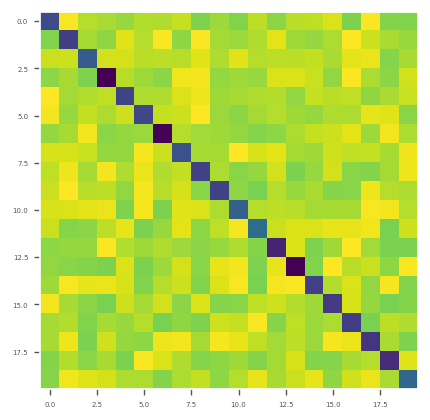

In [238]:
plt.imshow(CL2);
plt.grid(False);

In [239]:
# # N=10
# OD10_CL2_unifD = build_a_sys(n=10, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CL2[:10,:10], seed=150)


In [240]:
np.all(eigvals(OD10_CL2_unifD.J).real < 0)

True

In [241]:
# OD_stab_div_plot(OD10_CL2_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Generalist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD10_CL2_unifD')


In [242]:
# # N=15
# OD15_CL2_unifD = build_a_sys(n=15, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=1.5, alphas2=(0.25,2), tune=0.2, C=CL2[:15,:15], seed=990)


In [243]:
np.all(eigvals(OD15_CL2_unifD.J).real < 0)

eigvals(OD15_CL2_unifD.J).real.max()

False

6.545425473986456e-17

In [244]:
# OD_stab_div_plot(OD15_CL2_unifD, fsize=(4,4), div_idx_=[5], title="Noisy Generalist", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD15_CL2_unifD')


#### CR1

In [245]:
# Use the same build_a_sys() calls as above but with C swapped out. Keep same densities for sake of comparison.

In [246]:
# For this small of C, the qualitative pattern does not really matter, right?
CR1_2 = np.fromfunction(fill_near_diag, (2,2))

CR1_2[-1,0] = 0.9
CR1_2[0,-1] = 0.9

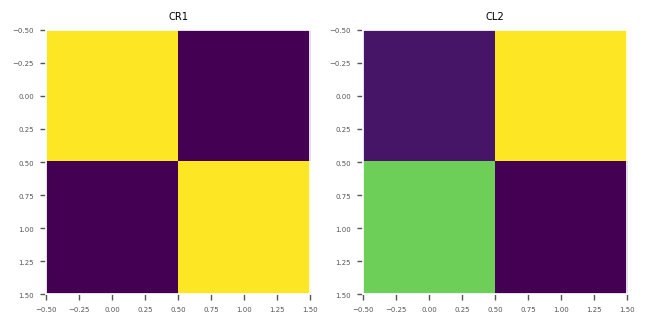

In [247]:
plt.subplot(1,2,1);
plt.imshow(CR1_2);
plt.title('CR1');
plt.grid(False);
plt.subplot(1,2,2);
plt.imshow(CL2[:2,:2]);
plt.title('CL2');
plt.grid(False);

In [248]:
# # N=2
# OD2_CR1_unifD = build_a_sys(n=2, k=1000, ksuper1=10000, ksuper2=10000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR1_2, seed=667)


In [249]:
np.all(eigvals(OD2_CR1_unifD.J).real < 0)

eigvals(OD2_CR1_unifD.J).real.max()

True

-8.296614154721459e-10

In [250]:
# OD_stab_div_plot(OD2_CR1_unifD, fsize=(4,4), div_idx_=[5], title="CR1", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD2_CR1_unifD')


In [251]:
CR1_3 = np.fromfunction(fill_near_diag, (3,3))

CR1_3[-1,0] = 0.9
CR1_3[0,-1] = 0.9

In [252]:
# # N=3
# OD3_CR1_unifD = build_a_sys(n=3, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR1_3, seed=999)


In [253]:
np.all(eigvals(OD3_CR1_unifD.J).real < 0)

eigvals(OD3_CR1_unifD.J).real.max()

True

-3.7684725086898735e-11

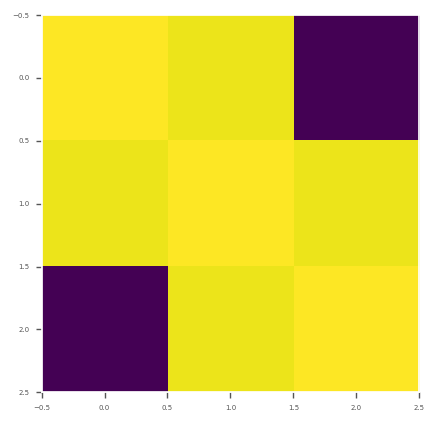

In [254]:
plt.imshow(CR1_3);
plt.grid(False);

In [255]:
# OD_stab_div_plot(OD3_CR1_unifD, fsize=(4,4), div_idx_=[5], title="CR1", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD3_CR1_unifD')


In [256]:
# stab_stab_plot(OD3_CR1_unifD, 'firebrick', 'O\'Dwyer', 3, 'CR1', ', no P, uniform D')

In [257]:
CR1_5 = np.fromfunction(fill_near_diag, (5,5))

CR1_5[-1,0] = 0.9
CR1_5[0,-1] = 0.9

In [258]:
# # N=5
# OD5_CR1_unifD = build_a_sys(n=5, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR1_5, seed=100)


In [259]:
np.all(eigvals(OD5_CR1_unifD.J).real < 0)
np.max(eigvals(OD5_CR1_unifD.J).real)

False

2.835184609468864e-17

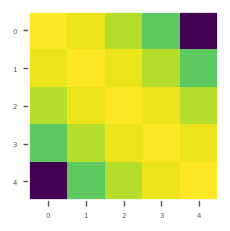

In [260]:
plt.figure(figsize=(2,2));
plt.imshow(CR1_5);
plt.grid(False);

### Scaling equilibrium to fix numerical error

In [261]:
sf = 1e16

temp=community_matr_gen_noP(n_=5, k_=1000, C_=CR1_5, eps_=0.25, R_star_=sf*OD5_CR1_unifD.R_star,S_star_=sf*OD5_CR1_unifD.S_star)


In [262]:
# np.divide(temp[0], (OD5_CR1_unifD.J[0]))

In [263]:
np.nanmin(temp / OD5_CR1_unifD.J)
np.nanmax(temp / OD5_CR1_unifD.J)

C:\Users\riley\AppData\Local\Temp/ipykernel_13768/3422632375.py:1: RuntimeWarning: invalid value encountered in divide
  np.nanmin(temp / OD5_CR1_unifD.J)


9999999999999996.0

C:\Users\riley\AppData\Local\Temp/ipykernel_13768/3422632375.py:2: RuntimeWarning: invalid value encountered in divide
  np.nanmax(temp / OD5_CR1_unifD.J)


1.0000000000000004e+16

In [264]:
np.max(np.abs((init_res(temp).flatten() / OD5_CR1_unifD.R_0.flatten()) - sf))

56.0

In [265]:
(asym_res(temp)).mean()

547.5703797546462

In [266]:
OD5_CR1_unifD.R_inf.mean()

5.4757447433790646e-14

In [267]:
# asym_res(temp)

In [268]:
tempI_S = np.zeros(1000)
for i in range(1000):
    tempI_S[i] = stoch_invar(temp[i,:,:])
            
tempI_D = np.zeros(1000)
for i in range(1000):
    tempI_D[i] = -1/minimize_scalar(determ_invar_OBJ, bracket = (0,3), args=(temp[i,:,:]), method='brent').fun


In [269]:
# tempI_S

In [270]:
# OD5_CR1_unifD.I_S

In [271]:
np.mean(tempI_S / OD5_CR1_unifD.I_S)

1.0385701961669632e+16

In [272]:
np.mean(tempI_D / OD5_CR1_unifD.I_D)

9988860794558758.0

In [273]:
tempI_S.max()

tempI_S.min()

4005.7382528722724

1.780410028589008e-05

In [274]:
OD5_CR1_unifD.D_s[np.argmax(tempI_S)]
OD5_CR1_unifD.D_s[np.argmin(tempI_S)]

array([4.4879206])

array([1.3277754])

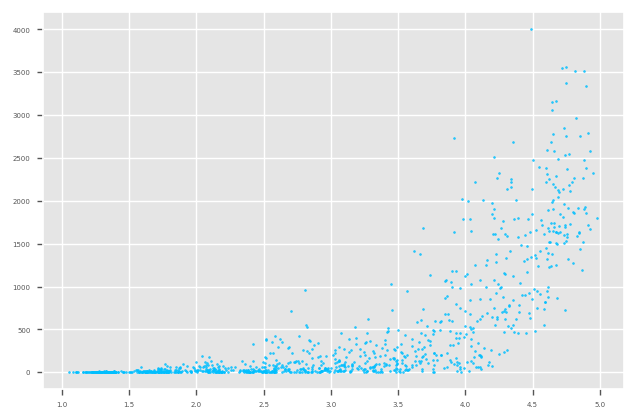

In [275]:
plt.scatter(OD5_CR1_unifD.D_s, tempI_S.flatten(), color='deepskyblue', s=1, alpha=0.75);

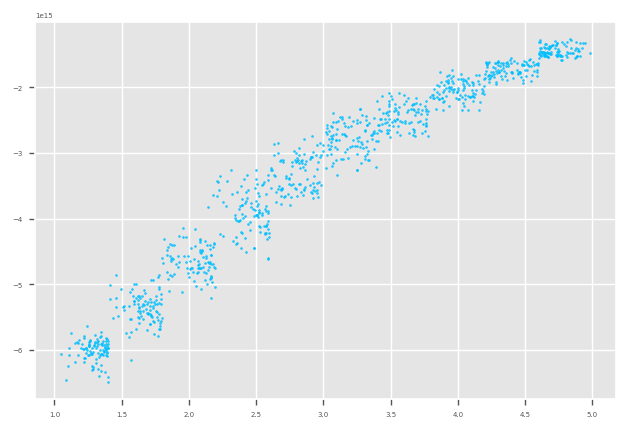

In [276]:
plt.scatter(OD5_CR1_unifD.D_s, init_res(temp).flatten(), color='deepskyblue', s=1, alpha=0.75);

In [277]:
# OD_stab_div_plot(OD5_CR1_unifD, fsize=(4,4), div_idx_=[5], title="CR2", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD5_CR1_unifD')


In [278]:
# stab_stab_plot(OD5_CR1_unifD, 'firebrick', 'O\'Dwyer', 5, 'CR1', ', no P, uniform D')

In [279]:
# plt.hexbin(x=eigvals(OD5_CR1_unifD.J).real, y=eigvals(OD5_CR1_unifD.J).imag);

In [280]:
CR1_10 = np.fromfunction(fill_near_diag, (10,10))

CR1_10[-1,0] = 0.9
CR1_10[0,-1] = 0.9

In [281]:
# # N=10
# OD10_CR1_unifD = build_a_sys(n=10, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR1_10, seed=150)


In [282]:
np.all(eigvals(OD10_CR1_unifD.J).real < 0)

False

In [283]:
# OD_stab_div_plot(OD10_CR1_unifD, fsize=(4,4), div_idx_=[5], title="CR2", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD10_CR1_unifD')


In [284]:
np.max(eigvals(OD10_CR1_unifD.J).real)

2.075265038020711e-16

In [285]:
np.mean(eigvals(OD10_CR1_unifD.J).real)

-0.4749010424636956

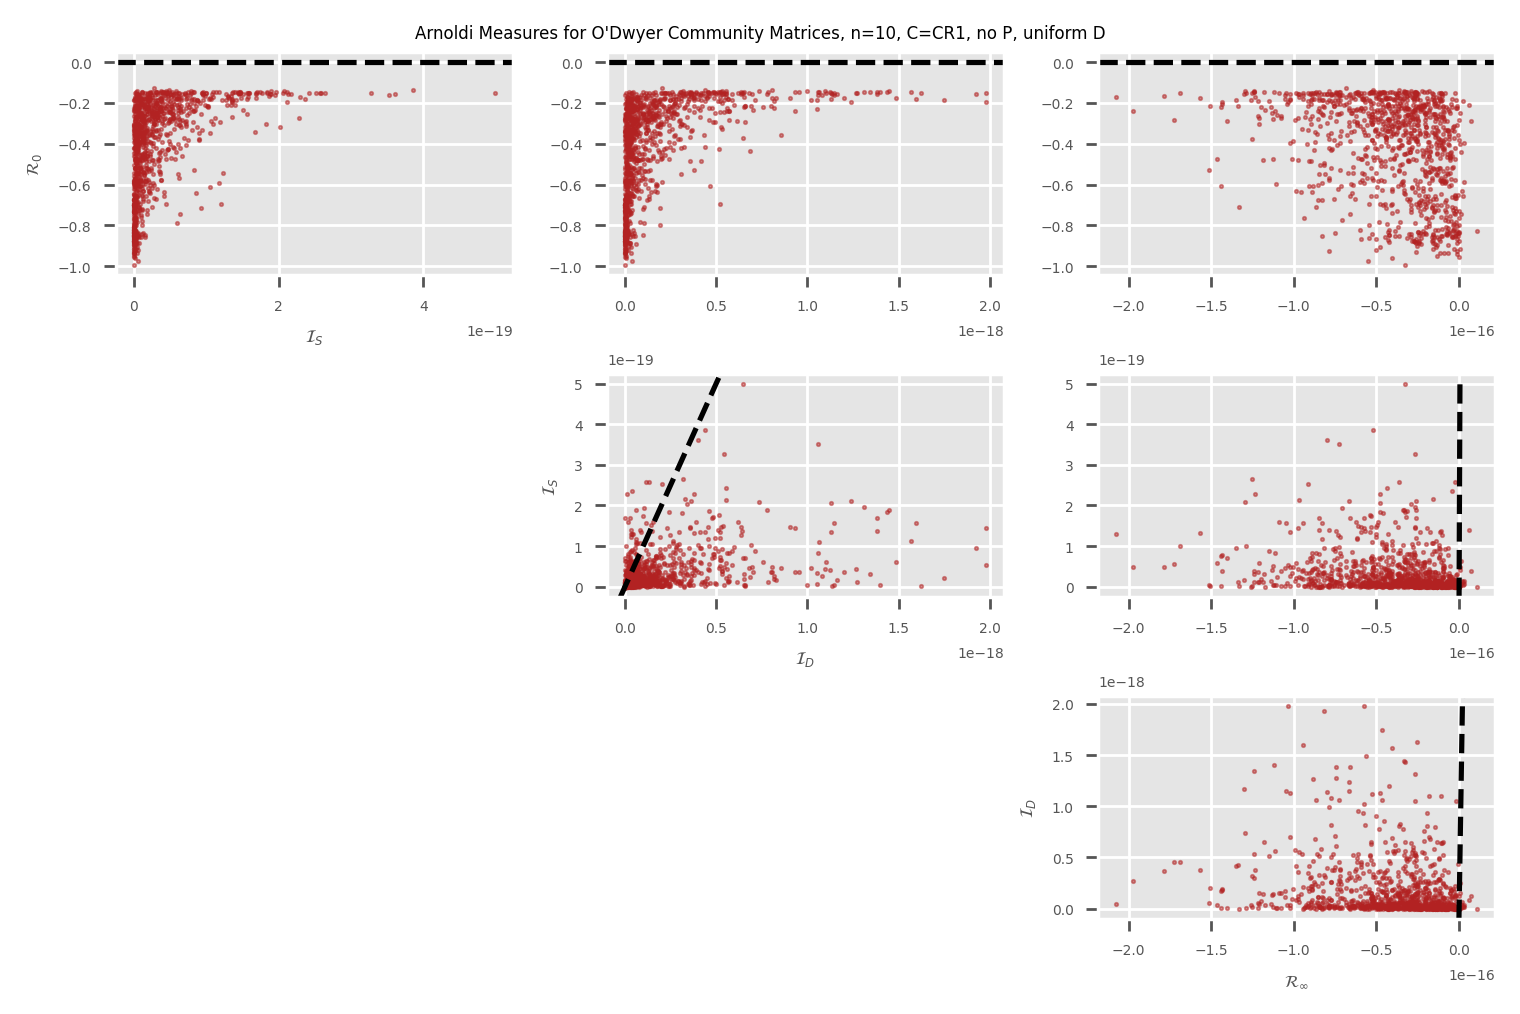

In [286]:
stab_stab_plot(OD10_CR1_unifD, 'firebrick', 'O\'Dwyer', 10, 'CR1', ', no P, uniform D')

In [287]:
CR1_15 = np.fromfunction(fill_near_diag, (15,15))

CR1_15[-1,0] = 0.9
CR1_15[0,-1] = 0.9

In [288]:
# for i in ODs_CR1:
#     print(np.mean(i.R_inf))

In [289]:
# repeat for N=11,12,13,14??? Where this R_inf trend coming from

In [290]:
# # N=15
# OD15_CR1_unifD = build_a_sys(n=15, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=1.5, alphas2=(0.25,2), tune=0.2, C=CR1_15, seed=990)


# np.max(eigvals(OD15_CR1_unifD.J).real)

# # ODs_CR1=[OD3_CR1_unifD,OD5_CR1_unifD,OD10_CR1_unifD,OD15_CR1_unifD]

# OD_stab_div_plot(OD15_CR1_unifD, fsize=(4,4), div_idx_=[5], title="Gaussian-ish Consumer matrix kernel (N=15)", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD15_CR1_unifD')


#### CR2

In [291]:
CR2_2 = np.fromfunction(fill_periodic, (2,2))

CR2_3 = np.fromfunction(fill_periodic, (3,3))

CR2_5 = np.fromfunction(fill_periodic, (5,5))

CR2_10 = CR2.copy()

CR2_15 = np.fromfunction(fill_periodic, (15,15))

In [292]:
# # N=2
# OD2_CR2_unifD = build_a_sys(n=2, k=1000, ksuper1=10000, ksuper2=10000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR2_2, seed=667)


In [293]:
np.all(eigvals(OD2_CR2_unifD.J).real < 0)

eigvals(OD2_CR2_unifD.J).real.max()

True

-6.07189786550438e-11

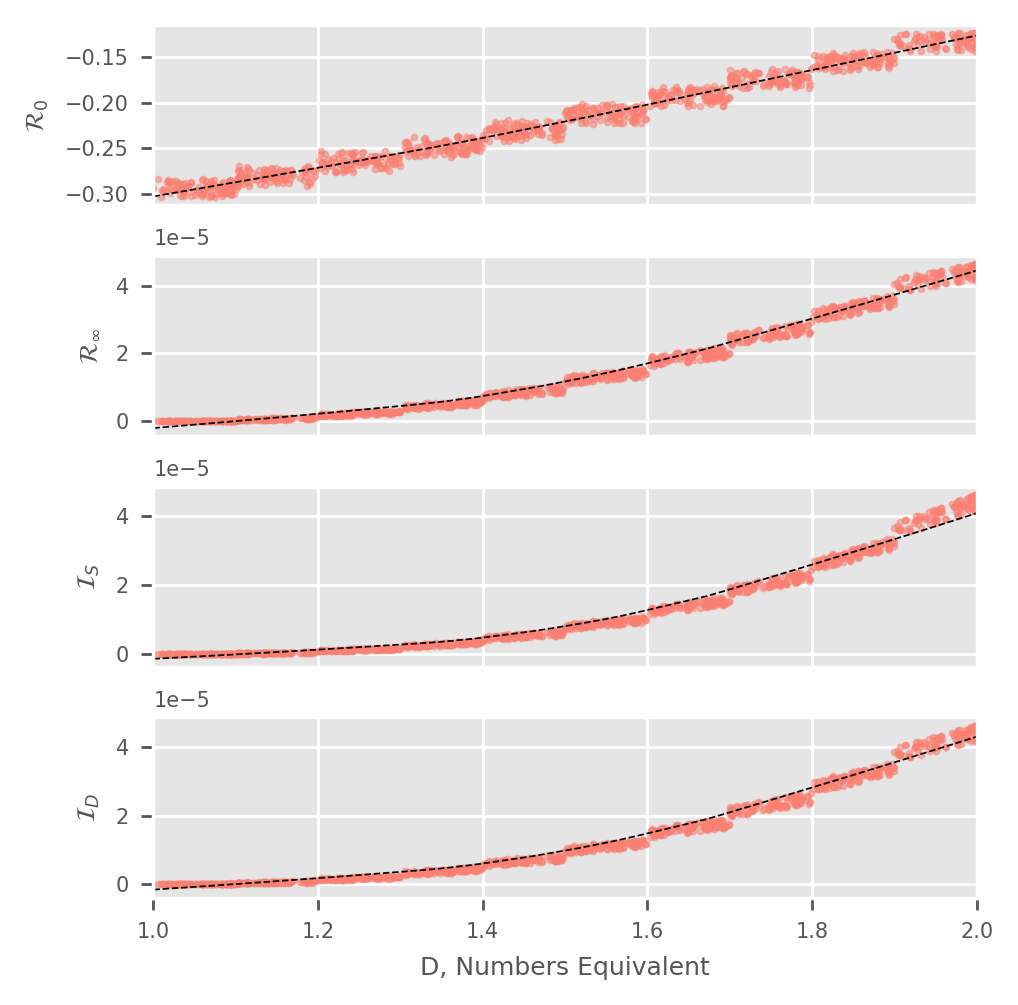

In [294]:
OD_stab_div_plot(OD2_CR2_unifD, fsize=(4,4), div_idx_=[5], title="CR2", one_col = 'salmon', 
                 s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD2_CR2_unifD')


In [295]:
# # N=3
# OD3_CR2_unifD = build_a_sys(n=3, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR2_3, seed=999)


In [296]:
# # N=3, C scaled down
# OD3_CR2_unifD_smallC = build_a_sys(n=3, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR2_3/10, seed=999)


In [297]:
np.all(eigvals(OD3_CR2_unifD.J).real < 0)

True

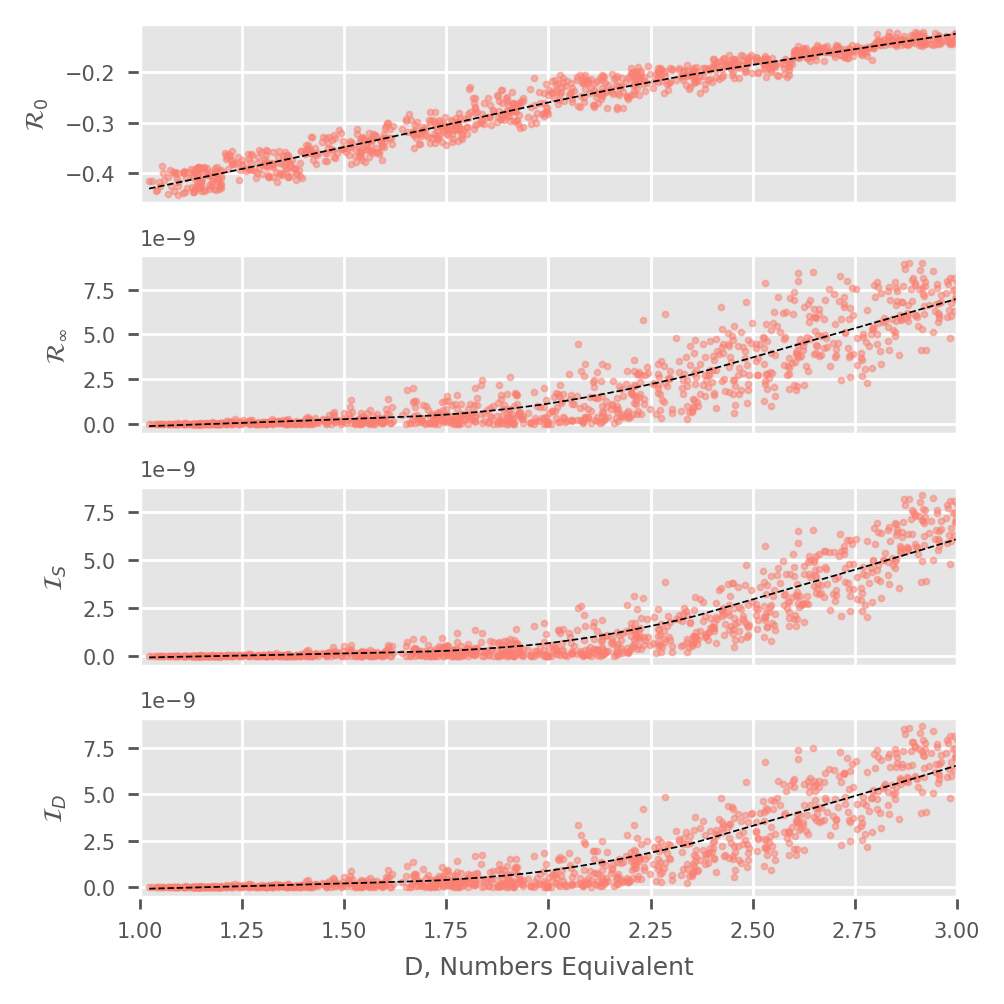

In [298]:
OD_stab_div_plot(OD3_CR2_unifD, fsize=(4,4), div_idx_=[5], title="CR2", one_col = 'salmon', 
                 s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD3_CR2_unifD')


In [299]:
# OD_stab_div_plot(OD3_CR2_unifD_smallC, fsize=(4,4), div_idx_=[5], title="CR2", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3)


In [300]:
# np.mean(OD3_CR2_unifD.R_0 / OD3_CR2_unifD_smallC.R_0)

In [301]:
# # N=5
# OD5_CR2_unifD = build_a_sys(n=5, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR2_5, seed=100)


In [302]:
# # N=5, C scaled up
# OD5_CR2_unifD_hugeC = build_a_sys(n=5, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR2_5*1e17, seed=100)


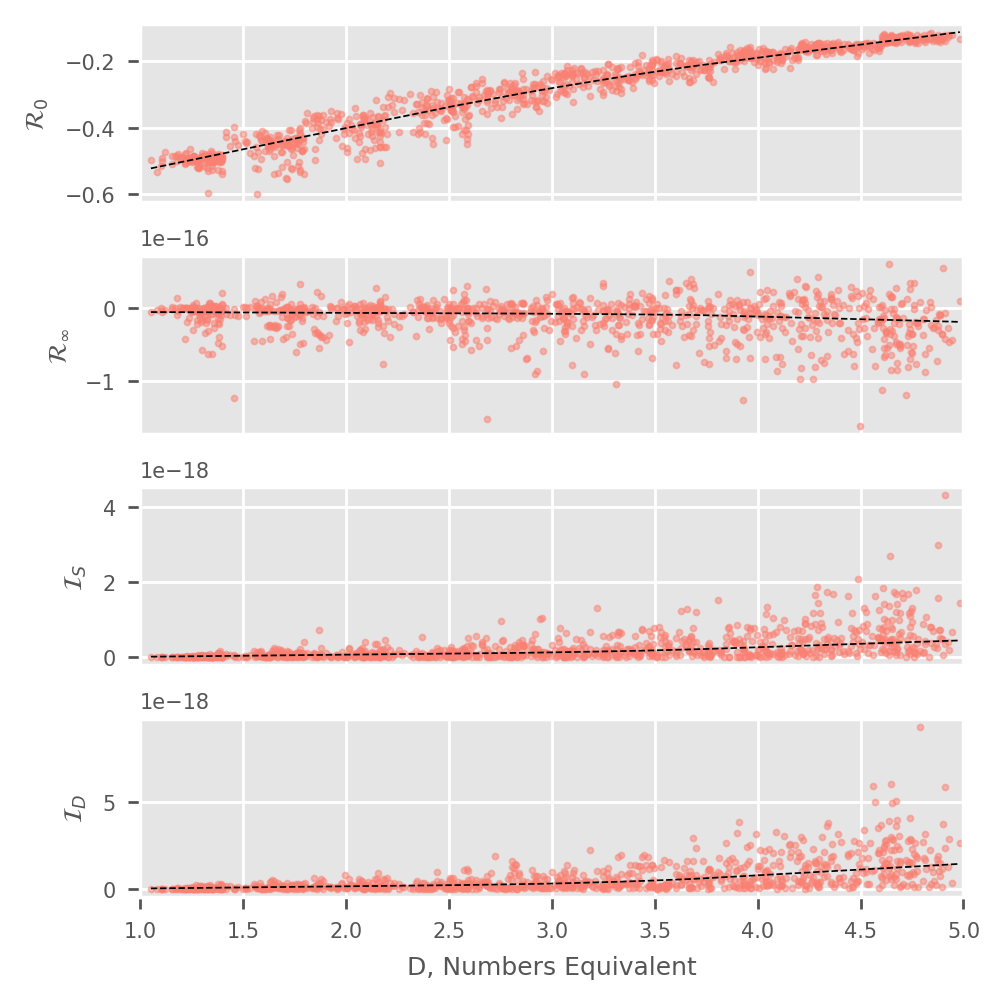

In [303]:
OD_stab_div_plot(OD5_CR2_unifD, fsize=(4,4), div_idx_=[5], title="CR2", one_col = 'salmon', 
                 s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD5_CR2_unifD')


In [304]:
# OD_stab_div_plot(OD5_CR2_unifD_hugeC, fsize=(4,4), div_idx_=[5], title="CR2", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3)


In [305]:
# # N=10
# OD10_CR2_unifD = build_a_sys(n=10, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=2, alphas2=(0.5,2), tune=0.2, C=CR2_10, seed=150)


In [306]:
np.all(eigvals(OD10_CR2_unifD.J).real < 0)

False

In [307]:
np.max(eigvals(OD10_CR2_unifD.J).real)

1.4699860307601919e-16

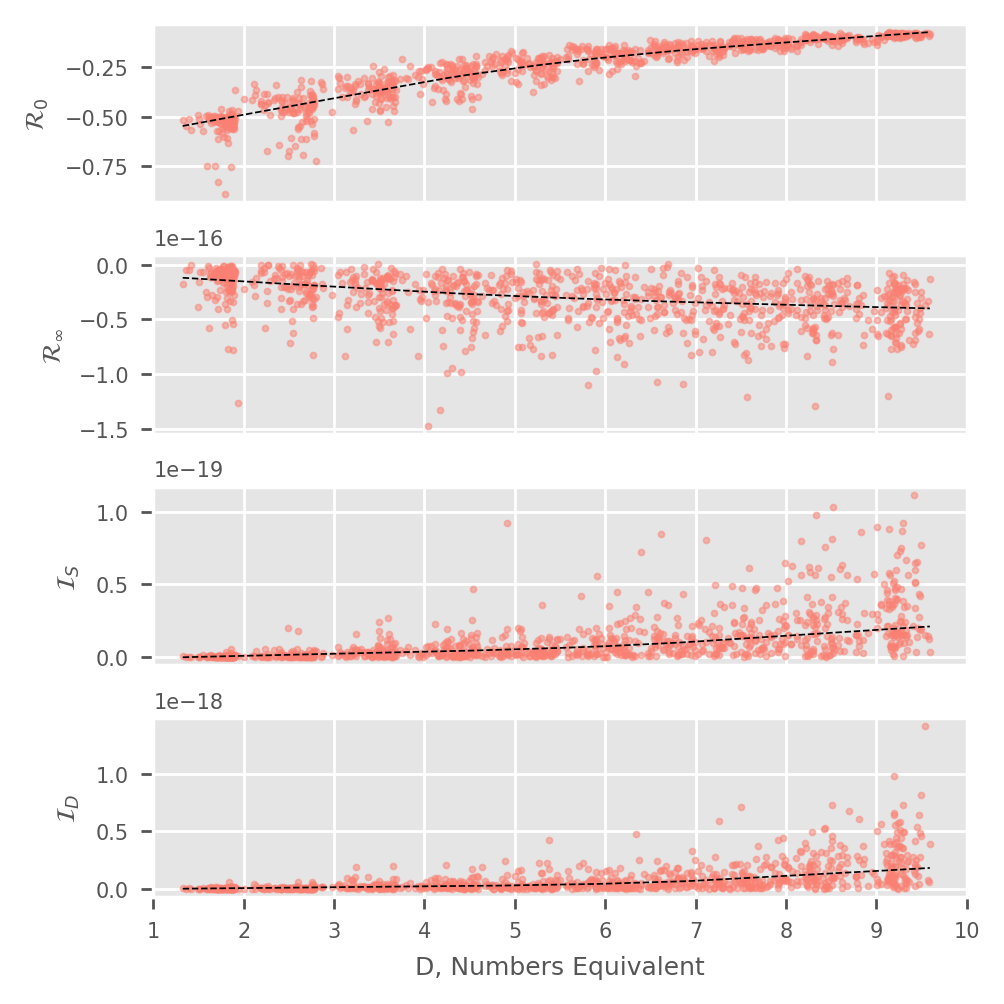

In [308]:
OD_stab_div_plot(OD10_CR2_unifD, fsize=(4,4), div_idx_=[5], title="CR2", one_col = 'salmon', 
                 s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD10_CR2_unifD')


In [309]:
# # N=15
# OD15_CR2_unifD = build_a_sys(n=15, k=1000, ksuper1=150000, ksuper2=150000, alpha1_hi=1.5, alphas2=(0.25,2), tune=0.2, C=CR2_15, seed=990)


# np.all(eigvals(OD15_CR2_unifD.J).real < 0)

# eigvals(OD15_CR2_unifD.J).real.max()

# OD_stab_div_plot(OD15_CR2_unifD, fsize=(4,4), div_idx_=[5], title="CR2", one_col = 'salmon', 
#                  s_=3, fontsize=6, lowess_frac=2./3, save_as=r'./graphics/fixed_OD/OD15_CR2_unifD')


### Save systems

In [310]:
C0_list  = [OD2_C0_unifD, OD3_C0_unifD, OD5_C0_unifD, OD10_C0_unifD, OD15_C0_unifD]
CL1_list = [OD2_CL1_unifD, OD3_CL1_unifD, OD5_CL1_unifD, OD10_CL1_unifD, OD15_CL1_unifD]
CL2_list = [OD2_CL2_unifD, OD3_CL2_unifD, OD5_CL2_unifD, OD10_CL2_unifD, OD15_CL2_unifD]
CR1_list = [OD2_CR1_unifD, OD3_CR1_unifD, OD5_CR1_unifD, OD10_CR1_unifD, OD15_CR1_unifD]
CR2_list = [OD2_CR2_unifD, OD3_CR2_unifD, OD5_CR2_unifD, OD10_CR2_unifD, OD15_CR2_unifD]


In [311]:
# ### Uncomment to SAVE systems ###

# # unifD_list = []
# # C_list = ['C0', 'CL1', 'CL2', 'CR1', 'CR2']
# N_list = ['2','3','5','10','15']
# for n,sys in zip(N_list,C0_list):
#     with open(r'./OD_Systems_Various_C/OD_unifD/OD{}_C0_unifD.ODsystem'.format(n), 'wb') as OD_obj_file:
#         pickle.dump(sys, OD_obj_file)

# for n,sys in zip(N_list,CL1_list):
#     with open(r'./OD_Systems_Various_C/OD_unifD/OD{}_CL1_unifD.ODsystem'.format(n), 'wb') as OD_obj_file:
#         pickle.dump(sys, OD_obj_file)
        
# for n,sys in zip(N_list,CL2_list):
#     with open(r'./OD_Systems_Various_C/OD_unifD/OD{}_CL2_unifD.ODsystem'.format(n), 'wb') as OD_obj_file:
#         pickle.dump(sys, OD_obj_file)

# for n,sys in zip(N_list,CR1_list):
#     with open(r'./OD_Systems_Various_C/OD_unifD/OD{}_CR1_unifD.ODsystem'.format(n), 'wb') as OD_obj_file:
#         pickle.dump(sys, OD_obj_file)
        
# for n,sys in zip(N_list,CR2_list):
#     with open(r'./OD_Systems_Various_C/OD_unifD/OD{}_CR2_unifD.ODsystem'.format(n), 'wb') as OD_obj_file:
#         pickle.dump(sys, OD_obj_file)


### Exponential fits to stab-div plots

\begin{align}
\ln(y) &= ax+b \\
y &= e^{ax+b} \\
y &= e^{ax}e^{b}
\end{align}


In [312]:
from scipy.optimize import curve_fit

In [313]:
# Log tf of linear
popt, pcov = curve_fit(lambda t, a, b: a*t+b, OD2_C0_unifD.D_S.flatten(), np.log(OD2_C0_unifD.R_inf.flatten()))


In [314]:
popt # [vertical scale, exponent coef] #, vertical translation]

array([ 4.0002495, -9.4021192])

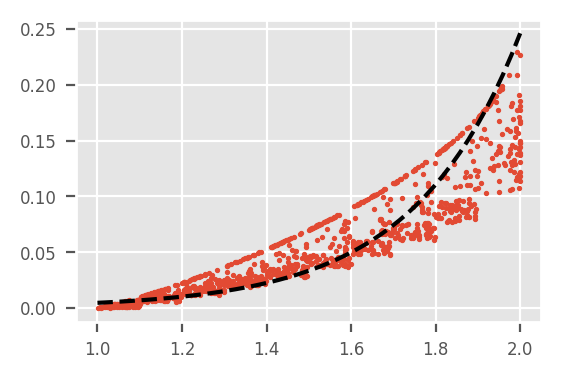

In [315]:
# Log-y linear
plt.figure(figsize=(3,2), dpi=200);
plt.scatter(x=OD2_C0_unifD.D_S.flatten(), y=OD2_C0_unifD.R_inf.flatten(), s=2);
ts = np.linspace(1,2,50)
plt.plot(ts, np.exp(popt[0] * ts) * np.exp(popt[1]), linestyle='--', color='k');

In [316]:
# Log tf of linear
popt, pcov = curve_fit(lambda t, a, b: a*t+b, OD2_C0_unifD.D_S.flatten(), np.log(OD2_C0_unifD.R_inf.flatten()))


### Rational fit stab-div

In [317]:
popt_hyp, pcov_hyp = curve_fit(lambda t, a, b, c: a/(t+b) + c, OD2_C0_unifD.D_S.flatten(), (OD2_C0_unifD.R_inf.flatten()), p0=(-0.1, -2.3, -0.0075))


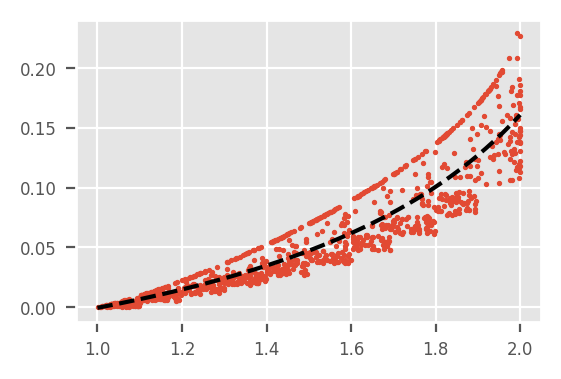

In [318]:
# Rational, x translation makes it nonlinear
plt.figure(figsize=(3,2), dpi=200);
plt.scatter(x=OD2_C0_unifD.D_S.flatten(), y=OD2_C0_unifD.R_inf.flatten(), s=2);
ts = np.linspace(1,2,50)
plt.plot(ts, popt_hyp[0]/(ts + popt_hyp[1]) + popt_hyp[2], linestyle='--', color='k');

In [319]:
OD2_C0_R_inf_SSR = np.sum(np.square(popt_hyp[0]/(OD2_C0_unifD.D_S.flatten() + popt_hyp[1]) + popt_hyp[2] - OD2_C0_unifD.R_inf.flatten()))
# OD2_C0_R_inf_SSR

OD2_C0_R_inf_SST = np.sum(np.square(popt_hyp[0]/(OD2_C0_unifD.D_S.flatten() + popt_hyp[1]) + popt_hyp[2] - np.mean(OD2_C0_unifD.R_inf.flatten())))


1 - (OD2_C0_R_inf_SSR/OD2_C0_R_inf_SST)

0.8306886362667733

In [320]:
popt_hyp

array([-0.2023104, -2.7259906, -0.117738 ])

### OD phase planes / MSE over return

In [12]:
# Really, according to Arnoldi, perturbations should tend to have greater effect on more abundant species.
# This is pretty subjective, I suppose? Is there empirical justification for this 'tendency'?

In [321]:
def OD_eqns(N, t, C, eps, mu, rho):
    n = N.size // 2
    N = N.reshape(-1,1)
    # N[:n], R
    # N[n:], S
    Rprimes = rho - N[:n] * np.dot(C, N[n:]) # np.transpose(np.dot(C, S), (1,0,2))
    Sprimes = eps * N[n:] * np.dot(C.T, N[:n]) - mu * N[n:] # np.transpose(np.dot(C.T, R), (1,0,2)) - mu * S
    return np.concatenate((Rprimes, Sprimes), axis=0).flatten()

In [442]:
def OD_eqns_alt(t, N, C, eps, mu, rho): # Args must be 'time' before 'N' for solve_ivp
    n = N.size // 2
    N = N.flatten()
    Nout = np.zeros((N.size))
    Nout[:n] = (rho - N[:n].reshape(n,1) * np.dot(C, N[n:].reshape(n,1))).flatten() # np.transpose(np.dot(C, S), (1,0,2))
    Nout[n:] = (eps * N[n:].reshape(n,1) * np.dot(C.T, N[:n].reshape(n,1)) - mu * N[n:].reshape(n,1)).flatten() # np.transpose(np.dot(C.T, R), (1,0,2)) - mu * S
    return Nout

In [443]:
# # All events trigger at their ZEROS. Just translate down by desired cutoff threshold.
# def mse_settle(t, y, a,b,c,d): return y - 0.001 # NO, need sth like `mse-0.001`
# mse_settle.terminal=True
# mse_settle.direction=-1

In [457]:
OD_list = [OD2_C0_unifD, OD5_C0_unifD, OD10_C0_unifD,
            OD2_CL1_unifD,OD5_CL1_unifD,OD10_CL1_unifD,
            OD2_CL2_unifD,OD5_CL2_unifD,OD10_CL2_unifD,
            OD2_CR1_unifD,OD5_CR1_unifD,OD10_CR1_unifD,
            OD2_CR2_unifD,OD5_CR2_unifD,OD10_CR2_unifD]

In [396]:
from scipy.integrate import solve_ivp

In [537]:
# # Backup
# def OD_MSE_sim_plot(sys, time, stab_measure, num_perts, time_fast=None, print_plots=True, seed=2, titles=True):
#     stab_min_idx = np.argmin(getattr(sys, stab_measure))
#     stab_min = (getattr(sys, stab_measure))[stab_min_idx]
    
#     stab_max_idx = np.argmax(getattr(sys, stab_measure))
#     stab_max = (getattr(sys, stab_measure))[stab_max_idx]
    
#     eq_min = np.concatenate([sys.R_star[stab_min_idx],sys.S_star[stab_min_idx]])
#     eq_max = np.concatenate([sys.R_star[stab_max_idx],sys.S_star[stab_max_idx]])
    
#     if upto_fast==None:
#         upto_fast = time
    
#     plt.subplot(2,1,1); # Only max plot, then min plot and max plot
#     np.random.seed(2)
#     for i in range(num_perts):
#         u = np.random.uniform(-1,1,(int(sys.n*2),1))
#         ic_max = eq_max + 0.1*u/np.linalg.norm(u)
#         ic_max=np.abs(ic_max.flatten())

#         sol_max = solve_ivp(OD_eqns_alt, t_span=time,  y0=ic_max, args=(sys.C, sys.eps, sys.mu[stab_max_idx], sys.rho[stab_max_idx]), 
#                                dense_output=True, method='LSODA', vectorized=True)

#         mse_max = np.mean(np.square(sol_max.y - eq_max), axis=0)
        
#         _=plt.plot(sol_max.t[:], mse_max[:], alpha=0.05, color='firebrick');
        
#     plt.ylabel("MSE");
#     plt.tick_params(axis='both',  bottom=False,labelbottom=False);
#     if titles:
#         plt.title("MSE over return for maximal {} (N={})".format(stab_measure, sys.n));
    
#     plt.subplot(2,1,2);
#     np.random.seed(2)
#     for i in range(num_perts):
#         u = np.random.uniform(-1,1,(int(sys.n*2),1))
#         ic_min = eq_min + 0.1*u/np.linalg.norm(u)
#         ic_min=np.abs(ic_min.flatten())

#         sol_min = solve_ivp(OD_eqns_alt, t_span=time,  y0=ic_min, args=(sys.C, sys.eps, sys.mu[stab_min_idx], sys.rho[stab_min_idx]), 
#                                dense_output=True, method='LSODA', vectorized=True)

#         mse_min = np.mean(np.square(sol_min.y - eq_min), axis=0)

        
#         _=plt.plot(sol_min.t[:], mse_min[:], alpha=0.05, color='deepskyblue');
        
#     plt.ylabel("MSE");
#     if titles:
#         plt.title("MSE over return for minimal {} (N={})".format(stab_measure, sys.n));
        
        
#     plt.xlabel("Time");
#     plt.tight_layout();
#     plt.show();
    
#     return [sol_min, mse_min, sol_max, mse_max]

In [608]:
# NB: Only considering 2 systems, probably 100 perturbations

# Will simulate the min/max systems of chosen stab measure, plot them, return solution
def OD_MSE_sim_plot(sys, time, stab_measure, num_perts, pert_frac=0.1, time_fast=None, steps_fast=1000, print_plots=True, seed=2, titles=True):
    stab_min_idx = np.argmin(getattr(sys, stab_measure))
    stab_min = (getattr(sys, stab_measure))[stab_min_idx]
    
    stab_max_idx = np.argmax(getattr(sys, stab_measure))
    stab_max = (getattr(sys, stab_measure))[stab_max_idx]
    
    eq_min = np.concatenate([sys.R_star[stab_min_idx],sys.S_star[stab_min_idx]])
    eq_max = np.concatenate([sys.R_star[stab_max_idx],sys.S_star[stab_max_idx]])
    
    if time_fast==None:
        time_fast = time
    
    sols_min = [None]*num_perts
    mses_min = [None]*num_perts
    sols_max = [None]*num_perts
    mses_max = [None]*num_perts
    

    plt.subplot(2,1,2); # Only max plot, then min plot and max plot
    np.random.seed(2)
    for i in range(num_perts):
        u = np.random.uniform(-1,1,(int(sys.n*2),1))
        
        ### MAX stability
        ic_max = eq_max + pert_frac*u/np.linalg.norm(u)
        ic_max=np.abs(ic_max.flatten())

        sol_max = solve_ivp(OD_eqns_alt, t_span=time,  y0=ic_max, args=(sys.C, sys.eps, sys.mu[stab_max_idx], sys.rho[stab_max_idx]), 
                               dense_output=True, method='LSODA', vectorized=True)
        mse_max = np.mean(np.square(sol_max.y - eq_max), axis=0)
        _=plt.plot(sol_max.t[:], mse_max[:], alpha=0.05, color='firebrick');
        
        ### MIN stability
        ic_min = eq_min + pert_frac*u/np.linalg.norm(u)
        ic_min=np.abs(ic_min.flatten())

        sol_min = solve_ivp(OD_eqns_alt, t_span=time,  y0=ic_min, args=(sys.C, sys.eps, sys.mu[stab_min_idx], sys.rho[stab_min_idx]), 
                               dense_output=True, method='LSODA', vectorized=True)
        mse_min = np.mean(np.square(sol_min.y - eq_min), axis=0)
        _=plt.plot(sol_min.t[:], mse_min[:], alpha=0.05, color='deepskyblue');
        
        
        sols_min[i] = sol_min
        mses_min[i] = mse_min
        sols_max[i] = sol_max
        mses_max[i] = mse_max
        
    plt.xlabel("Time");
    plt.ylabel("MSE");
    # plt.tick_params(axis='both',  bottom=False,labelbottom=False);
    if titles:
        plt.title("MSE over return for minimal and maximal {} (N={})".format(stab_measure, sys.n));
    

    plt.subplot(2,1,1);
    np.random.seed(2)
    for i in range(num_perts):
        # u = np.random.uniform(-1,1,(int(sys.n*2),1))
        t_fast = np.linspace(time_fast[0],time_fast[1], steps_fast)
        sol_max = sols_max[i].sol(t_fast)
        mse_max = np.mean(np.square(sol_max-eq_max), axis=0)
        _=plt.plot(t_fast, mse_max, alpha=0.05, color='firebrick');
        
    plt.ylabel("MSE");
    if titles:
        plt.title("MSE over return for maximal {} (N={})".format(stab_measure, sys.n));
        
    
    plt.tight_layout();
    plt.subplots_adjust(hspace=0.35)
    plt.show();
    
    return [sols_min, mses_min, sols_max, mses_max]

In [609]:
# Do the full time plot first (calc'd and plotted together in same for loop)
    # Put them on subplot 2

# Another for loop doing to recalcs for smaller time scale for MAX in subplot 1


### OR just compile MSEs as you go in one big array

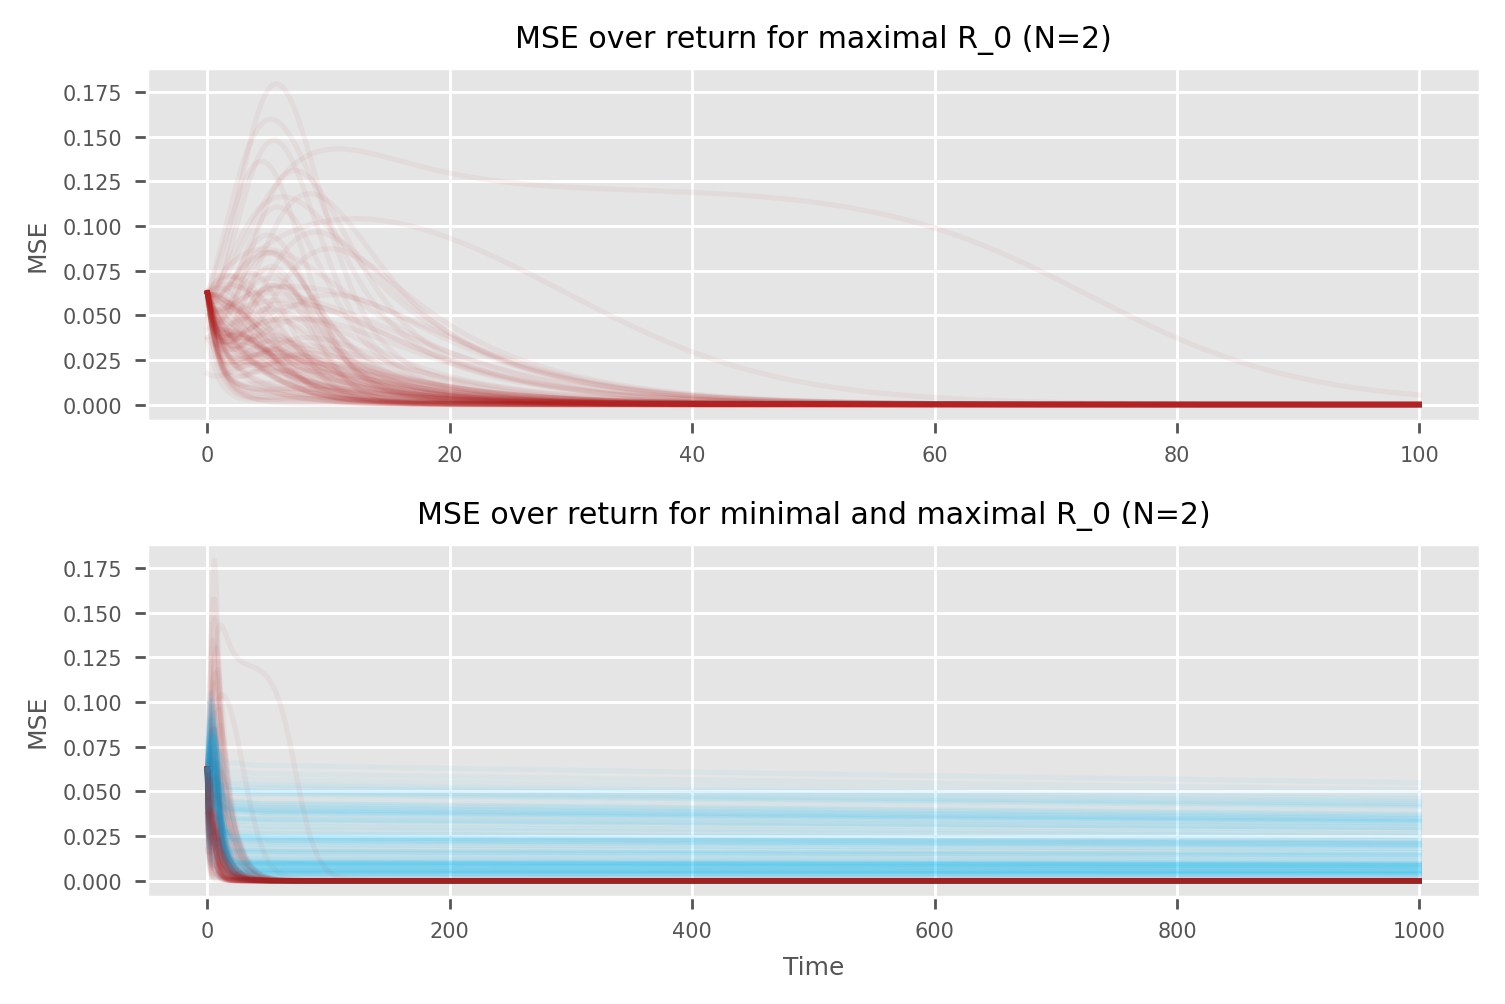

In [625]:
sol2_CL1_minR0, mse2_CL1_minR0, sol2_CL1_maxR0, mse2_CL1_maxR0 = OD_MSE_sim_plot(OD2_CL1_unifD, time=(0,1000), 
                                                                                 time_fast=(0,100), stab_measure="R_0", 
                                                                                 num_perts=100, pert_frac=0.5)



In [617]:
minR0_idx2 = np.argmin(OD2_CL1_unifD.R_0)

In [620]:
minR0_idx2

58

In [621]:
OD2_CL1_unifD.R_0[minR0_idx2]

-0.36685325127263474

In [630]:
OD2_CL1_unifD.D_s[minR0_idx2]

array([1.0095505])

In [618]:
maxR0_idx2 = np.argmax(OD2_CL1_unifD.R_0)

In [619]:
maxR0_idx2

988

In [622]:
OD2_CL1_unifD.R_0[maxR0_idx2]

-0.061337954023653996

In [631]:
OD2_CL1_unifD.D_s[maxR0_idx2]

array([1.9310895])

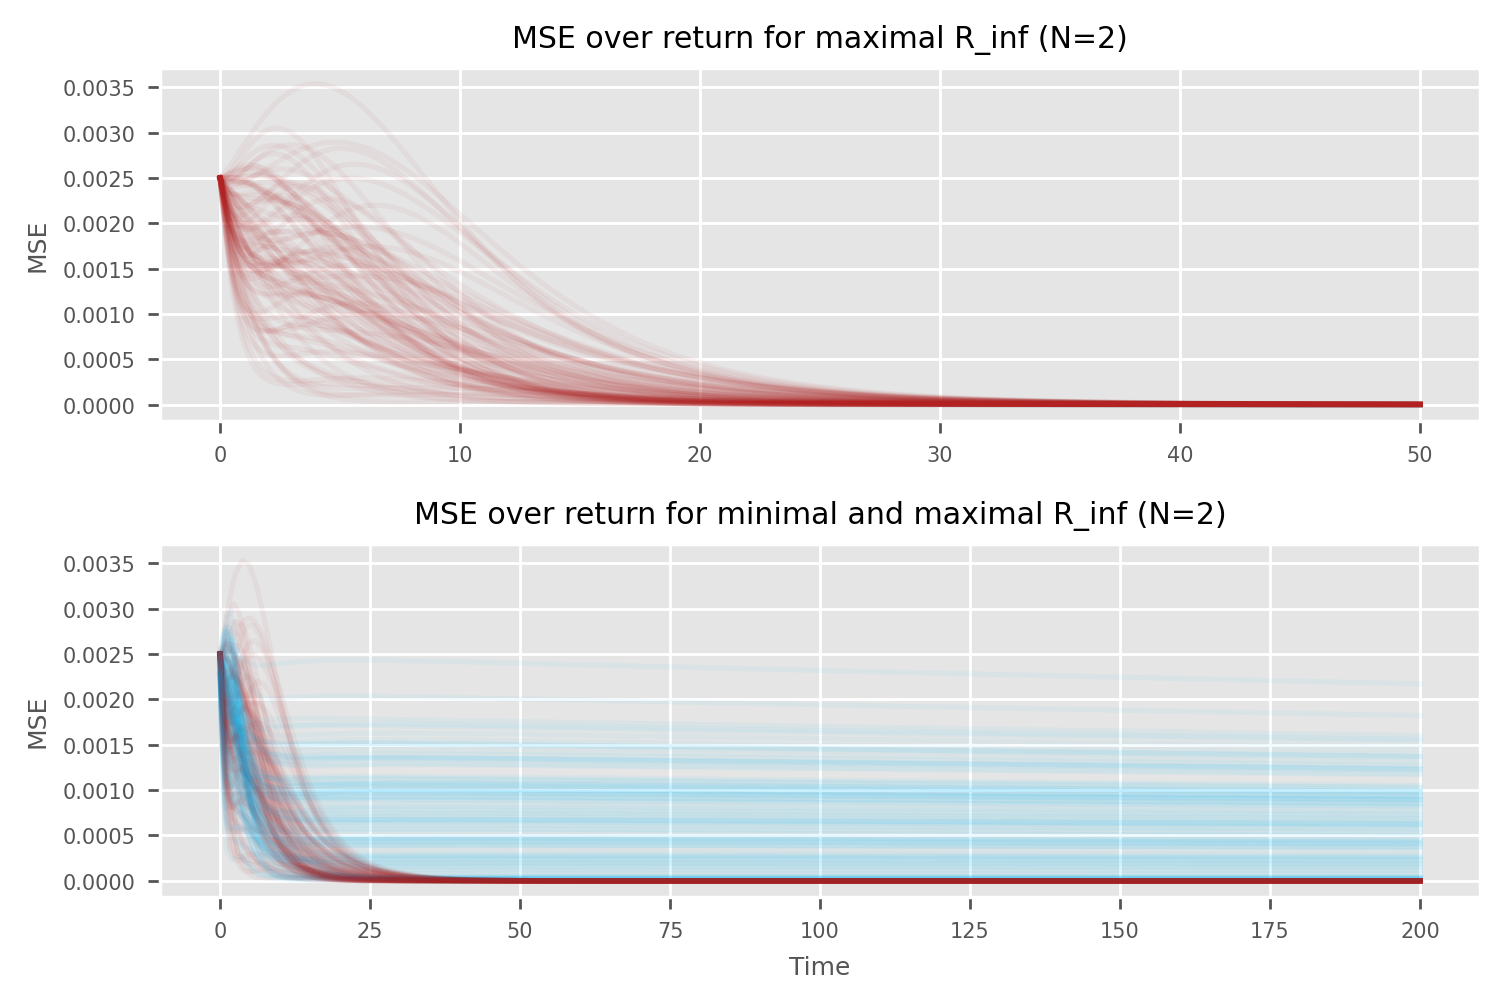

In [633]:
sol2_CL1_minRinf, mse2_CL1_minRinf, sol2_CL1_maxRinf, mse2_CL1_maxRinf = OD_MSE_sim_plot(OD2_CL1_unifD, time=(0,200), time_fast=(0,50), stab_measure="R_inf", num_perts=100, pert_frac=0.1)


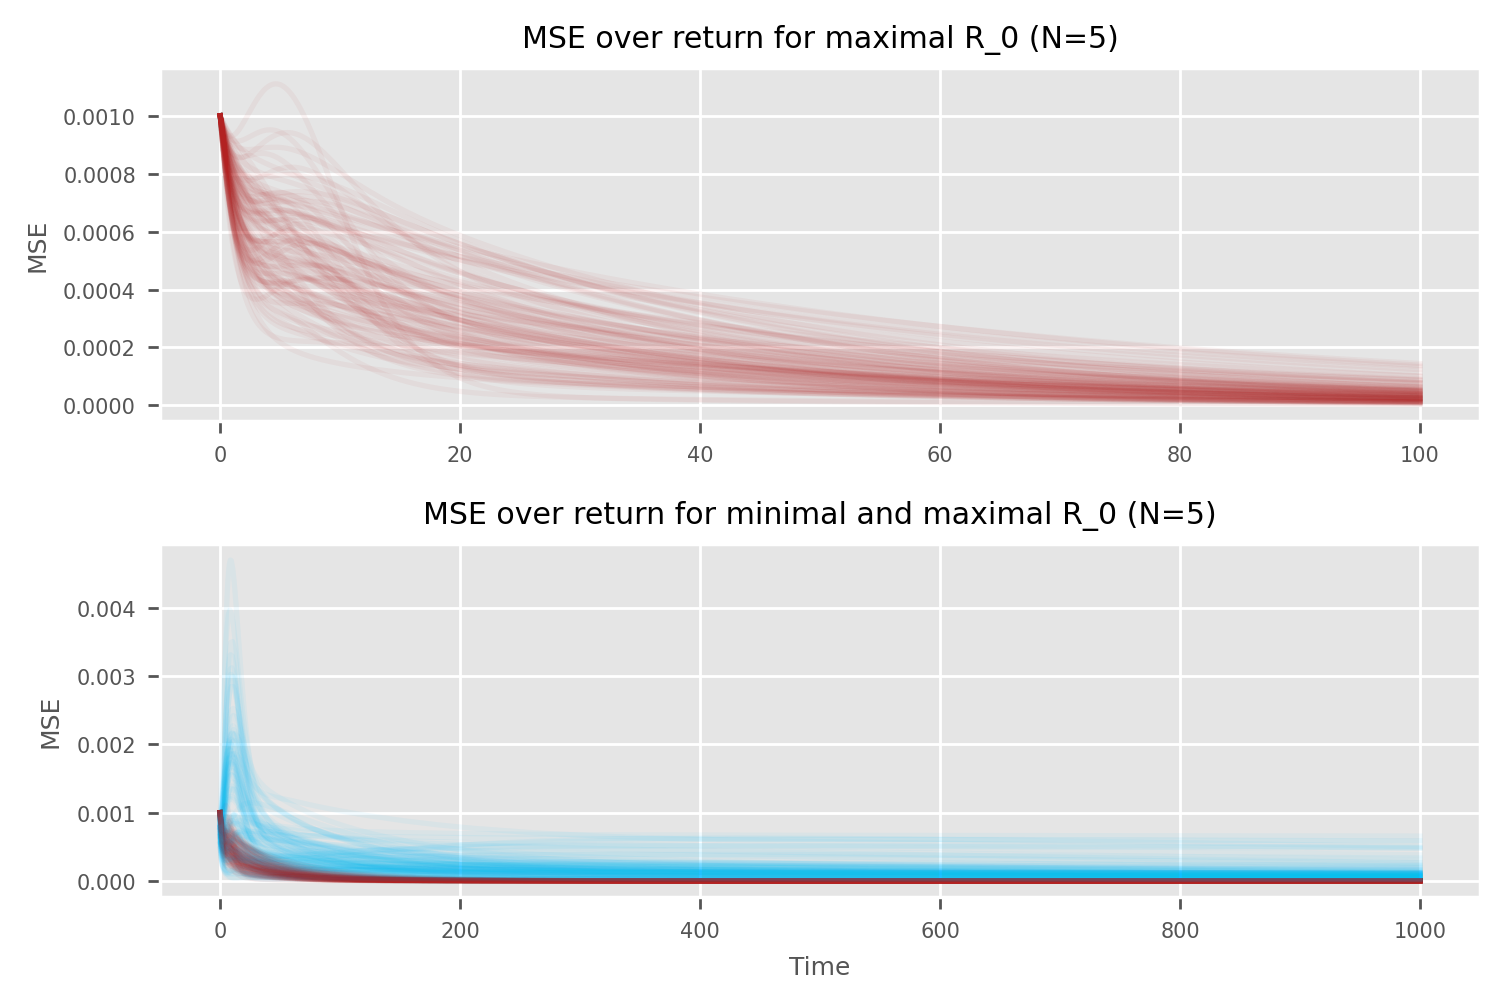

In [634]:
sol5_CL1_minR0, mse5_CL1_minR0, sol5_CL1_maxR0, mse5_CL1_maxR0 = OD_MSE_sim_plot(OD5_CL1_unifD, time=(0,1000), time_fast=(0,100), stab_measure="R_0", num_perts=100)


In [638]:
np.min(OD5_CL1_unifD.R_0)
np.max(OD5_CL1_unifD.R_0)

-0.3869264223608458

-0.045181228762895334

In [639]:
minR0_idx5 = np.argmin(OD5_CL1_unifD.R_0)
maxR0_idx5 = np.argmax(OD5_CL1_unifD.R_0)



In [640]:
OD5_CL1_unifD.D_s[minR0_idx5]
OD5_CL1_unifD.D_s[maxR0_idx5]

array([1.6493067])

array([4.9280084])

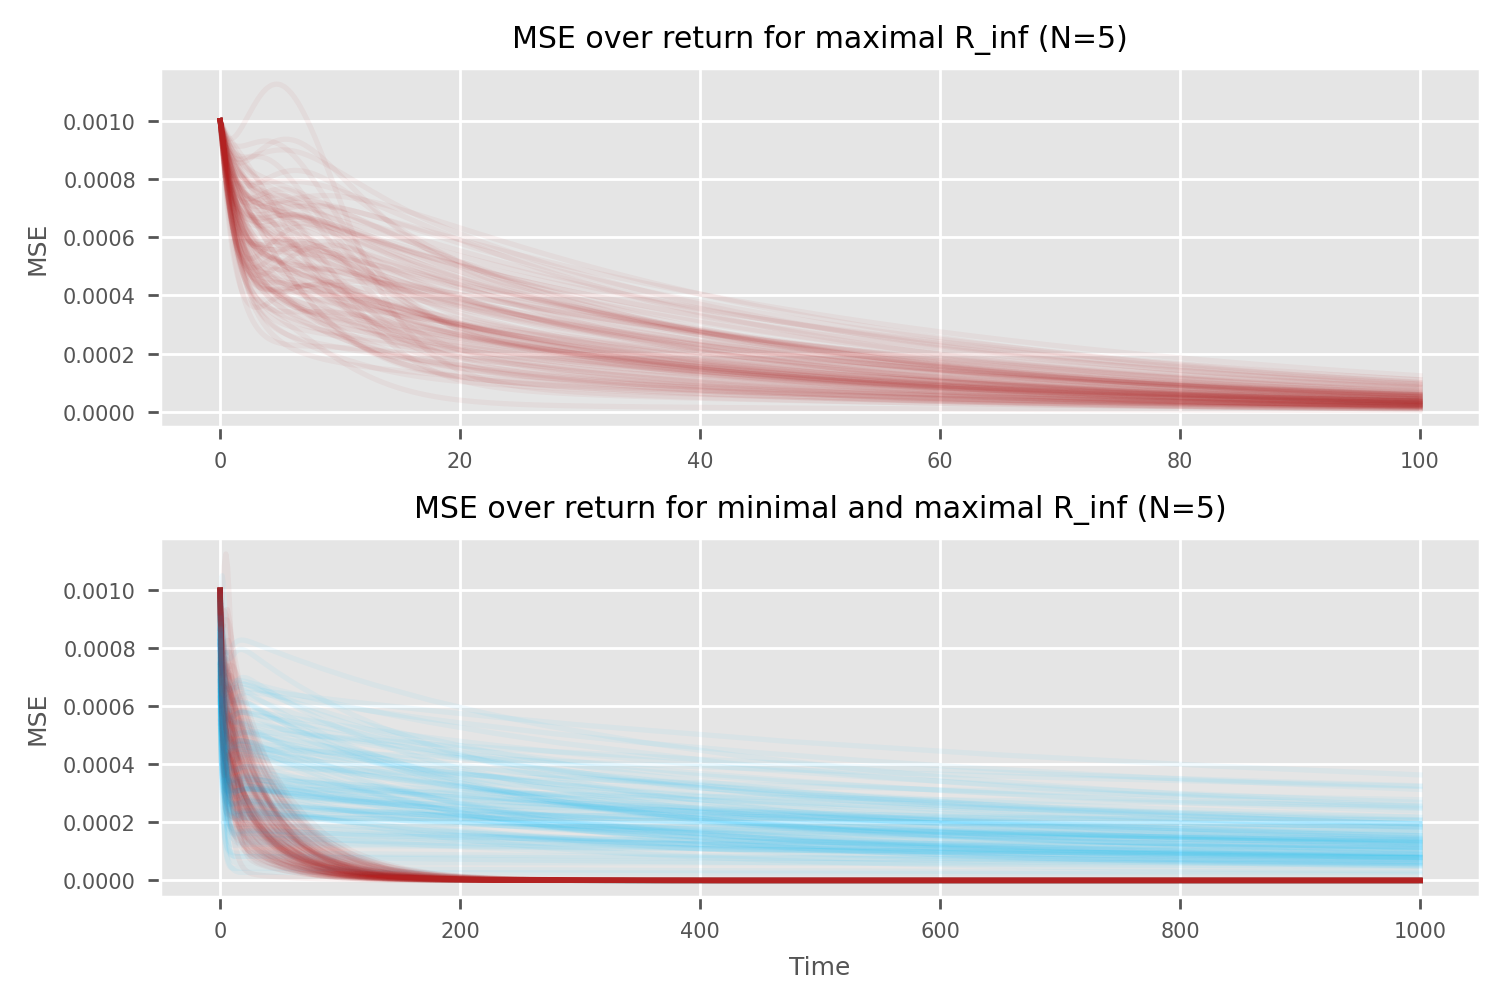

In [582]:
sol5_CL1_minRinf, mse5_CL1_minRinf, sol5_CL1_maxRinf, mse5_CL1_maxRinf = OD_MSE_sim_plot(OD5_CL1_unifD, time=(0,1000), time_fast=(0,100), stab_measure="R_inf", num_perts=100)


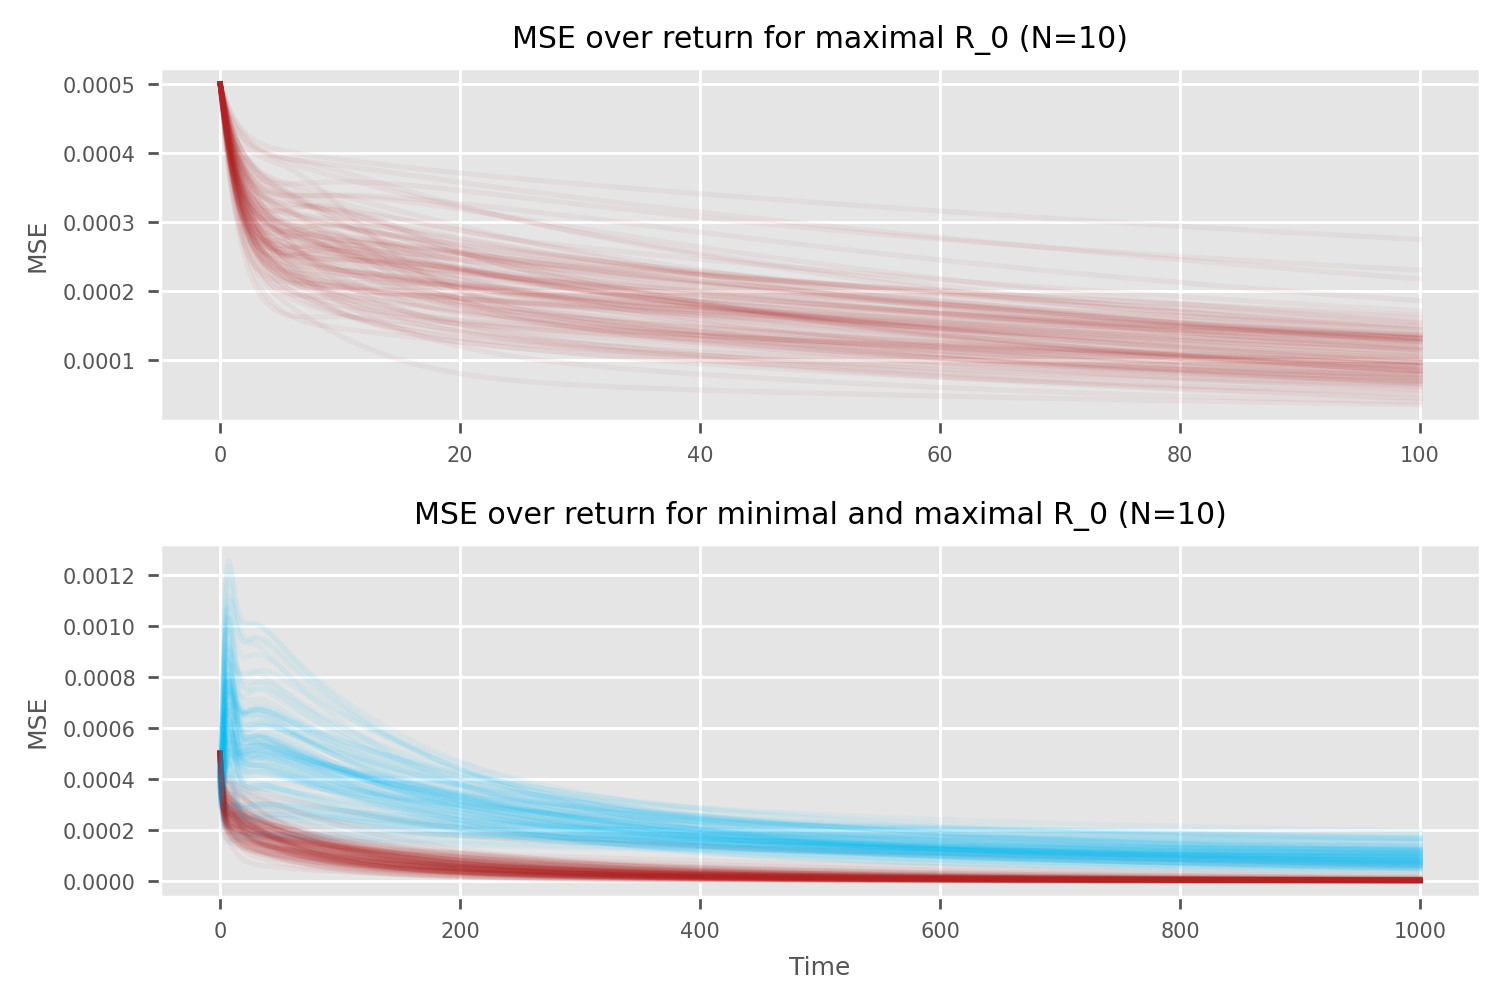

In [643]:
sol10_CL1_minR0, mse10_CL1_minR0, sol10_CL1_maxR0, mse10_CL1_maxR0 = OD_MSE_sim_plot(OD10_CL1_unifD, time=(0,1000), time_fast=(0,100), stab_measure="R_0", num_perts=100, pert_frac=0.1)


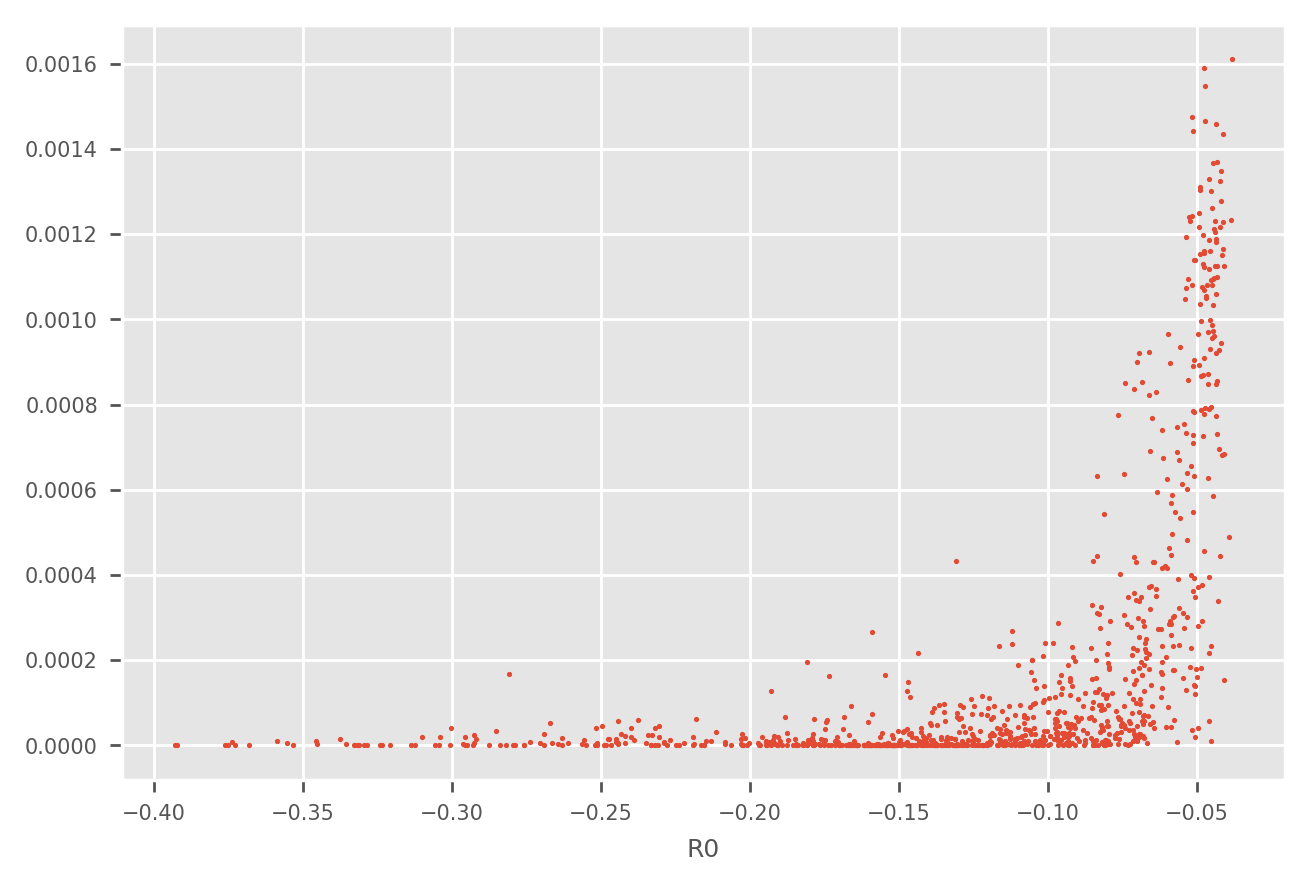

In [651]:
plt.scatter(OD10_CL1_unifD.R_0, OD10_CL1_unifD.R_inf, s=1);
plt.xlabel("R0");
# plt.axline((0,0),(0.1,0.1));

In [ ]:
d

In [652]:
np.argmin(OD10_CL1_unifD.R_0)
np.argmax(OD10_CL1_unifD.R_0)

41

984

In [654]:
OD10_CL1_unifD.R_inf[np.argmin(OD10_CL1_unifD.R_0)]


4.773368659985866e-07

In [653]:
np.argmin(OD10_CL1_unifD.R_inf)
np.argmax(OD10_CL1_unifD.R_inf)

28

984

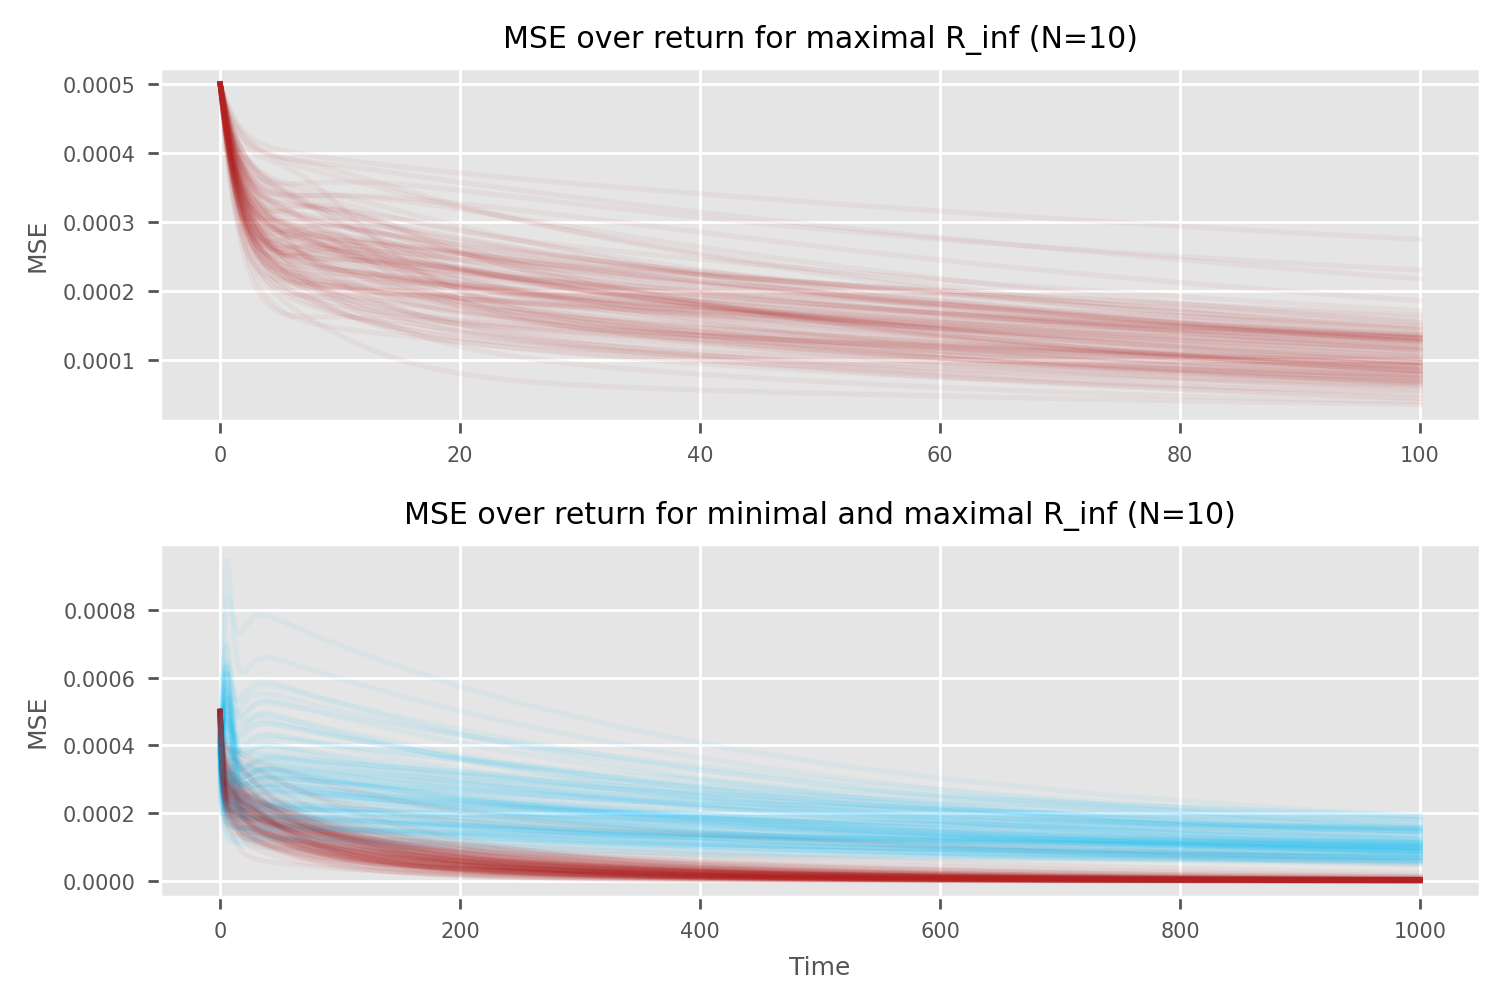

In [644]:
sol10_CL1_minR0, mse10_CL1_minR0, sol10_CL1_maxR0, mse10_CL1_maxR0 = OD_MSE_sim_plot(OD10_CL1_unifD, time=(0,1000), time_fast=(0,100), stab_measure="R_inf", num_perts=100, pert_frac=0.1)


In [550]:
# ts = np.linspace(0.1,10,100)
# ys = np.zeros((3,2,100));
# ys[0,:,:] = np.array([2,3]).reshape(2,1) * np.log(ts)
# ys[1,:,:] = np.array([0.1,0.4]).reshape(2,1) * np.log(ts)
# ys[2,:,:] = np.array([10,7]).reshape(2,1) * np.log(ts)


# # want 3 systems of 2 vars in 1000 time steps

# plt.plot(ts,ys.reshape(100,3,2))

# a = 2
# x = np.linspace(1,10,100)
# b = np.array([1,2,3,4,5,6,7,8,9])

# y = a*np.log(x[:,None])+b
# plt.plot(x, y);

# y.shape

In [532]:

# sol_temp = sol2_CL1_max.sol(np.linspace(0,50,1000))
# eq_temp = np.concatenate([OD2_CL1_unifD.R_star[np.argmax(OD2_CL1_unifD.R_0)], OD2_CL1_unifD.S_star[np.argmax(OD2_CL1_unifD.R_0)]])


# mse_temp = np.mean(np.square(sol_temp - eq_temp), axis=0)

# plt.plot(np.linspace(0,50,1000), mse_temp);

In [ ]:
# def mse_sim_single(Sys, idx, num_perts, tit, time=(0,1000), seed=2):

#     check_eq = np.concatenate([Sys.R_star[idx],Sys.S_star[idx]])
#     np.random.seed(2)
#     plt.figure(figsize=(4,3), dpi=150);
#     for i in range(num_perts):
#         u = np.random.uniform(-1,1,(int(Sys.n*2),1))
#         # u = us[i]
#         check_init = check_eq + 0.1*u/np.linalg.norm(u)
#         check_init=np.abs(check_init.flatten())

#         check_soln = solve_ivp(OD_eqns_alt, t_span=time,  y0=check_init, args=(Sys.C, Sys.eps, Sys.mu[idx], Sys.rho[idx])
#                           , dense_output=True, method='LSODA', vectorized=True)

#         check_mse = np.mean(np.square(check_soln.y - check_eq), axis=0)

#         # check_soln.y.T[-1,:] - check_eq.flatten()

#         # _=plt.plot(check_soln.t, check_soln.y.T);

#         _=plt.plot(check_soln.t[:], check_mse[:], alpha=0.05, color='firebrick');
#     plt.title(tit, fontsize=8);
#     plt.show();
#     return [check_soln, check_mse]

# Generalized Lotka-Volterra

In [ ]:
from scipy.linalg import solve as slv # For calculating equilibrium populations of gLV.

In [ ]:
from Lotka_Volterra_Tools import *

## Making random stable gLV systems

In [ ]:
# A + eps B
# A strictly diag (known eigvals, negative real part)
# B ~ Unif/Norm
# for cyclical dynamics, have multiple eigvals, on those offdiag entries, add conjugates
# lambda2 +- zi

In [ ]:
np.random.seed(667)
A = np.diag(np.random.uniform(-2,0,5))

eigvals(A)

np.random.seed(667)
B = np.random.uniform(-1,1, (100,5,5))
eps = 0.3

Ap = A + eps*B

# eigvals(Ap)

### Ben's Reverse Method

In [ ]:
C = Ap

In [ ]:
_ = uniform_D(n=3, k=9000)

In [ ]:
def reverse_gLV_prams(C_, X_eq, superk=50000):
    # np.random.seed(seed)
    # Seed? B/C random N_0 
    ### NOT ANYMORE
    k_ = C_.shape[0] # Need 3-dim array
    n_ = C_.shape[-1]
    
    # X_eq = np.random.uniform(X_eq_lo, X_eq_hi, (k_,n_,1))
    
    Coef = np.zeros((k_,n_,n_))
    
    DIs = np.diag_indices(n_)[0]
    # print(DIs)
    diag_X_eq = np.zeros((k_,n_,n_))
    diag_X_eq[:,DIs,DIs] = np.squeeze(1/X_eq)
    
    offDiag = dot_across(A=diag_X_eq, x=C_) # 3-dim
    
    Coef = offDiag # How mask indices simply? Like ~idx in pandas?
    Coef[:,DIs,DIs] = 0
    
    prod = np.squeeze(dot_across(Coef, X_eq)) # 2-dim
    alphas = -C_[:,DIs,DIs] - prod # 2-dim
    # alphas_copy = alphas.copy()
    # print(prod.shape)
    Coef[:,DIs,DIs] = -(alphas +  prod) / np.squeeze(X_eq)
    
    # equil check
    alphas = np.expand_dims(alphas, axis=2)
    

    return (alphas, Coef)

In [ ]:
x,y,z = uniform_D(n=5, k=75000)

In [ ]:
reverse = reverse_gLV_prams(C_=np.repeat(C, 10, axis=0), X_eq=x, superk=75000) # Test it out

In [ ]:
a, b = reverse

In [ ]:
np.max(np.abs((a.reshape(1000,5) * x + x * dot_across(b, x).reshape(1000,5))))

In [ ]:
# # Try the check without my possibly borked gLV Jacobian function
# DIs = np.diag_indices(5)[0]
# M1 = np.zeros((100,5,5))
# M1[:,DIs,DIs] = np.squeeze(a)

# M2 = np.zeros((100,5,5))
# M2[:,DIs,DIs] = np.squeeze(dot_across(b,x))

# M3 = np.zeros((100,5,5))
# M3[:,DIs,DIs] = np.squeeze(x)
# M3 = dot_across(M3,b)

# np.max(np.abs(M1 + M2 + M3 - C))

In [ ]:
np.all(eigvals(C).real<0)


## Numerically solving gLV

$$\dot{N_i}=r_i N_i (1-\frac{N_i}{k_i}) + N_i \sum_{j=1, j\neq i}^n \beta_{i,j} N_j $$

In [ ]:
np.random.seed(667)
M1 = np.random.poisson(1, (4,5,5))
M2 = np.random.poisson(2, (4,5,5))

In [ ]:
np.random.seed(667)
xs = np.random.uniform(0,1,(100,5,1)) # test vectors

In [ ]:
# General, linearized dynamic system numerical solver.
def solve_linearized(A, N_0, its=100, h=0.1):
    # Step size, number of iterations, stack of community matrices, initial population(s?)
    k_ = A.shape[0]
    n_ = A.shape[-1]
    
    ys = np.zeros((k_, n_, its)) # (system idx, state var idx, iteration idx)
    # ys[:,:,0] = N_0.reshape(-1) # All same initial condition for ease. Lame and Bad.
    ys[:,:,0] = N_0.reshape(k_,n_) # Different initial conditions
    # t=0 # autonomous system
    for i in range(its-1):
        y_n = np.expand_dims(ys[:,:,i],-1)
        k1 = dot_across(A, y_n)
        k2 = dot_across(A, y_n + h*k1/2)
        k3 = dot_across(A, y_n + h*k2/2)
        k4 = dot_across(A, y_n + h*k3)
        
        ys[:,:,i+1] = np.squeeze(y_n + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*h)

    return ys

In [ ]:
x.shape

In [ ]:
pert.shape

In [ ]:
np.random.seed(667)
pert = np.random.uniform(-1,1,(x.shape[0],x.shape[1], 1))

PERT = np.linalg.norm(pert / np.linalg.norm(pert, axis=1)[:,None,:], axis=1) # Unit perturbation from desired equilibrium; init condition for sim to verify


In [ ]:
# Do the actual gLV equations, then.
def gLV(X_, A_, r_): # only takes interaction matrix, intrinsic growth, and current populations
    k_ = A_.shape[0]
    n_ = A_.shape[-1]
    
    deltaX = np.zeros((k_,n_,1))
    deltaX = X_.reshape(k_,n_,1) * (r_ + dot_across(A_,X_)).reshape(k_,n_,1)
    
    return deltaX

In [ ]:
# gLV(X_=x+PERT, A_=b, r_=a).shape

# full_soln = solve_ivp(fun=gLV, t_span=[0,10], y0=x+PERT, args = (b, a))

In [ ]:
# Use RK4 on stack of systems to get their equilibria.
def solve_gLV(A, r, N_0, its=200, h=0.1):
    # Step size, number of iterations, stack of community matrices, initial population(s?)
    k_ = A.shape[0]
    n_ = A.shape[-1]
    
    ys = np.zeros((k_, n_, its)) # (system idx, state var idx, iteration idx)
    # ys[:,:,0] = N_0.reshape(-1) # All same initial condition for ease. Lame and Bad.
    ys[:,:,0] = N_0.reshape(k_,n_) # Different initial conditions
    for i in range(its-1):
        # y_n = np.expand_dims(ys[:,:,i],-1)
        y_n = ys[:,:,i].reshape(k_,n_,1)
        k1 = gLV(X_=y_n, A_=A, r_=r)
        k2 = gLV(X_=y_n + h*k1/2, A_=A, r_=r)
        k3 = gLV(X_=y_n + h*k2/2, A_=A, r_=r)
        k4 = gLV(X_=y_n + h*k3, A_=A, r_=r)
                
        ys[:,:,i+1] = np.squeeze(y_n + (1./6)*(k1 + 2*k2 + 2*k3 + k4)*h)

    return ys

## gLV system class

In [ ]:
# Now do them all

class gLVsystem:
    '''
    Lotka-Volterra systems + their community matrices and equilibria + Arnoldi Measures.
    -------------------------------------------------------
    Specify:
    k, number of systems
    n, number of species
    M1_bounds, (lower,upper) interval for Unif distribution of desired eigenvalues
    M2_bounds, (lower,upper) interval for Unif distribution of perturbation matrix entries
    
    '''
    def __init__(self, k_=1000, superk=75000, n_=5, eps_=0.3, M1_bounds_=(-2,0), M2_bounds_=(-1,1), N_star_bounds_=(10,20), seed_=667):
        self.k = k_
        self.n = n_
        self.eps = eps_
        self.seed = seed_
        self.M1_bounds = M1_bounds_
        self.M2_bounds = M2_bounds_
        self.N_star_bounds = N_star_bounds_

        nDIs = np.diag_indices(n_)[0]
        kDIs = np.diag_indices(k_)[0]    
        
        np.random.seed(self.seed)
        self.M1 = np.zeros((self.k,self.n,self.n))
        self.M1[:,nDIs,nDIs] = np.random.uniform(self.M1_bounds[0], self.M1_bounds[1], (self.k,self.n))
        self.M2 = np.random.uniform(self.M2_bounds[0], self.M2_bounds[1], (self.k,self.n,self.n))
        self.J = self.M1 + self.eps*self.M2
        
        self.n_star, self.D, self.bins = uniform_D(n=self.n, k=superk, seed_=self.seed)
        # print(self.n_star.shape)
        self.n_star = self.n_star.reshape(self.k, self.n, 1)
        self.N_star = self.n_star * self.N_star_bounds[0]
        
        self.r, self.A = reverse_gLV_prams(C_=self.J, X_eq=self.N_star)
        
        self.stable_idx = np.where(np.all(eigvals(self.J).real<0,axis=-1))[0]
        # Still do all calculations, then just plot using self.stable_idx
        ## Make more efficient later by only calc'ing stability, diversity measures for stable systems
        
        ### Arnoldi Measures ###
        self.R_0 = init_res(self.J)
        self.R_inf = asym_res(self.J)
        self.I_S = np.zeros(self.k)
        for i in range(self.k):
            self.I_S[i] = stoch_invar(self.J[i,:,:])
        self.I_D = np.zeros(self.k)
        for i in range(self.k):
            self.I_D[i] = -1/minimize_scalar(determ_invar_OBJ, bracket = (0,3), args=(self.J[i,:,:]), method='brent').fun

        ### Diversity Measures ###
        # self.n_star = sum_to_one(self.N_star)

        self.simpson = simpson_conc(self.n_star)
        self.shannon = shannon_entropy(self.n_star)
        self.gini_simp = gini_simpson_index(self.n_star)
        self.hcdt_entropy = hcdt_entropy(self.n_star, q=2)
        self.renyi_entropy = renyi_entropy(self.n_star, q=2)
        # self.D = 1/(1-self.gini_simp)
        

In [ ]:
def gLV_stab_div_plot(gLV, div_idx_=list(range(6)), fsize=(7,6), res = 250, fontsize=4, opacity=0.65, q=2, lowess_frac=None, lowess_col='black', s_=3, one_col=None, save_as=None, img_type='pdf'):
    q_renyi=q # Can choose a different q for these Div. measures than what you chose in object initialization.
    q_hcdt=q
    # q_renyi = int(input('q (order of diversity) for Renyi entropy?'))
    # q_hcdt = int(input('q for HCDT entropy?'))
    hcdt = hcdt_entropy(gLV.n_star, q=q_hcdt)
    renyi = renyi_entropy(gLV.n_star, q=q_renyi)

    xlist = np.array([gLV.simpson.flatten(), gLV.shannon.flatten(), gLV.gini_simp.flatten(), hcdt.flatten(), renyi.flatten(), gLV.D], dtype=object)
    # xlist = np.array([gLV.D], dtype=object)

    xlist = list(xlist[div_idx_]) # Can only index with list on a np.array(), not on another list
    xnames = np.array(['Simpson', 'Shannon', 'Gini-Simpson', r'HCDT, q={}'.format(q_hcdt), 'Renyi, q={}'.format(q_renyi), 'D, Numbers Equivalent'])
    xnames = list(xnames[div_idx_])
    ylist = [gLV.R_0, gLV.R_inf, gLV.I_S, gLV.I_D]
    ynames = [r'$\mathcal{R}_0$', r'$\mathcal{R}_{\infty}$', r'$\mathcal{I}_S$', r'$\mathcal{I}_D$']

    plt.figure(figsize=fsize, dpi=res)
    plt.style.use('ggplot')
    mpl.rcParams.update({'font.size': fontsize})
    thetitle = 'Stability against diversity in gLV ($n=${})'.format(gLV.n)
    if (one_col==None):
        if lowess_frac:
            thetitle = thetitle + '\nLOWESS with fraction {}'.format(np.round(lowess_frac,3))
        plt.suptitle(thetitle);

    # colors = np.array(['#FFB000', '#fc8d59', '#91bfdb', '#d73027', '#4575b4', '#000000'])
    colors = np.array(['#FFB000', '#fc8d59', 'deepskyblue', '#d73027', '#4575b4', '#000000'])

    colors = list(colors[div_idx_])

    dimx = len(xlist)
    dimy = len(ylist)

    for i,stab in enumerate(ylist):
        for j,divind in enumerate(xlist):
            # print(divind)
            plt.subplot(dimy,dimx,i*dimx+j+1)
            if (i!=dimy-1):
                plt.tick_params('x', which='both', bottom=False, labelbottom=False);
            if (one_col==None):
                plt.scatter(divind[gLV.stable_idx], stab[gLV.stable_idx], s = s_, alpha=opacity, color = colors[j%dimx]);
            else:
                plt.scatter(divind[gLV.stable_idx], stab[gLV.stable_idx], s = s_, alpha=opacity, color = one_col);
            if lowess_frac:
                w = lowess(stab[gLV.stable_idx].reshape(-1), divind[gLV.stable_idx].reshape(-1), frac=lowess_frac)
                if j != (dimx-1):
                    plt.plot(w[:,0], w[:,1], c='black', linestyle='dashed', linewidth=0.5, alpha=1.00)
                else:
                    plt.plot(w[:,0], w[:,1], c='black', linestyle='dashed', linewidth=0.5, alpha=1.00)
            if j%dimx == 0:
                plt.ylabel(ynames[i]);
            if i == dimy-1:
                plt.xlabel(xnames[j]);

    plt.tight_layout();
    
    if (save_as!=None):
        plt.savefig(save_as+'.{}'.format(img_type), format=img_type)

In [ ]:
D_1(OD2_C0_unifD.S_star)[:5]

In [ ]:
# Run to load from local.
with open(r'.\gLV_Systems/gLV2_unifD.gLVsystem', 'rb') as gLV_obj:
    gLV2_unifD = pickle.load(gLV_obj)
with open(r'.\gLV_Systems/gLV3_unifD.gLVsystem', 'rb') as gLV_obj:
    gLV3_unifD = pickle.load(gLV_obj)
with open(r'.\gLV_Systems/gLV5_unifD.gLVsystem', 'rb') as gLV_obj:
    gLV5_unifD = pickle.load(gLV_obj)
# with open(r'./gLV10.gLVsystem', 'rb') as gLV_obj:
#     gLV10 = pickle.load(gLV_obj)
# with open(r'./gLV15.gLVsystem', 'rb') as gLV_obj:
#     gLV15 = pickle.load(gLV_obj)
# with open(r'./gLV20.gLVsystem', 'rb') as gLV_obj:
#     gLV20 = pickle.load(gLV_obj)
    
# r'E:\Progrumping\Microbiome\OD20.ODsystem'

In [ ]:
gLV2_unifD = gLVsystem(n_=2, eps_=0.2)

In [ ]:
gLV3_unifD = gLVsystem(n_=3, eps_=0.2)

In [ ]:
gLV5_unifD = gLVsystem(n_=5, superk=100000, eps_=0.2)

In [ ]:
gLV5_unifD.D.shape

In [ ]:
np.mean(gLV5_unifD.R_0)

In [ ]:
gLV_stab_div_plot(gLV5_unifD, fsize=(4,4), div_idx_=[-1], one_col = 'deepskyblue', 
                 s_=3, fontsize=6, lowess_frac=2./3)


In [ ]:
gLV10_unifD = gLVsystem(n_=10,superk=20000000, eps_=0.2, seed_=1)

In [ ]:
# gLV15_unifD = gLVsystem(n_=15, eps_=0.2)

In [ ]:
# plt.hist(gLV2.D, bins=gLV2.bins);

In [ ]:
np.mean(np.abs(gLV2_unifD.I_S - gLV2_unifD.I_D))

In [ ]:
np.mean(np.abs(gLV2_unifD.I_S - gLV2_unifD.I_D))

In [ ]:
plt.scatter(gLV2_unifD.D, y=gLV2_unifD.I_S, s=1);

In [ ]:
# # Run to save objects locally once calculated
# with open(r'.\gLV_Systems\gLV2_unifD.gLVsystem', 'wb') as gLV2_obj: # (w)rite in (b)inary mode
#     pickle.dump(gLV2_unifD, gLV2_obj)
# with open(r'.\gLV_Systems\gLV3_unifD.gLVsystem', 'wb') as gLV3_obj: # (w)rite in (b)inary mode
#     pickle.dump(gLV3_unifD, gLV3_obj)
# with open(r'.\gLV_Systems\gLV5_unifD.gLVsystem', 'wb') as gLV5_obj: # (w)rite in (b)inary mode
#     pickle.dump(gLV5_unifD, gLV5_obj)
# # with open(r'\gLV10.gLVsystem', 'wb') as gLV10_obj: # (w)rite in (b)inary mode
# #     pickle.dump(gLV10, gLV10_obj)
# # with open(r'\gLV15.gLVsystem', 'wb') as gLV15_obj: # (w)rite in (b)inary mode
# #     pickle.dump(gLV15, gLV15_obj)
# # with open(r'\gLV20.gLVsystem', 'wb') as gLV20_obj: # (w)rite in (b)inary mode
# #     pickle.dump(gLV20, gLV20_obj)

### OLD

In [ ]:
# # Pick one epsilon for all systems, then just overgenerate as needed to get 1000 stable systems
# gLV3 = gLVsystem(n_=3, eps_=0.2)
# gLV5 = gLVsystem(n_=5, eps_=0.2)
# gLV10 = gLVsystem(n_=10, eps_=0.2)
# gLV15 = gLVsystem(n_=15, eps_=0.2)
# gLV20 = gLVsystem(n_=20, eps_=0.2)

In [ ]:
# Run to load from local.
with open(r'./gLV2.gLVsystem', 'rb') as gLV_obj:
    gLV2 = pickle.load(gLV_obj)
with open(r'./gLV3.gLVsystem', 'rb') as gLV_obj:
    gLV3 = pickle.load(gLV_obj)
with open(r'./gLV5.gLVsystem', 'rb') as gLV_obj:
    gLV5 = pickle.load(gLV_obj)
with open(r'./gLV10.gLVsystem', 'rb') as gLV_obj:
    gLV10 = pickle.load(gLV_obj)
with open(r'./gLV15.gLVsystem', 'rb') as gLV_obj:
    gLV15 = pickle.load(gLV_obj)
with open(r'./gLV20.gLVsystem', 'rb') as gLV_obj:
    gLV20 = pickle.load(gLV_obj)
    
# r'E:\Progrumping\Microbiome\OD20.ODsystem'

In [ ]:
# gLV_percents_stable = np.array([np.all(eigvals(gLV2.J).real<0, axis=-1).sum() / 1000, 
#                                 np.all(eigvals(gLV3.J).real<0, axis=-1).sum() / 1000,
#                                 np.all(eigvals(gLV5.J).real<0, axis=-1).sum() / 1000,
#                                 np.all(eigvals(gLV10.J).real<0, axis=-1).sum() / 1000,
#                                 np.all(eigvals(gLV15.J).real<0, axis=-1).sum() / 1000,
#                                 np.all(eigvals(gLV20.J).real<0, axis=-1).sum() / 1000])

In [ ]:
# # Run to save objects locally once calculated
# with open(r'\gLV_percents_stable.list', 'wb') as gLV_list_file: # (w)rite in (b)inary mode
#     pickle.dump(gLV_percents_stable, gLV_list_file)

In [ ]:
# Run to load from local.
# This was just from preliminary calculations (1000, no overgeneration yet)
with open(r'./gLV_percents_stable.list', 'rb') as gLV_list_file:
    gLV_percents_stable = pickle.load(gLV_list_file)

In [ ]:
gLV_percents_stable # For N=2,3,5,10,15,20

In [ ]:
# plt.figure(figsize=(4,3), dpi=200);
# plt.scatter(y=gLV_percents_stable,x=[2,3,5,10,15,20]);
# plt.xlabel('Number of species, n');
# plt.ylabel('Fraction of stable systems (1000 total)');

In [ ]:
# Re-do but with overgeneration from first trial

samp_mult = np.round((1/gLV_percents_stable) * 1000)
samp_mult = samp_mult.astype(int)

In [ ]:
# # Generate systems in excess of 1000 to get approximately 1000 STABLE systems

# gLV2 = gLVsystem(k_=samp_mult[0], n_=2, eps_=0.2)
# gLV3 = gLVsystem(k_=samp_mult[1], n_=3, eps_=0.2)
# gLV5 = gLVsystem(k_=samp_mult[2], n_=5, eps_=0.2)
# gLV10 = gLVsystem(k_=samp_mult[3], n_=10, eps_=0.2)
# gLV15 = gLVsystem(k_=samp_mult[4], n_=15, eps_=0.2)
# gLV20 = gLVsystem(k_=samp_mult[5], n_=20, eps_=0.2)

In [ ]:
# # Run to save objects locally once calculated
# with open(r'C:\Users\riley\Microbiome\Microbiome_Stability_Diversity\gLV2.gLVsystem', 'wb') as gLV2_obj: # (w)rite in (b)inary mode
#     pickle.dump(gLV2, gLV2_obj)
# with open(r'C:\Users\riley\Microbiome\Microbiome_Stability_Diversity\gLV3.gLVsystem', 'wb') as gLV3_obj: # (w)rite in (b)inary mode
#     pickle.dump(gLV3, gLV3_obj)
# with open(r'C:\Users\riley\Microbiome\Microbiome_Stability_Diversity\gLV5.gLVsystem', 'wb') as gLV5_obj: # (w)rite in (b)inary mode
#     pickle.dump(gLV5, gLV5_obj)
# with open(r'C:\Users\riley\Microbiome\Microbiome_Stability_Diversity\gLV10.gLVsystem', 'wb') as gLV10_obj: # (w)rite in (b)inary mode
#     pickle.dump(gLV10, gLV10_obj)
# with open(r'C:\Users\riley\Microbiome\Microbiome_Stability_Diversity\gLV15.gLVsystem', 'wb') as gLV15_obj: # (w)rite in (b)inary mode
#     pickle.dump(gLV15, gLV15_obj)
# with open(r'C:\Users\riley\Microbiome\Microbiome_Stability_Diversity\gLV20.gLVsystem', 'wb') as gLV20_obj: # (w)rite in (b)inary mode
#     pickle.dump(gLV20, gLV20_obj)

In [ ]:
### Example Solution of GLV system

# perturbation = np.random.uniform(-1,1, (968,20,1))
# perturbation = sum_to_one(perturbation)

# perturbation[:2,:,:].shape

# gLV20.N_star[gLV20.stable_idx,:,:].shape

# print(gLV20.A.shape)
# print(gLV20.r.shape)

# soln_20 = solve_gLV(A=gLV20.A[gLV20.stable_idx[0:2],:,:], r=gLV20.r[gLV20.stable_idx[:2],:,:], N_0=3*perturbation[:2,:,:] + gLV20.N_star[gLV20.stable_idx[:2],:,:], its=50)

# ts = np.linspace(0,5,num=50)

# plt.figure(dpi=200);
# for i in range(20):
#     _ = plt.plot(ts, soln_20[0,i,:]);

In [ ]:
# gLV20.R_0[0]

# plt.figure(dpi=200);
# for i in range(20):
#     _ = plt.plot(ts, soln_20[1,i,:]);

# gLV20.R_0[gLV20.stable_idx[1]]

In [ ]:
np.mean(gLV3.R_inf - gLV3.I_S)

In [ ]:
np.mean(gLV3.R_inf - gLV3.I_D)

In [ ]:
np.mean(gLV3.R_0 - gLV3.R_inf)

In [ ]:
np.max(gLV3.R_0) - np.min(gLV3.R_0)

### GLV Stability vs. Diversity Plots

##### Back to plots

\begin{align}
y &= \frac{a}{x+b} + c \\
\log(y-c) &= \log(a) - \log(x+b) \\
\end{align}

In [ ]:
# # gLV_stab_div_plot(gLV2, fsize=(7,7), res=300, div_idx_=[-1], lowess_frac=2./3, one_col='deepskyblue', s_=2, fontsize=8)
# gLV_stab_div_plot(gLV2, fsize=(4,4), div_idx_=[-1], s_=3, fontsize=6, one_col='deepskyblue', lowess_frac = 2./3, save_as='./graphics/gLV2_stabdiv', img_type='pdf')
# # OD_stab_div_plot(OD20_CL1_noP, fsize=(7,4), div_idx_=[5], title="Near-specialist", one_col = None , s_=3, fontsize=6, save_as='./graphics/gLVstabdiv', img_type='pdf')

In [ ]:
# gLV3.stab_div_plot(lowess_frac=2./3)

# gLV_stab_div_plot(gLV3, div_idx_=[2,-1], fontsize=8, lowess_frac=2./3)
# gLV_stab_div_plot(gLV3, fsize=(7,7), res=600, div_idx_=[-1], lowess_frac=2./3, one_col='deepskyblue', s_=2, fontsize=10)
gLV_stab_div_plot(gLV3, fsize=(4,4), div_idx_=[-1], s_=3, fontsize=8, one_col='deepskyblue', lowess_frac=2./3, save_as='./graphics/gLV3_stabdiv', img_type='pdf')

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

In [ ]:
gLV_stab_div_plot(gLV5, fsize=(4,4), div_idx_=[-1], s_=3, fontsize=8, one_col='deepskyblue', lowess_frac=2./3, img_type='pdf')


## Counterexample to Random systems

In [ ]:
np.random.seed(667)
random_Dens3 = np.random.uniform(10,20,(1000,3,1))

In [ ]:
random_Ds3 = D_1(sum_to_one(random_Dens3))

In [ ]:
random_Ds3.shape

In [ ]:
# Use a more fair distribution of D values
plt.figure(figsize=(4,3), dpi=600);
plt.scatter(x=gLV3_unifD.D[gLV3_unifD.stable_idx[:1000]], y=gLV3_unifD.R_0[gLV3_unifD.stable_idx[:1000]], s=1, label=r'Approx. uniform $D$', color='green');
plt.scatter(x=random_Ds3[:928], y=gLV3.R_0[gLV3_unifD.stable_idx[:1000]], s=1, label=r'$D$ from random unif densities', color='purple');
plt.ylabel(r'$\mathcal{R}_0$');
plt.xlabel(r'$D$');
# plt.title('Counterexample for stability-diversity \nrelation in random systems', fontsize=8);
lgnd = plt.legend(loc=2, fontsize=6);
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
plt.savefig(r'.\\graphics\\counterex_random.pdf', format='pdf');


## Arnoldi plots for gLV

In [ ]:
mpl.rcParams['figure.dpi'] = 250
plt.style.use('ggplot')
mpl.rcParams.update({'font.size': 4})

plt.subplot(3,3,1)
plt.scatter(x=gLV5.I_S[gLV5.stable_idx],y=gLV5.R_0[gLV5.stable_idx], s = 1,alpha = 0.5);
# plt.xticks(fontsize=3);
plt.xlabel(r'$\mathcal{I}_S$');
plt.ylabel(r'$\mathcal{R}_0$');
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.subplot(3,3,2)
plt.scatter(x=gLV5.I_D[gLV5.stable_idx],y=gLV5.R_0[gLV5.stable_idx], s=1, alpha = 0.5);
# plt.xlabel(r'$\mathcal{I}_D$');
# plt.ylabel(r'$\mathcal{R}_0$');
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.subplot(3,3,3)
plt.scatter(x=gLV5.R_inf[gLV5.stable_idx],y=gLV5.R_0[gLV5.stable_idx], s=1, alpha = 0.5);
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.subplot(3,3,5)
plt.scatter(x=gLV5.I_D[gLV5.stable_idx],y=gLV5.I_S[gLV5.stable_idx], s=1, alpha = 0.5);
plt.xlabel(r'$\mathcal{I}_D$');
plt.ylabel(r'$\mathcal{I}_S$');
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.subplot(3,3,6)
plt.scatter(x=gLV5.R_inf[gLV5.stable_idx],y=gLV5.I_S[gLV5.stable_idx], s=1, alpha = 0.5);
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.subplot(3,3,9)
plt.scatter(x=gLV5.R_inf[gLV5.stable_idx],y=gLV5.I_D[gLV5.stable_idx], s=1, alpha = 0.5);
plt.xlabel(r'$\mathcal{R}_{\infty}$');
plt.ylabel(r'$\mathcal{I}_D$');
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.suptitle('Arnoldi Measures for gLV Community Matrices (n=5)');

plt.tight_layout();

In [ ]:
mpl.rcParams['figure.dpi'] = 250
plt.style.use('ggplot')
mpl.rcParams.update({'font.size': 4})

plt.subplot(3,3,1)
plt.scatter(x=gLV10.I_S[gLV10.stable_idx],y=gLV10.R_0[gLV10.stable_idx], s = 1,alpha = 0.5);
# plt.xticks(fontsize=3);
plt.xlabel(r'$\mathcal{I}_S$');
plt.ylabel(r'$\mathcal{R}_0$');
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.subplot(3,3,2)
plt.scatter(x=gLV10.I_D[gLV10.stable_idx],y=gLV10.R_0[gLV10.stable_idx], s=1, alpha = 0.5);
# plt.xlabel(r'$\mathcal{I}_D$');
# plt.ylabel(r'$\mathcal{R}_0$');
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.subplot(3,3,3)
plt.scatter(x=gLV10.R_inf[gLV10.stable_idx],y=gLV10.R_0[gLV10.stable_idx], s=1, alpha = 0.5);
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.subplot(3,3,5)
plt.scatter(x=gLV10.I_D[gLV10.stable_idx],y=gLV10.I_S[gLV10.stable_idx], s=1, alpha = 0.5);
plt.xlabel(r'$\mathcal{I}_D$');
plt.ylabel(r'$\mathcal{I}_S$');
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.subplot(3,3,6)
plt.scatter(x=gLV10.R_inf[gLV10.stable_idx],y=gLV10.I_S[gLV10.stable_idx], s=1, alpha = 0.5);
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.subplot(3,3,9)
plt.scatter(x=gLV10.R_inf[gLV10.stable_idx],y=gLV10.I_D[gLV10.stable_idx], s=1, alpha = 0.5);
plt.xlabel(r'$\mathcal{R}_{\infty}$');
plt.ylabel(r'$\mathcal{I}_D$');
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.suptitle('Arnoldi Measures for gLV Community Matrices (n=10)');

plt.tight_layout();

In [ ]:
mpl.rcParams['figure.dpi'] = 250
plt.style.use('ggplot')
mpl.rcParams.update({'font.size': 4})


plt.subplot(3,3,1)
plt.scatter(x=gLV20.I_S[gLV20.stable_idx],y=gLV20.R_0[gLV20.stable_idx], s = 1,alpha = 0.5);
# plt.xticks(fontsize=3);
plt.xlabel(r'$\mathcal{I}_S$');
plt.ylabel(r'$\mathcal{R}_0$');
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.subplot(3,3,2)
plt.scatter(x=gLV20.I_D[gLV20.stable_idx],y=gLV20.R_0[gLV20.stable_idx], s=1, alpha = 0.5);
# plt.xlabel(r'$\mathcal{I}_D$');
# plt.ylabel(r'$\mathcal{R}_0$');
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.subplot(3,3,3)
plt.scatter(x=gLV20.R_inf[gLV20.stable_idx],y=gLV20.R_0[gLV20.stable_idx], s=1, alpha = 0.5);
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.subplot(3,3,5)
plt.scatter(x=gLV20.I_D[gLV20.stable_idx],y=gLV20.I_S[gLV20.stable_idx], s=1, alpha = 0.5);
plt.xlabel(r'$\mathcal{I}_D$');
plt.ylabel(r'$\mathcal{I}_S$');
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.subplot(3,3,6)
plt.scatter(x=gLV20.R_inf[gLV20.stable_idx],y=gLV20.I_S[gLV20.stable_idx], s=1, alpha = 0.5);
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.subplot(3,3,9)
plt.scatter(x=gLV20.R_inf[gLV20.stable_idx],y=gLV20.I_D[gLV20.stable_idx], s=1, alpha = 0.5);
plt.xlabel(r'$\mathcal{R}_{\infty}$');
plt.ylabel(r'$\mathcal{I}_D$');
plt.axline(xy1= (0,0),slope=1, color='k', linestyle='--');

plt.suptitle('Arnoldi Measures for gLV Community Matrices (n=20)');

plt.tight_layout();

## $R^2$ tables of stability-diversity relationship models

In [ ]:
from sklearn.linear_model import LinearRegression

import pandas as pd

### O'Dwyer $R^2$ Table


In [ ]:
def od_R2_table(sys_list, sys_names, stab_start_idx=0, log_y = False, rational = False):
    # Must enter systems by ascending C overall, then within C by ascending N
    
    stabs = ['R_0', 'R_inf', 'I_S', 'I_D'][stab_start_idx:]
    stab_names = [r'$\mathcal{R}_0$',r'$\mathcal{R}_{\infty}$', '$\mathcal{I}_S$', '$\mathcal{I}_D$'][stab_start_idx:]
    ns = [None] * len(sys_list)
    for i, sys in enumerate(sys_list):
        # print(type(sys.n))
        ns[i] = sys.n
    ns = list(np.sort(list(set(ns))))
    # Assume Sorted by C type, then by N???
    num_ns = len(ns)
    # ns = ['2','3','5','10','15','20']
    row_idx = [ns,stab_names]
    num_sys = len(sys_names)
    num_Cs = int(len(sys_list) / len(ns))
    if (num_Cs != len(sys_names)):
        print('C size, number of systems mismatch.')
    
    divs = ['D']
    # Cs = ['CL1', 'CL2', 'CR1', 'CR2']
    col_idx = [divs, sys_names]

    row_midx = pd.MultiIndex.from_product(row_idx)
    col_midx = pd.MultiIndex.from_product(col_idx)

    row_midx.set_names(['N','Stability Measure'], inplace=True)
    col_midx.set_names(['Diversity Measure:','System Type:'], inplace=True)
    
    stabdivR2_OD = pd.DataFrame(index=row_midx, columns=col_midx)
    
    row_jmp = len(stabs)
    
    for i, od in enumerate(sys_list):
        for k, stab in enumerate(stabs): # Stability Indices
            if(rational):
                temp_popt, temp_pcov = curve_fit(f = lambda t, a, b, c: a/(t+b) + c, xdata=sys_list[i].D_s.reshape(-1), ydata = getattr(sys_list[i], stab).flatten(), p0=(-0.1, -2.3, -0.0075))
                SSR = np.sum(np.square( getattr(sys_list[i], stab) - (temp_popt[0]/(OD2_C0_unifD.D_S.flatten() + temp_popt[1]) + temp_popt[2]) ) )
                SST = np.sum(np.square( getattr(sys_list[i], stab) - np.mean(OD2_C0_unifD.R_inf.flatten()) ) )
                PR2 = 1 - (SSR/SST)
                stabdivR2_OD.iloc[(row_jmp*i)%(num_ns*row_jmp)+k, i//num_ns] = PR2

            if (log_y):
                # prams, _ = curve_fit(lambda t, a, b: a*np.exp(b)*np.exp(t)+a*np.exp(b), sys_list[i].D_s.reshape(-1,1), np.log(getattr(sys_list[i], stab)) )
                temp = LinearRegression().fit(X=sys_list[i].D_s.reshape(-1,1), y = np.log(getattr(sys_list[i], stab) + 0.01 + np.min(getattr(sys_list[i], stab)) ))
                stabdivR2_OD.iloc[(row_jmp*i)%(num_ns*row_jmp)+k, i//num_ns] = temp.score(X=sys_list[i].D_s.reshape(-1,1), y = np.log(getattr(sys_list[i], stab)+ 0.01 + np.min(getattr(sys_list[i], stab))))
            else:
                temp = LinearRegression().fit(X=sys_list[i].D_s.reshape(-1,1), y = getattr(sys_list[i], stab))
                stabdivR2_OD.iloc[(row_jmp*i)%(num_ns*row_jmp)+k, i//num_ns] = temp.score(X=sys_list[i].D_s.reshape(-1,1), y = getattr(sys_list[i], stab))
    
    return stabdivR2_OD.astype(float)


In [ ]:
# ODs_C0_unifD = [OD3_C0_unifD,OD5_C0_unifD,OD10_C0_unifD,OD15_C0_unifD]
ODs_unifD = [OD2_C0_unifD, OD3_C0_unifD, OD5_C0_unifD, OD10_C0_unifD, OD15_C0_unifD,
            OD2_CL1_unifD, OD3_CL1_unifD,OD5_CL1_unifD,OD10_CL1_unifD,OD15_CL1_unifD,
            OD2_CL2_unifD, OD3_CL2_unifD,OD5_CL2_unifD,OD10_CL2_unifD,OD15_CL2_unifD,
            OD2_CR1_unifD, OD3_CR1_unifD,OD5_CR1_unifD,OD10_CR1_unifD,OD15_CR1_unifD,
            OD2_CR2_unifD, OD3_CR2_unifD,OD5_CR2_unifD,OD10_CR2_unifD,OD15_CR2_unifD]

In [ ]:
ODs_unifD_log = [OD2_C0_unifD, OD3_C0_unifD, OD5_C0_unifD, OD10_C0_unifD,
            OD2_CL1_unifD, OD3_CL1_unifD,OD5_CL1_unifD,OD10_CL1_unifD,
            OD2_CL2_unifD, OD3_CL2_unifD,OD5_CL2_unifD,OD10_CL2_unifD,
            OD2_CR1_unifD, OD3_CR1_unifD,OD5_CR1_unifD,OD10_CR1_unifD,
            OD2_CR2_unifD, OD3_CR2_unifD,OD5_CR2_unifD,OD10_CR2_unifD]

In [ ]:
stabdivR2_OD_unifD = od_R2_table(ODs_unifD, ['OD_C0_unifD','OD_CL1_unifD','OD_CL2_unifD','OD_CR1_unifD','OD_CR2_unifD'])


In [ ]:
stabdivR2_OD_unifD_log = od_R2_table(ODs_unifD_log, ['OD_C0_unifD','OD_CL1_unifD','OD_CL2_unifD','OD_CR1_unifD','OD_CR2_unifD'], stab_start_idx=1, log_y=True)


In [ ]:
stabdivR2_OD_unifD_ratl = od_R2_table(ODs_unifD, ['OD_C0_unifD','OD_CL1_unifD','OD_CL2_unifD','OD_CR1_unifD','OD_CR2_unifD'], rational=True)


In [ ]:
out_table_linear = stabdivR2_OD_unifD.style.background_gradient(cmap='RdPu', axis=None).format(precision=3)

In [ ]:
out_table_log = stabdivR2_OD_unifD_log.style.background_gradient(cmap='RdPu', axis=None).format(precision=3)

In [ ]:
out_table_ratl = stabdivR2_OD_unifD_ratl.style.background_gradient(cmap='RdPu', axis=None).format(precision=3)

In [ ]:
# out_table_ratl

In [ ]:
# Plot one of these high-R^2 examples
temp = LinearRegression().fit(X=OD2_C0_unifD.D_s.reshape(-1,1), y = np.log(OD2_C0_unifD.R_inf + 0.01 + np.min(OD2_C0_unifD.R_inf) ) )
temp_score = temp.score(X=OD2_C0_unifD.D_s.reshape(-1,1), y = np.log(OD2_C0_unifD.R_inf+ 0.01 + np.min(OD2_C0_unifD.R_inf) ))


In [ ]:
temp_score

In [ ]:
plt.figure(figsize=(3,2), dpi=150);
plt.scatter(OD2_C0_unifD.D_s.reshape(-1,1), OD2_C0_unifD.R_inf, s=2, alpha=0.5);
plt.plot(OD2_C0_unifD.D_s.reshape(-1,1), np.exp(temp.predict(OD2_C0_unifD.D_s.reshape(-1,1))), color='black');

In [ ]:
# print(out_table_linear.to_latex(convert_css=True))

In [ ]:
# print(out_table_log.to_latex(convert_css=True))

In [ ]:
# print(out_table_ratl.to_latex(convert_css=True))

# OLD

## O'Dwyer, Non-uniform D

#### C0: Identity C

In [ ]:
# np.random.seed(667)
# OD2_noP = ODsystem_noP(n_=2)
# OD3_noP = ODsystem_noP(n_=3)
# OD5_noP = ODsystem_noP(n_=5)
# OD10_noP = ODsystem_noP(n_=10)
# OD15_noP = ODsystem_noP(n_=15)
# OD20_noP = ODsystem_noP(n_=20)

In [ ]:
# with open(r'./OD_Systems_Various_C/OD2_noP.ODsystem', 'wb') as OD_obj_file:
#     pickle.dump(OD2_noP, OD_obj_file)
# with open(r'./OD_Systems_Various_C/OD3_noP.ODsystem', 'wb') as OD_obj_file:
#     pickle.dump(OD3_noP, OD_obj_file)
# with open(r'./OD_Systems_Various_C/OD5_noP.ODsystem', 'wb') as OD_obj_file:
#     pickle.dump(OD5_noP, OD_obj_file)
# with open(r'./OD_Systems_Various_C/OD10_noP.ODsystem', 'wb') as OD_obj_file:
#     pickle.dump(OD10_noP, OD_obj_file)
# with open(r'./OD_Systems_Various_C/OD15_noP.ODsystem', 'wb') as OD_obj_file:
#     pickle.dump(OD15_noP, OD_obj_file)
# with open(r'./OD_Systems_Various_C/OD20_noP.ODsystem', 'wb') as OD_obj_file:
#     pickle.dump(OD20_noP, OD_obj_file)

In [ ]:
with open(r'./OD_Systems_Various_C/OD2_noP.ODsystem', 'rb') as OD_obj_file:
    OD2_noP = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD3_noP.ODsystem', 'rb') as OD_obj_file:
    OD3_noP = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD5_noP.ODsystem', 'rb') as OD_obj_file:
    OD5_noP = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD10_noP.ODsystem', 'rb') as OD_obj_file:
    OD10_noP = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD15_noP.ODsystem', 'rb') as OD_obj_file:
    OD15_noP = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD20_noP.ODsystem', 'rb') as OD_obj_file:
    OD20_noP = pickle.load(OD_obj_file)

In [ ]:
fine_ids = np.zeros(int(1000))
oms = np.linspace(0,1,1000)
for i, om in enumerate(oms):
    fine_ids[i] = determ_invar_OBJ(om, fine1)

In [ ]:
plt.figure(figsize=(2,2), dpi=250);
plt.plot(oms,-fine_ids);

In [ ]:
# num_idx = np.where(prob_idx==True)[0]

In [ ]:
# temp = OD5_noP.J + np.transpose(OD5_noP.J, (0,2,1))

# np.all(temp == np.transpose(temp, (0,2,1)))

In [ ]:
# OD_stab_div_plot(OD2_noP, fsize=(4,4), div_idx_=[5], title="C0", one_col = 'tomato' , s_=3, fontsize=6, lowess_frac=2./3)


In [ ]:
stab_stab_plot(OD2_noP, 'firebrick', 'O\'Dwyer', 2, 'I', ', no P, fixed')

In [ ]:
stab_stab_plot(OD3_noP, 'firebrick', 'O\'Dwyer', 3, 'I', ', no P, fixed')

In [ ]:
stab_stab_plot(OD5_noP, 'firebrick', 'O\'Dwyer', 5, 'I', ', no P, fixed')

#### CL1: Near-specialist

In [ ]:
# np.random.seed(667)
# OD2_CL1_noP = ODsystem_noP(n_=2, C_ = CL1[:2,:2])
# OD3_CL1_noP = ODsystem_noP(n_=3, C_ = CL1[:3,:3])
# OD5_CL1_noP = ODsystem_noP(n_=5, C_ = CL1[:5,:5])
# OD10_CL1_noP = ODsystem_noP(n_=10, C_ = CL1[:10,:10])

In [ ]:
np.random.seed(667)
CL1_15 = np.random.uniform(0,0.4, (15,15))
np.fill_diagonal(CL1_15, np.random.uniform(0.8,1,15))
CL1_15[:10,:10] = CL1
# OD15_CL1_noP = ODsystem_noP(n_=15, C_ = CL1_15)

In [ ]:
np.random.seed(667)
CL1_20 = np.random.uniform(0,0.4, (20,20))
np.fill_diagonal(CL1_20, np.random.uniform(0.8,1,20))
CL1_20[:15,:15] = CL1_15
# OD20_CL1_noP = ODsystem_noP(n_=20, C_ = CL1_20)

In [ ]:
# with open(r'./OD_Systems_Various_C/OD2_CL1_noP.ODsystem', 'wb') as OD_obj_file:
#     pickle.dump(OD2_CL1_noP, OD_obj_file)
# with open(r'./OD_Systems_Various_C/OD3_CL1_noP.ODsystem', 'wb') as OD_obj_file:
#     pickle.dump(OD3_CL1_noP, OD_obj_file)
# with open(r'./OD_Systems_Various_C/OD5_CL1_noP.ODsystem', 'wb') as OD_obj_file:
#     pickle.dump(OD5_CL1_noP, OD_obj_file)
# with open(r'./OD_Systems_Various_C/OD10_CL1_noP.ODsystem', 'wb') as OD_obj_file: 
#     pickle.dump(OD10_CL1_noP, OD_obj_file)
# with open(r'./OD_Systems_Various_C/OD15_CL1_noP.ODsystem', 'wb') as OD_obj_file: 
#     pickle.dump(OD15_CL1_noP, OD_obj_file)
# with open(r'./OD_Systems_Various_C/OD20_CL1_noP.ODsystem', 'wb') as OD_obj_file: 
#     pickle.dump(OD20_CL1_noP, OD_obj_file)

In [ ]:
with open(r'./OD_Systems_Various_C/OD2_CL1_noP.ODsystem', 'rb') as OD_obj_file:
    OD2_CL1_noP = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD3_CL1_noP.ODsystem', 'rb') as OD_obj_file:
    OD3_CL1_noP = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD5_CL1_noP.ODsystem', 'rb') as OD_obj_file:
    OD5_CL1_noP = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD10_CL1_noP.ODsystem', 'rb') as OD_obj_file:
    OD10_CL1_noP = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD15_CL1_noP.ODsystem', 'rb') as OD_obj_file:
    OD15_CL1_noP = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD20_CL1_noP.ODsystem', 'rb') as OD_obj_file:
    OD20_CL1_noP = pickle.load(OD_obj_file)

In [ ]:
# stab_stab_plot(OD2_CL1_noP, 'firebrick', 'O\'Dwyer', 2, 'CL1', ', no P')

In [ ]:
import statsmodels.api as sm

# sklearn
reg = LinearRegression().fit(OD2_CL1_noP.D_s, OD2_CL1_noP.R_0)
reg.score(X=OD2_CL1_noP.D_s, y=OD2_CL1_noP.R_0)

# statsmodels OLS does not add constant term by default, so it uses different R^2 equation as well.
od2_lm = sm.OLS(endog = OD2_CL1_noP.R_0, exog = sm.add_constant(OD2_CL1_noP.D_s)).fit()

od2_lm.summary()

##### Strange linearity, especially in $\mathcal{I}_S$

In [ ]:
OD2_CL1_alt = ODsystem_noP(n_=2, C_ = CL1[:2,:2], seed_=669)

In [ ]:
OD2_CL1_alt_extra = ODsystem_noP(n_=2, k_=5000, C_ = CL1[:2,:2], seed_=669)

In [ ]:
OD_stab_div_plot(OD2_CL1_alt_extra, fsize=(4,4), div_idx_=[5], title="Near-specialist", one_col = 'salmon' , s_=3, fontsize=6, lowess_frac=2./3)


In [ ]:
OD_stab_div_plot(OD2_CL1_alt, fsize=(4,4), div_idx_=[5], title="Near-specialist", one_col = 'tomato' , s_=3, fontsize=6, lowess_frac=2./3)


In [ ]:
OD_stab_div_plot(OD2_CL1_noP, fsize=(4,4), div_idx_=[5], title="Near-specialist", one_col = 'firebrick' , s_=3, fontsize=6, lowess_frac=2./3, save_as='.\graphics\OD2_CL1_stabdiv', img_type='pdf')
#

In [ ]:
# plt.subplot(1, 2, 1);
# plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False);
# plt.scatter(np.arange(10), np.arange(10)*2);
# plt.subplot(1,2,2);
# plt.scatter(np.arange(10), np.arange(10)*0.1);

In [ ]:
# OD2_CL1_noP_again = ODsystem_noP(n_=2, C_=CL1[:2,:2], seed_=669)

In [ ]:
# # OD2_CL1_noP_again.S_star[0]

# OD2_CL1_noP.S_star[0]

# np.all(OD2_CL1_noP_again.R_inf == OD2_CL1_noP.R_inf)

# plt.figure(figsize=(1,1));
# plt.scatter(x=OD2_CL1_noP_again.D_s, y=OD2_CL1_noP_again.R_inf, s=0.5);

# plt.figure(figsize=(1,1));
# plt.scatter(x=OD2_CL1_noP.D_s, y=OD2_CL1_noP.R_inf, s=0.5);

In [ ]:
stab_stab_plot(OD3_CL1_noP, 'firebrick', 'O\'Dwyer', 3, 'CL1', ', no P', font_size_=5)

In [ ]:
# OD_stab_div_plot(OD3_CL1_noP, fsize=(4,4), div_idx_=[5], title="Near-specialist", one_col = 'firebrick' , s_=3, fontsize=8, lowess_frac=2./3, lowess_col='black', save_as='.\graphics\OD3_CL1_stabdiv', img_type='pdf')
# #

In [ ]:
# Old

In [ ]:
from sklearn.linear_model import LinearRegression

import pandas as pd

In [ ]:
stabs = ['R_0','R_inf', 'I_S', 'I_D']
ns = ['2','3','5','10','15']
idx = [ns,stabs]

midx = pd.MultiIndex.from_product(idx)

midx.set_names(['n','stab_measure'], inplace=True)

stabdivR2_OD = pd.DataFrame(index=midx, columns=['simpson', 'shannon', 'gini_simpson', 'hcdt', 'renyi', 'D'])

# stabdivR2_OD.head() # Just a format check. Yes, correct structure.

In [ ]:
# ODs = [OD2, OD3, OD5, OD10, OD15, OD20]

In [ ]:
# for i in range(len(ODs)):
#     print(np.all(eigvals(ODs[i].J).real < 0))

In [ ]:
# # I don't want to re-compute all 6 systems just to add the regression/correlation
# od2stab = [OD2.R_0, OD2.R_inf, OD2.I_S, OD2.I_D]
# od3stab = [OD3.R_0, OD3.R_inf, OD3.I_S, OD3.I_D]
# od5stab = [OD5.R_0, OD5.R_inf, OD5.I_S, OD5.I_D]
# od10stab = [OD10.R_0, OD10.R_inf, OD10.I_S, OD10.I_D]
# od15stab = [OD15.R_0, OD15.R_inf, OD15.I_S, OD15.I_D]
# od20stab = [OD20.R_0, OD20.R_inf, OD20.I_S, OD20.I_D]
# odstabs = [od2stab, od3stab, od5stab, od10stab, od15stab, od20stab]

# od2div = [OD2.simpson_s, OD2.shannon_s, OD2.gini_simp_s, OD2.hcdt_entropy_s, OD2.renyi_entropy_s, OD2.D_s]
# od3div = [OD3.simpson_s, OD3.shannon_s, OD3.gini_simp_s, OD3.hcdt_entropy_s, OD3.renyi_entropy_s, OD3.D_s]
# od5div = [OD5.simpson_s, OD5.shannon_s, OD5.gini_simp_s, OD5.hcdt_entropy_s, OD5.renyi_entropy_s, OD5.D_s]
# od10div = [OD10.simpson_s, OD10.shannon_s, OD10.gini_simp_s, OD10.hcdt_entropy_s, OD10.renyi_entropy_s, OD10.D_s]
# od15div = [OD15.simpson_s, OD15.shannon_s, OD15.gini_simp_s, OD15.hcdt_entropy_s, OD15.renyi_entropy_s, OD15.D_s]
# od20div = [OD20.simpson_s, OD20.shannon_s, OD20.gini_simp_s, OD20.hcdt_entropy_s, OD20.renyi_entropy_s, OD20.D_s]
# oddivs = [od2div, od3div, od5div, od10div, od15div, od20div]

In [ ]:
# for i, OD in enumerate(ODs):
#     # for j, div in enumerate(oddivs):
#     for j in range(6):
#         for k in range(4):
#             temp = LinearRegression().fit(X=oddivs[i][j].reshape(-1,1), y = odstabs[i][k])
#             stabdivR2_OD.iloc[4*i+k, j] = temp.score(X=oddivs[i][j].reshape(-1,1), y = odstabs[i][k])

In [ ]:
# stabdivR2_OD.max()

In [ ]:
# OD_stab_div_plot(OD5_CL1_noP, fsize=(4,4), div_idx_=[5], title="Near-specialist", one_col = 'firebrick' , s_=3, fontsize=6, lowess_frac=2./3, lowess_col='black', save_as='.\graphics\OD5_CL1_stabdiv', img_type='pdf')
# #

In [ ]:
stab_stab_plot(OD5_CL1_noP, 'firebrick', 'O\'Dwyer', 5, 'CL1', ', no P')

In [ ]:
stab_stab_plot(OD10_CL1_noP, 'firebrick', 'O\'Dwyer', 10, 'CL1', ', no P')

In [ ]:
# OD_stab_div_plot(OD10_CL1_noP, fsize=(4,4), div_idx_=[5], title="Near-specialist", one_col = 'firebrick' , s_=3, fontsize=6, lowess_frac=2./3, lowess_col='black', save_as='.\graphics\OD10_CL1_stabdiv', img_type='pdf')
# #

In [ ]:
OD_stab_div_plot(OD10_CL1_noP, fsize=(7,7), res=600, div_idx_=[5], title="Near-specialist", fontsize=10, lowess_frac=2./3, one_col='firebrick', s_=2)

In [ ]:
# stab_stab_plot(OD15_CL1_noP, 'firebrick', 'O\'Dwyer', 15, 'CL1', ', no P, fixed')

In [ ]:
# OD_stab_div_plot(OD15_CL1_noP, fsize=(4,4), div_idx_=[5], title="Near-specialist", one_col = 'firebrick' , s_=3, fontsize=6, lowess_frac=2./3, lowess_col='black', save_as='.\graphics\OD15_CL1_stabdiv', img_type='pdf')
# #

In [ ]:
stab_stab_plot(OD20_CL1_noP, 'firebrick', 'O\'Dwyer', 20, 'CL1', ', no P, fixed')

In [ ]:
# OD_stab_div_plot(OD20_CL1_noP, fsize=(7,7), res=600, div_idx_=[5], title="Near-specialist", fontsize=10, lowess_frac=2./3, one_col='firebrick', s_=2)
OD_stab_div_plot(OD20_CL1_noP, fsize=(4,4), div_idx_=[5], title="Near-specialist", one_col = 'firebrick' , s_=3, fontsize=8, lowess_frac=2./3, lowess_col='black', save_as='.\graphics\OD20_CL1_stabdiv', img_type='pdf')
#

#### CL2: Near-generalist

In [ ]:
np.random.seed(667)
OD3_CL2_noP = ODsystem_noP(n_=3, C_ = CL2[:3,:3])
# OD5_CL2_noP = ODsystem_noP(n_=5, C_ = CL2[:5,:5])
# OD10_CL2_noP = ODsystem_noP(n_=10, C_ = CL2[:10,:10])

In [ ]:
np.random.seed(667)
CL2_15 = np.random.uniform(0.8, 1, (15,15))
np.fill_diagonal(CL2_15, np.random.uniform(0,0.4, 15))
CL2_15[:10,:10] = CL2.copy()

# OD15_CL2_noP = ODsystem_noP(n_=15, C_ = CL2_15)

In [ ]:
# with open(r'./OD_Systems_Various_C/OD5_CL2_noP.ODsystem', 'wb') as OD_obj_file:
#     pickle.dump(OD5_CL2_noP, OD_obj_file)
# with open(r'./OD_Systems_Various_C/OD10_CL2_noP.ODsystem', 'wb') as OD_obj_file: 
#     pickle.dump(OD10_CL2_noP, OD_obj_file)

In [ ]:
with open(r'./OD_Systems_Various_C/OD5_CL1_noP.ODsystem', 'rb') as OD_obj_file:
    OD5_CL2_noP = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD10_CL1_noP.ODsystem', 'rb') as OD_obj_file:
    OD10_CL2_noP = pickle.load(OD_obj_file)

In [ ]:
# ns = [2,3,5,10,15]

# for n in ns:
#     print(np.linalg.det(M_mu_CL2[:n,:n]))

# eigvals(OD3_CL2_noP.J).real.max()

In [ ]:
stab_stab_plot(OD3_CL2_noP, 'firebrick', 'O\'Dwyer', 3, 'CL2', ', no P')

In [ ]:
# OD3_CL2_noP.I_S - OD3_CL2_noP.I_D

In [ ]:
OD_stab_div_plot(OD3_CL2_noP, div_idx_=[2,5], title="CL2, no P")

In [ ]:
stab_stab_plot(OD5_CL2_noP, 'firebrick', 'O\'Dwyer', 5, 'CL2', ', no P')

In [ ]:
OD_stab_div_plot(OD5_CL2_noP, div_idx_=[2,5])

In [ ]:
stab_stab_plot(OD10_CL2_noP, 'firebrick', 'O\'Dwyer', 10, 'CL2', ', no P')

In [ ]:
OD_stab_div_plot(OD10_CL2_noP, div_idx_=[2,5])

#### CR1: Smooth near-specialist

In [ ]:
CR1_20 = np.fromfunction(fill_near_diag, (20,20))

CR1_20[-1,0] = 0.9
CR1_20[0,-1] = 0.9

In [ ]:
# np.random.seed(667)
# OD3_CR1_noP = ODsystem_noP(n_=3, C_ = CR1[:3,:3])
# OD5_CR1_noP = ODsystem_noP(n_=5, C_ = CR1[:5,:5])
# OD10_CR1_noP = ODsystem_noP(n_=10, C_ = CR1[:10,:10])

In [ ]:
np.random.seed(667)
# OD20_CR1_noP = ODsystem_noP(n_=20, C_ = CR1_20)

In [ ]:
# ## Varying C
# with open(r'./OD_Systems_Various_C/OD3_CR1_noP.ODsystem', 'wb') as OD_obj_file:
#     pickle.dump(OD3_CR1_noP, OD_obj_file)
# with open(r'./OD_Systems_Various_C/OD5_CR1_noP.ODsystem', 'wb') as OD_obj_file: 
#     pickle.dump(OD5_CR1_noP, OD_obj_file)
# with open(r'./OD_Systems_Various_C/OD10_CR1_noP.ODsystem', 'wb') as OD_obj_file: 
#     pickle.dump(OD10_CR1_noP, OD_obj_file)
# with open(r'./OD_Systems_Various_C/OD20_CR1_noP.ODsystem', 'wb') as OD_obj_file: 
    # pickle.dump(OD20_CR1_noP, OD_obj_file)

In [ ]:
with open(r'./OD_Systems_Various_C/OD3_CR1_noP.ODsystem', 'rb') as OD_obj_file:
    OD3_CR1_noP = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD5_CR1_noP.ODsystem', 'rb') as OD_obj_file:
    OD5_CR1_noP = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD10_CR1_noP.ODsystem', 'rb') as OD_obj_file:
    OD10_CR1_noP = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD20_CR1_noP.ODsystem', 'rb') as OD_obj_file:
    OD20_CR1_noP = pickle.load(OD_obj_file)

In [ ]:
np.all(eigvals(OD3_CR1_noP.J).real<0)

In [ ]:
CR1_10_fix = CR1.copy()

In [ ]:
CR1_10_fix[0,-1] = 1
CR1_10_fix[-1,0] = 1

In [ ]:
stab_stab_plot(OD3_CR1_noP, 'firebrick', 'OD', 3, 'CR1', '')

In [ ]:
OD_stab_div_plot(OD3_CL1_noP, div_idx_=[2,5])

In [ ]:
CR1_5_fix = CR1[:5,:5].copy()

In [ ]:
# CR1_5_fix[0,-1] = 1
# CR1_5_fix[-1,0] = 1
# Does NOT work at all

CR1_5_fix = np.eye(5)
didx = np.diag_indices(5)[0]
off_diag = 0.75
CR1_5_fix[didx[:-1], didx[:-1]+1] = off_diag
CR1_5_fix[didx[:-1]+1, didx[:-1]] = off_diag
corner = 0.75
CR1_5_fix[0,-1] = corner
CR1_5_fix[-1,0] = corner

In [ ]:
np.linalg.det(CR1_5_fix)

In [ ]:
plt.figure(figsize=(1,1));
plt.grid(False);
plt.imshow(CR1_5_fix);

In [ ]:
OD5_CR1_noP_fix = ODsystem_noP(n_=5, C_=CR1_5_fix)

In [ ]:
(eigvals(OD5_CR1_noP_fix.J).real).max()

In [ ]:
stab_stab_plot(OD5_CR1_noP_fix, 'red', 'OD', 5, 'CR1', ', fix')

In [ ]:
# stab_stab_plot(OD5_CR1_noP, 'firebrick', 'OD', 5, 'CR1', '')

In [ ]:
# stab_stab_plot(OD10_CR1_noP, 'firebrick', 'OD', 10, 'CR1', '')

In [ ]:
# stab_stab_plot(OD10_CR1_noP_fix, 'red', 'OD', 10, 'CR1', ', fix')

# OD(OD10_CR1_noP_fix, 'firebrick', 'OD', 10, 'CR1', '')

In [ ]:
CR1_10_fix = np.eye(10)
didx = np.diag_indices(10)[0]
off_diag = 0.25 # Decreasing this increases the determinant
CR1_10_fix[didx[:-1], didx[:-1]+1] = off_diag
CR1_10_fix[didx[:-1]+1, didx[:-1]] = off_diag
corner = 0.5 # Same with this
CR1_10_fix[0,-1] = corner
CR1_10_fix[-1,0] = corner

In [ ]:
np.linalg.det(CR1_10_fix)

In [ ]:
np.random.seed(667)
OD3_CR1_noP = ODsystem_noP(n_=3, C_ = CR1[:3,:3])
OD5_CR1_noP = ODsystem_noP(n_=5, C_ = CR1[:5,:5])
# OD10_CR1_noP_fix = ODsystem_noP(n_=10, C_ = CR1_10_fix)

#### CR2: Smooth near-generalist

In [ ]:
CR2_5_pert = CR2[:5,:5].copy()
CR2_5_pert[-1,-1] = 0.5
CR2_5_pert[-1,0] = 0
CR2_5_pert[0,-1] = 0

In [ ]:
CR2_10_pert = CR2.copy()
CR2_10_pert[:5,:5] = CR2_5_pert

In [ ]:
np.random.seed(667)
OD3_CR2_noP = ODsystem_noP(n_=3, C_ = CR2[:3,:3])

In [ ]:
# temp = CR2[:5,:5] # Results in singular matrix (without some perturbation)
# temp[3,3]+=0.1

np.all(eigvals(OD3_CR2_noP.J).real<0)

In [ ]:
# np.random.seed(667)
# # OD5_CR2_noP = ODsystem_noP(n_=5, C_ = CR2[:5,:5])
# OD5_CR2_noP = ODsystem_noP(n_=5, C_ = CR2_5_pert) # To ensure all negative real part despite numerical funny business
# # OD10_CR2_noP = ODsystem_noP(n_=10, C_ = CR2[:10,:10])
# OD10_CR2_noP = ODsystem_noP(n_=10, C_ = CR2_10_pert) # Still some slight positive...

In [ ]:
# with open(r'./OD_Systems_Various_C/OD5_CR2_noP.ODsystem', 'wb') as OD_obj_file:
#     pickle.dump(OD5_CR2_noP, OD_obj_file)
# with open(r'./OD_Systems_Various_C/OD10_CR2_noP.ODsystem', 'wb') as OD_obj_file: 
#     pickle.dump(OD10_CR2_noP, OD_obj_file)

In [ ]:
with open(r'./OD_Systems_Various_C/OD5_CR2_noP.ODsystem', 'rb') as OD_obj_file:
    OD5_CR2_noP = pickle.load(OD_obj_file)
with open(r'./OD_Systems_Various_C/OD10_CR2_noP.ODsystem', 'rb') as OD_obj_file:
    OD10_CR2_noP = pickle.load(OD_obj_file)

In [ ]:
# np.all(eigvals(OD5_CR2_noP.J).real<0)

# (eigvals(OD5_CR2_noP.J).real).max()

# np.all(eigvals(OD5_CR2_noP.J).real<0)

# eigvals(OD10_CR2_noP.J).real.max()

In [ ]:
stab_stab_plot(OD3_CR2_noP, 'firebrick', 'OD', 3, 'CR2', '')

In [ ]:
# OD_stab_div_plot(OD3_CL2_noP, div_idx_=[2,5])

In [ ]:
stab_stab_plot(OD5_CR2_noP, 'firebrick', 'OD', 5, 'CR2', '')

In [ ]:
# OD_stab_div_plot(OD5_CL2_noP, div_idx_=[2,5])

In [ ]:
np.all(eigvals(OD3_CR2_noP.J).real<0)

In [ ]:
np.all(eigvals(OD5_CR2_noP.J).real<0)

In [ ]:
# eigvals(OD10_CR2_noP.J).real

In [ ]:
np.max(eigvals(OD5_CR2_noP.J).real, axis=1).argmin()

In [ ]:
plt.figure(figsize=(1,1));
plt.grid(False);
plt.imshow(CR2);

In [ ]:
CR2_fix = CR2.copy()

In [ ]:
CR2_fix[0,-1] = 0
CR2_fix[-1,0] = 0

In [ ]:
CR2_3 = np.fromfunction(fill_periodic, (3,3))
CR2_5 = np.fromfunction(fill_periodic, (5,5))

In [ ]:
np.random.seed(667)
CR2_noise = CR2 + np.random.normal(0,0.1,(10,10))

In [ ]:
plt.figure(figsize=(1,1));
plt.grid(0);
plt.imshow(CR2_noise);
plt.colorbar();

In [ ]:
# OD10_CR2_noP_fix = ODsystem_noP(n_=10, C_ = CR2[:10,:10])

In [ ]:
# OD10_CR2_noP_fix = ODsystem_noP(n_=10, C_ = CR2_noise[:10,:10])

In [ ]:
# CR2_noise.shape

# np.all(eigvals(OD10_CR2_noP_fix.J).real<0)

# eigvals(OD10_CR2_noP_fix.J).real

# stab_stab_plot(OD10_CR2_noP_fix, 'firebrick', 'OD', 10, 'CR2', 'Noisy C') # Not stable?



# OD_stab_div_plot(OD10_CL2_noP, div_idx_=[2,5])

## [OLD] gLV $R^2$ Table


In [ ]:
stabs = ['R_0','R_inf', 'I_S', 'I_D']
stab_names = [r'$\mathcal{R}_0$',r'$\mathcal{R}_{\infty}$', '$\mathcal{I}_S$', '$\mathcal{I}_D$']
# ns = ['2','3','5','10','15','20']
ns = [2,3,5,10,15,20]
idx = [ns,stab_names]
div_ind = ['simpson', 'shannon', 'gini_simpson', 'hcdt', 'renyi', 'D']
sys = ['gLV']
col_idx = [div_ind,sys]

midx = pd.MultiIndex.from_product(idx)
col_midx = pd.MultiIndex.from_product(col_idx)

midx.set_names(['N','Stability Measure'], inplace=True)
col_midx.set_names(['Diversity Measure:','System Type:'], inplace=True)

stabdivR2_gLV = pd.DataFrame(index=midx, columns=col_midx)

In [ ]:
# stabdivR2_gLV.head()

In [ ]:
gLVs = [gLV2, gLV3, gLV5, gLV10, gLV15, gLV20]

In [ ]:
# I don't want to re-compute all 6 systems just to add the regression/correlation
# gLV2stab = [gLV2.R_0, gLV2.R_inf, gLV2.I_S, gLV2.I_D]
# gLV3stab = [gLV3.R_0, gLV3.R_inf, gLV3.I_S, gLV3.I_D]
# gLV5stab = [gLV5.R_0, gLV5.R_inf, gLV5.I_S, gLV5.I_D]
# gLV10stab = [gLV10.R_0, gLV10.R_inf, gLV10.I_S, gLV10.I_D]
# gLV15stab = [gLV15.R_0, gLV15.R_inf, gLV15.I_S, gLV15.I_D]
# gLV20stab = [gLV20.R_0, gLV20.R_inf, gLV20.I_S, gLV20.I_D]
# gLVstabs = [gLV2stab, gLV3stab, gLV5stab, gLV10stab, gLV15stab, gLV20stab]

gLV2div = [gLV2.simpson, gLV2.shannon, gLV2.gini_simp, gLV2.hcdt_entropy, gLV2.renyi_entropy, gLV2.D]
gLV3div = [gLV3.simpson, gLV3.shannon, gLV3.gini_simp, gLV3.hcdt_entropy, gLV3.renyi_entropy, gLV3.D]
gLV5div = [gLV5.simpson, gLV5.shannon, gLV5.gini_simp, gLV5.hcdt_entropy, gLV5.renyi_entropy, gLV5.D]
gLV10div = [gLV10.simpson, gLV10.shannon, gLV10.gini_simp, gLV10.hcdt_entropy, gLV10.renyi_entropy, gLV10.D]
gLV15div = [gLV15.simpson, gLV15.shannon, gLV15.gini_simp, gLV15.hcdt_entropy, gLV15.renyi_entropy, gLV15.D]
gLV20div = [gLV20.simpson, gLV20.shannon, gLV20.gini_simp, gLV20.hcdt_entropy, gLV20.renyi_entropy, gLV20.D]
gLVdivs = [gLV2div, gLV3div, gLV5div, gLV10div, gLV15div, gLV20div]

In [ ]:
for i, glv in enumerate(gLVs):
    # for j, div in enumerate(oddivs):
    for j in range(6):
        for k in range(4):
            temp = LinearRegression().fit(X=gLVdivs[i][j].reshape(-1,1), y = gLVstabs[i][k])
            stabdivR2_gLV.iloc[4*i+k, j] = temp.score(X=gLVdivs[i][j].reshape(-1,1), y = gLVstabs[i][k])

In [ ]:
stabdivR2_gLV = stabdivR2_gLV.astype('float')

In [ ]:
stabdivR2_gLV.iloc[:, -1:].head(3)

In [ ]:
# stabdivR2_gLV.iloc[:, -1:]#.style.background_gradient('magma')

In [ ]:
# stabdivR2_gLV = stabdivR2_gLV.style.background_gradient(cmap='RdPu')

In [ ]:
# stabdivR2_gLV.iloc[:,-1:]

In [ ]:
# stabdivR2_gLV.iloc[:,-1:].head(4).style.bar(color='deepskyblue')

# Miscellaneous

## Probability of stability in O'Dwyer systems

### Eigenvalues, single fixed P

In [6]:
### Original O'Dwyer method for determining/plotting stability
   # Fix a symmetric P (sP) and an asymmetric P (aP).
    # Pick uniform-random equilibria r and s, where unif bounds are chosen to guarantee positive mu and rho
        # mu and rho are only implicit in r and s, could be calculated from Eq 6? in Appendix
     # Evaluate Jacobian at r and s for each P and append the eigenvalues to running list

sev = np.array([])
aev = np.array([]) 

## Parameters ##

n   = 20      # number of species AND number of resrcs
eps = 0.25    # efficiency, scales consumption
sig = 1       # std deviation of production rates, abundances.
c   = 1       # equal consumption rate

I = np.identity(n)

## Consumption Matrix ##

C = c * I

## Production matrices ##

sP = symP(sig, n)
aP = asymP(sig, n)
#sPvec = symPvec(sig, n)

rlb = n * sig * mt.sqrt(2 / mt.pi) / (c * eps) # mu and rho are hidden, i.e. some choice of those vectors
                                                # produces this equilibrium

for k in range(5000): ### originally 5000
    ## Abundances ##
    
    r = uniform(rlb, 10 * rlb)           ### varying the densities at which Jacobian is evaluated
    s = uniform(rlb / 10**4, rlb / 1000)
    
    ## Linearized System ##
       ### Jacobian, L, eval'd at steady state
    #     [ LA | aLB]
    #aL = [---------]
    #     [ LC | LD ]
    LA  = -c * s * I
    
    sLB = sP - c * r * I ### the only partitions that differ between symmetric and asymmetric Production models
    aLB = aP - c * r * I

    LC = eps * c * s * I
    LD = np.zeros((n, n))

    sL  = np.vstack((np.hstack((LA, sLB)), np.hstack((LC, LD))))
    aL  = np.vstack((np.hstack((LA, aLB)), np.hstack((LC, LD))))
    
    ## Eigenvalues of Linearized System ##
    
    sev = np.append(sev, eigvals(sL))
    aev = np.append(aev, eigvals(aL))
    
# Why iterating with random populations rather than random P matrices at proper steady states?

### Eigenvalue hexbin plots

C:\Users\riley\AppData\Local\Temp/ipykernel_6788/891138076.py:49: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(aspect=40, shrink=0.85, pad=0.07)


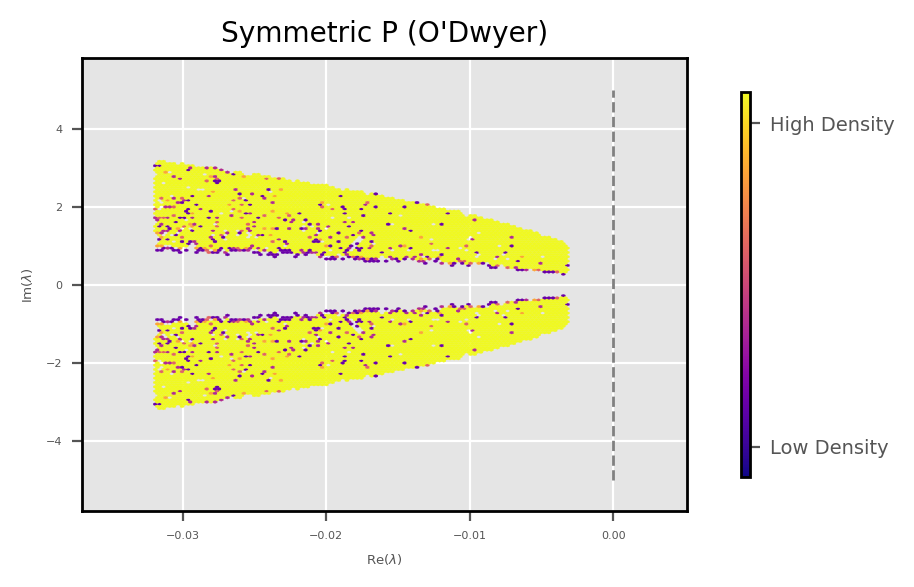

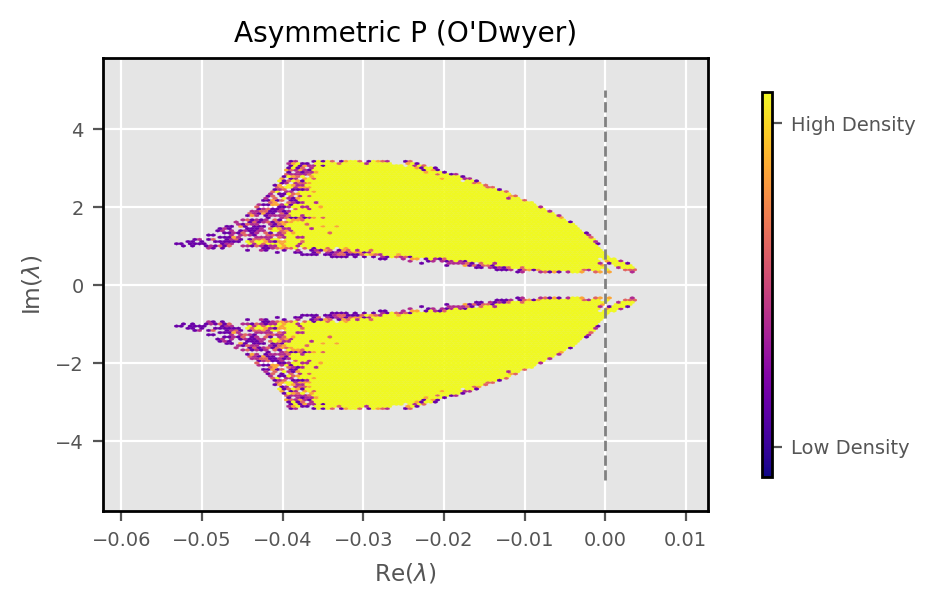

In [7]:
## Plot eigenvalues of linearized system ##

for i, q in enumerate([sev, aev]): # i index, q current value

    x = q.real
    y = q.imag

    plt.rcParams["axes.edgecolor"] = "black" 
    plt.rcParams["axes.linewidth"] = 1 
    
    fig, ax = plt.subplots(figsize = (5,3))

    #cmap = plt.cm.viridis_r  ### old, gets an error
    cmap = mpl.cm.get_cmap("plasma").copy()
    cmap.set_under(color = 'white', alpha = 0) 

    plt.axvline(0, c='grey', linestyle='--', linewidth=1, ymin=0.07, ymax=0.93) ### stability threshold (Re = 0)

    font = {'size' : 7}
    plt.rc('font', **font)

    plt.hexbin(x, y, bins=None, cmap=cmap, linewidths=0.1) ### bins = 'log' seems unhelpful???

    plt.xlabel(r'Re($\lambda$)')
    plt.ylabel(r'Im($\lambda$)')

    plt.clim(10**(-8), 5.0) ### color limits, increase upper for better contrast ???
    ### originally, (10**(-8), 2.0)

    xmin, xmax = plt.xlim()
    nxm = (xmax - xmin) / 10 ### def'n some padding/margins
    plt.xlim((xmin - nxm, xmax + nxm))

    
    ### Adjusting Re axis tick marks
    if i==0: ### symmetric P
        loc = plticker.MultipleLocator(base=0.01) ### tick marks in increments of 'base'
        ax.xaxis.set_major_locator(loc)
        plt.title('Symmetric P (O\'Dwyer)')
    if i==1: ### asymetric P
        loc = plticker.MultipleLocator(base=0.01) ### originally, base = 0.02
        ax.xaxis.set_major_locator(loc)
        plt.title('Asymmetric P (O\'Dwyer)')        

    ymin, ymax = plt.ylim()
    nym = (ymax - ymin) / 3
    plt.ylim((ymin - nym, ymax + nym))

    cb = plt.colorbar(aspect=40, shrink=0.85, pad=0.07)
    locs = cb.get_ticks()
    tl = locs[-1] * 2 / 25
    cb.set_ticks([tl, locs[-1] - tl])
    cb.set_ticklabels(['Low Density', 'High Density'])
        
plt.show();

### Frequency of stable n-size systems

In [8]:
### Original O'Dwyer method for determining/plotting stability
   # Do same as before but with k = 100 trials
    
k_test = 100
ns_test = list(range(1,61))
percents_stable_Odw = []

## Parameters ##
eps = 0.25    # efficiency, WHY SAME FOR EACH SPECIES, scales consumption
sig = 1       # std deviation of production rates? Yes, also for abundances?
c   = 1       # equal consumption rate, WHY SAME FOR EACH SPECIES

for nn in ns_test:
    
    aev = np.array([]) # just make new eigval array for each n, easier to just reshape after appending
                            # all eigvals for one system size (n) and append the stability_percent, then repeat
    I = np.identity(nn)

    ## Consumption Matrix ##
    C = c * I

    ## Production matrices ##
    sP = symP(sig, nn)
    aP = asymP(sig, nn)
    #sPvec = symPvec(sig, n)

    rlb = nn * sig * mt.sqrt(2 / mt.pi) / (c * eps) # mu and rho are hidden, i.e. some choice of those vector
                                                    #produces this equilibrium

    LD = np.zeros((nn, nn))

    for k in range(k_test): ### originally 5000
        ## Equilibrium Abundances ##
        r = uniform(rlb, 10 * rlb)           ### varying the densities at which Jacobian is evaluated
        s = uniform(rlb / 10**4, rlb / 1000)

        ## Linearized System ##
           ### Jacobian, L, eval'd at steady state
        #     [ LA | aLB]
        #aL = [---------]
        #     [ LC | LD ]
        LA  = -c * s * I

        aLB = aP - c * r * I

        LC = eps * c * s * I
        LD = np.zeros((nn, nn))

        aL  = np.vstack((np.hstack((LA, aLB)), np.hstack((LC, LD))))

        ## Eigenvalues of Linearized System ##

        aev = np.append(aev, eigvals(aL))
    
    aev = aev.reshape(k_test,2*nn)
    pos_real_cts = np.sum(aev>0,1)
    
    percents_stable_Odw.append(len(pos_real_cts[pos_real_cts==0])/k_test)
        

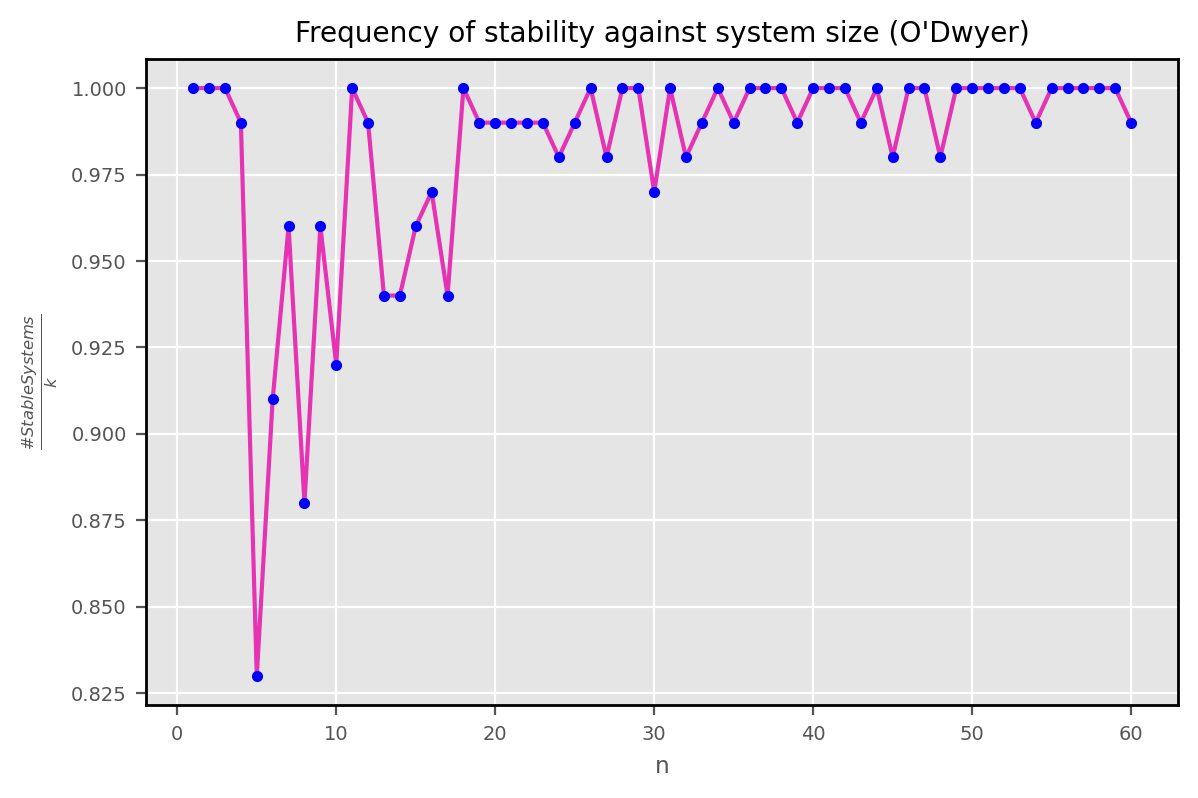

In [9]:
y_data = np.array(percents_stable_Odw)
x_data = np.array(ns_test)

plt.plot(x_data,y_data, color=(0.9,0.2,0.7));
plt.plot(x_data,y_data, 'b.');
plt.title('Frequency of stability against system size (O\'Dwyer)');
plt.xlabel('n');
plt.ylabel(r'$\frac{\# Stable Systems}{k}$');
plt.tight_layout();
plt.show();

# When using AN EVEN HIGHER SAMPLE SIZE (k=1000 vs. k=100 down below), still very noisy?
    # but with dip near n=[8,12]. Hrm...
    # Also, very stable.

In [10]:
x_data[np.argmin(y_data)] # Least chance of having stable system at n=5

5

### 'Random P and Corresponding Equilibria' Approach

In [ ]:
###############################################################################
# Instead, consider randomizing the (n,n) P(roduction matrix) and eval'ing its Jacobian only at 
    # the corresponding steady state.
# Choose k = 5000
# make (k,n,n) array (5000 P matrices)
# make (k,n,1) array (5000 R_stars)
# ""                 (5000 S_stars)
###############################################################################

In [ ]:
### According to Butler/O'Dwyer, for any CHOICE of (+) mu and rho, the formulae below will produce feasible Steady States

$\vec{R^*} = (C^T)^{-1}\frac{1}{\epsilon}(P^T \vec{1} + \vec{\mu})$)

$\vec{S^*} = [(R^{*}_{diag})C - P]^{-1} \vec{\rho}$


### Testing eigvals of new vectorized system

In [ ]:
### Now, can generate k many P matrices, together with shape (k,n,n), and the corresponding R_stars and S_stars for evaluating the Jacobian at equilibrium

sEVs = np.array([])
aEVs = np.array([])

## Parameters ##
n   = 20      # number of species AND number of resrcs --> Jacobians will be (2*n,2*n)
k = 750       # number of systems to generate
eps = 0.25    # efficiency, WHY SAME FOR EACH SPECIES, scales consumption
sig = 1      # std deviation of production rates? Yes, also for abundances?
c   = 1       # equal consumption rate, WHY SAME FOR EACH SPECIES
mu = (np.ones(n)*0.5).reshape(n,1) # R_star_gen takes 2D mu
rho = (np.ones(n)*0.5).reshape(n,1)


### SEE METHODS in O'Dwyer FOR mu AND rho formulae if needed
I = np.identity(n)

## Consumption Matrix ##
C = c * I

### Generating Random P-matrices, fixing mu and rho, and eval'ing Jacobian at corresponding equilibria
    ### Then, find dominant eigenvalues.
    ### Each system will contribute 2*n eigenvalues, so we can reshape eigval list to later determine how many systems had a stable equilibrium

## Production matrices ##
sP = symPvec2(sig, n, k)
aP = asymPvec(sig, n, k)

## Equilibrium Abundances ##
sR_star = R_star_gen(C,sP, eps, mu)
sS_star = S_star_gen(C,sP, sR_star, rho)

aR_star = R_star_gen(C,aP, eps, mu)
aS_star = S_star_gen(C,aP, aR_star, rho)


## Linearized System ##
   ### Jacobian, L, eval'd at steady state
#     [ LA | LB ]
#aL = [---------]
#     [ LC | LD ]

# Community Matrix for Symmetric P
sLA  = -c * sS_star * I
sLB = sP - c * sR_star * I
sLC = eps * c * sS_star * I

# Community Matrix for Asymmetric P
aLA = -c * aS_star * I
aLB = aP - c * aR_star * I
aLC = eps * c * aS_star * I

LD = np.zeros((k, n, n)) # same for both cases P


sL  = np.concatenate((np.concatenate((sLA, sLB),2), np.concatenate((sLC, LD),2)), 1)
# aL  = np.vstack((np.hstack((aLA, aLB)), np.hstack((aLC, LD))))
aL  = np.concatenate((np.concatenate((aLA, aLB),2), np.concatenate((aLC, LD),2)), 1)


## Eigenvalues of Linearized System ##

sEVs = np.append(sEVs, eigvals(sL))
aEVs = np.append(aEVs, eigvals(aL))

### Frequency of stable n-size systems (Random P)

In [ ]:
# Small systems (small n) almost always stable

ns_test = list(range(2,41))
percents_stable = []

k_test=100
eps = 0.25

for nn in ns_test:
    n_test = nn
    # ev_ex = rand_eigval_gen(n_test,k_test,sig = 1, symmetric=False)
    
    P_ex = asymPvec(sig = 1, n = n_test, k=k_test)
    mu_ex = (np.ones(n_test)*0.5).reshape(n_test,1)
    rho_ex = (np.ones(n_test)*0.5).reshape(n_test,1)

    ev_ex = eigval_gen(P_ex, eps, mu_ex, rho_ex)
    
    reals = ev_ex.real
    
    pos_real_cts = np.sum(reals>0,-1)
    percents_stable.append(len(pos_real_cts[pos_real_cts==0])/k_test) # ratio of stable systems to total systems (k)


In [ ]:
xdata = np.array(ns_test)
ydata = np.array(percents_stable)

# I forgot how to suppress matplotlib output automatically
plt.plot(xdata,ydata, color=(0.85,0.1,0.5));
plt.plot(xdata,ydata, 'b.');

plt.title('Frequency of stability against system size (Random P)');
plt.xlabel('n');
plt.ylabel(r'$\frac{\# Stable Systems}{k}$');
plt.tight_layout();
plt.show();
# Fit with Negative binomial ?

The above data have a form similar to
$$ f(x) = a\frac{e^{r(x-d)}}{c+e^{r(x-d)}}, $$
with reals $r<0,$ and $a,c,d>0$.

#### Fitting the peculiar curve

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def logistic(x, a, r, c, d): # Model Guess 1: Logistic Decay
    y = a * (np.e**(r*(x-d)) / (c + np.e**(r*(x-d))))
    return y

# Model Guess 2: Negative Binomial (Failure Probability)

In [ ]:
guess = [1, -0.1, 0.9, 20] # guess from playing with desmos sliders
parameters, covariance = curve_fit(logistic, xdata, ydata, p0 = guess) # least-squares is default?
fit_a = parameters[0]
fit_r = parameters[1]
fit_c = parameters[2]
fit_d = parameters[3]
print(fit_a)
print(fit_r)
print(fit_c)
print(fit_d)

In [ ]:
fit_logistic_y = logistic(xdata, fit_a, fit_r, fit_c, fit_d)
plt.plot(xdata, 100*ydata, 'k.', label='% stable');
plt.plot(xdata, 100*fit_logistic_y, 'deepskyblue', label='logistic fit');
plt.legend();

### Back to plotting eigvals

In [ ]:
np.any(aEVs.real > 0)

In [ ]:
### Plot Eigenvalues of Various Linearized Systems
    ### (Eval'd at the respective steady states for single fixed mu and rho
    
# Loop the code below over a list of sigmas
    # Subplots with left column symmetric, right asymmetric
    # Make list, stability_probs. For each aEVs with different sig, append the
      # ratio of matrices that have any Re(eigval)>0 to k.

#sigs = [0.5,1,2,5,10]
sigs = [1]
# just have one pair (sEVs,aEVs) at a time for simplicity
    # generate sEVs, aEVs with current sigma
    # plot them
    # append to stability_freq using aEVs

n = 20      # number of species AND number of resrcs
k = 1000     # number of systems to generate

sP = symPvec(sig=1, n=n, k=k)
aP = asymPvec(sig=1, n=n, k=k)

mu = (np.ones(n)*1).reshape(n,1)
rho = (np.ones(n)*1).reshape(n,1)

stability_freqs = [] # len(sigs)

for j, s in enumerate(sigs): # Plotting was being buggy, no longer looping over multiple sigmas
    sEVs = eigval_gen(sP, eps, mu, rho)
    aEVs = eigval_gen(aP, eps, mu, rho)
    for i, q in enumerate([sEVs, aEVs]): # i index, q current value

        x = q.real
        y = q.imag
        
        plt.rcParams["axes.edgecolor"] = "black" 
        plt.rcParams["axes.linewidth"] = 1 

        fig, ax = plt.subplots(figsize = (5,3))

        cmap = mpl.cm.get_cmap("magma").copy()
        cmap.set_under(color = 'white', alpha=0) 

        plt.axvline(0, c='grey', linestyle='--', linewidth=1, ymin=0.07, ymax=0.93) ### stability threshold (Re = 0)

        font = {'size' : 7}
        plt.rc('font', **font)

        # plt.subplot(len(sigs),2,(j+i+1));
        plt.hexbin(x, y, bins=None, cmap=cmap, linewidths=0.1) ### bins = 'log' seems unhelpful???

        plt.xlabel(r'Re($\lambda$)')
        plt.ylabel(r'Im($\lambda$)')

        plt.clim(10**(-8), 5.0) ### color limits, increase upper for better contrast ???
        ### originally, (10**(-8), 2.0)

        xmin, xmax = plt.xlim()
        nxm = (xmax - xmin) / 10 ### def'n some padding/margins
        plt.xlim((xmin - nxm, xmax + nxm))

        ### Adjusting Re axis tick marks
        if i==0: ### symmetric P
            loc = plticker.MultipleLocator(base=0.01) ### tick marks in increments of 'base'
            # ax.xaxis.set_major_locator(loc)
            plt.title(r'Symmetric P, $\sigma={}$'.format(s))

        if i==1: ### asymmetric P
            loc = plticker.MultipleLocator(base=0.01) ### originally, base = 0.02
            # ax.xaxis.set_major_locator(loc)
            plt.title(r'Asymmetric P, $\sigma={}$'.format(s))
            
        cb = plt.colorbar(aspect=40, shrink=0.85, pad=0.07)
        locs = cb.get_ticks()
        tl = locs[-1] * 2 / 25
        cb.set_ticks([tl, locs[-1] - tl])
        cb.set_ticklabels(['Low Density', 'High Density'])

        ymin, ymax = plt.ylim()
        nym = (ymax - ymin) / 3
        plt.ylim((ymin - nym, ymax + nym))
        
        plt.tight_layout()

plt.show();

## Uniform D

How should the equilibrium species populations be distributed such that $D$ is uniformly distributed on 0 to $N$?

Need extra constraints on $p_i$, otherwise the problem of finding $p_i$ distributions that lead to uniform $D$ is underdetermined.

In [ ]:
p_2 = np.zeros((1000,2,1))
p_2[:,0,:] = np.linspace(0.1,1,1000).reshape(1000,1)

p_2[:,1,:] = 1 - p_2[:,0,:]

In [ ]:
temp = D_1(p_2)

temp[0] = 1
temp[-1] = 1

np.mean(temp)

In [ ]:
plt.figure(figsize=(4,3));
plt.plot(p_2[:,0,:], temp);
plt.plot(p_2[:-1,0,:], np.diff(temp, axis=0)/(p_2[1,0,0]-p_2[0,0,0]));
plt.ylim(-4,4); # Low diversity is scarcer this way, look at mean of temp (mean of D > 1.5)

## Other

In [ ]:
# fig, ax = plt.subplots(figsize=(5,3), dpi=350);
# ax.plot(x,y);

# ax.axvline(x=x[np.where(y==90)], color="black", linestyle='--');
# ax.set_xticks(np.linspace(0,100, 51));
# ax.tick_params(axis='x', which='major', pad=1, labelrotation=0);
# for tick in ax.xaxis.get_major_ticks()[1::2]:
#     tick.set_pad(7)
# plt.show();

In [ ]:
# Below, figuring the derivation of 'rlb'
# default PDF of normal, p_norm(x)
# sub for mu=0, sigma=1
# double due to half normal

$$ p_{norm}(x) = \frac{1}{{\sigma \sqrt {2\pi } }}e^{-\frac{1}{2} (\frac{x-\mu}{\sigma})^2} $$

$$ p_{norm}(x) = \frac{1}{{ \sqrt {2\pi } }}e^{-\frac{1}{2} x^2} $$
$$ p_{halfnorm}(x) = \frac{2}{{ \sqrt {2\pi } }}e^{-\frac{1}{2} x^2} $$
$$ p_{halfnorm}(x) = \sqrt{\frac{2}{\pi}}e^{-\frac{1}{2} x^2} $$

In [ ]:
# expectation of the above is np.sqrt(2/np.pi)

$$ rlb = \frac{n  \sigma  \sqrt{\frac{2}{\pi}} } {c  \epsilon} $$

$$ rlb = \frac{20  \sqrt{\frac{2}{\pi}} } {0.25}$$

$$ rlb = 80  \sqrt{\frac{2}{\pi}} $$

Standard gLV (meaning with carrying capacity and only pairwise mass action terms)
Community matrix takes the form:
$$
r_i - N_i^* + \sum\limits_{j=1}^{n} \beta_{i,j}N_{j}^{*} \quad \text{for}\space i=j
\\
\beta_{i,j}N_j^* \quad \text{for}\space i\neq j
$$

$$0=r_i N_i^* (1-\frac{N_i^*}{k_i}) + N_i^* \sum_{j=1, j\neq i}^n \beta_{i,j} N_j^* $$
Set gLV equations equal to 0 to obtain linear system that can be solved for non-extinction equilibrium (after cancelling one factor of $N_i^{*}$).